In [1]:
import os
import torch
import pandas as pd
import h5py
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import SimpleITK as sitk
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
import torch.nn.functional as F


In [2]:
Comp = 'FabioPC'
if Comp == 'FabioPC':
    df = pd.read_csv('/media/fabio/Disco locale/Scaricati/ADNI1_Screening_1.5T_3_06_2020.csv')
else:
    df = pd.read_csv('D:/ADNI/Dati/ADNI1_T1_2_11_2020.csv')

In [3]:
df.head()

Image Data ID     Subject Group Sex  Age  Visit Modality  \
0          63897  941_S_1363   MCI   F   70      1      MRI   
1          97327  941_S_1311   MCI   M   69      1      MRI   
2          63888  941_S_1295   MCI   M   77      1      MRI   
3          63879  941_S_1203    CN   M   83      1      MRI   
4          63874  941_S_1202    CN   M   78      1      MRI   

                                  Description       Type   Acq Date Format  \
0    MPR; GradWarp; B1 Correction; N3; Scaled  Processed  3/12/2007  NiFTI   
1    MPR; GradWarp; B1 Correction; N3; Scaled  Processed  3/02/2007  NiFTI   
2    MPR; GradWarp; B1 Correction; N3; Scaled  Processed  2/09/2007  NiFTI   
3    MPR; GradWarp; B1 Correction; N3; Scaled  Processed  1/29/2007  NiFTI   
4  MPR-R; GradWarp; B1 Correction; N3; Scaled  Processed  1/30/2007  NiFTI   

  Downloaded  
0  3/05/2020  
1  2/12/2020  
2  2/12/2020  
3  2/11/2020  
4  2/11/2020

In [4]:
interpolator = sitk.sitkLinear
default_value = 0
print('*Translation Transform*')
transform = sitk.TranslationTransform(3)

*Translation Transform*


In [5]:
if Comp == 'FabioPC':
    IMG_Folder = '/media/fabio/Disco locale/Scaricati/ADNI_registrate/'
else:
    IMG_Folder = 'D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/'

In [6]:
dati_img = os.listdir(IMG_Folder)
cwd = os.getcwd()

In [7]:
cwd

'/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/ADNI/LeNet5_CNN'

In [8]:
dati_img[1:]

['ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii.gz',
 'ADNI_002_S_0413_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001114742166_S13893_I118673.nii.gz',
 'ADNI_002_S_0413_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319115331858_S13893_I45117.nii.gz',
 'ADNI_002_S_0559_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001115028407_S14875_I118676.nii.gz',
 'ADNI_002_S_0559_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070216234409231_S14875_I40674.nii.gz',
 'ADNI_002_S_0619_MR_MPR-R__GradWarp__N3__Scaled_Br_20070411125458928_S15145_I48617.nii.gz',
 'ADNI_002_S_0685_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001115434324_S16309_I118680.nii.gz',
 'ADNI_002_S_0685_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070216235850690_S16309_I40683.nii.gz',
 'ADNI_002_S_0729_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001115616920_S16874_I118682.nii.gz',
 'ADNI_002_S_0729_MR_MPR__GradWarp__B1_Correcti

In [9]:
if Comp == 'FabioPC':
    dati_img[2].split('_')[1:4]
else:
    dati_img[2].split('_')[2:5]

In [10]:
if Comp == 'FabioPC':
    ID = '_'.join(dati_img[2].split('_')[1:4])
else:
    ID = '_'.join(dati_img[2].split('_')[2:5])

In [11]:
ID

'002_S_0413'

In [12]:
df.loc[df['Subject'] == ID]['Modality'].values[0]

'MRI'

In [13]:
reference_image = sitk.ReadImage(IMG_Folder + dati_img[1])

In [14]:
img_tot = []
y = []
len_data = []

try:
    os.makedirs('ADNI1_PROC')
except:
    print("Already Created")
count_AD = 0
count_CN = 0
count_MCI = 0
for data_img in tqdm(dati_img[2:]):
    if 'nii' in str(data_img):
        sitk_t1 = sitk.ReadImage(IMG_Folder + data_img)
        #print(sitk_t1.GetDirection())
        #t2 = sitk.Resample(sitk_t1, reference_image, transform,interpolator, default_value)
        t1 = sitk.GetArrayFromImage(sitk_t1)
        
        print()
        if Comp == 'FabioPC':
            Subject = df.loc[df['Subject'] == '_'.join(data_img.split('_')[1:4])]['Group'].values[0]
            Subject_txt = df.loc[df['Subject'] == '_'.join(data_img.split('_')[1:4])]['Group']
            print(len(Subject_txt))
            print(Subject_txt)
        else:
            Subject = df.loc[df['Subject'] == '_'.join(data_img.split('_')[2:5])]['Group'].values[0]
            Subject_txt = df.loc[df['Subject'] == '_'.join(data_img.split('_')[2:5])]['Group']
            print(Subject_txt)
        print(Subject)
        if Subject=='CN':
            count_CN += 1
        else:
            if Subject=='AD':
                count_AD +=1
            else:
                count_MCI +=1
        # Seleziono solamente 200 MCI per bilanciare le classi
        #if (Subject == 'MCI') and (count_MCI <200):
        #    img_tot.append(t1)
        #    y.append(Subject)
        #if (Subject in ['AD', 'CN']):
        x = torch.from_numpy(t1)
        print(x.shape)
        target = F.pad(input=x, pad = (0,1,0,0,2,1), mode='constant', value=0)
        patches = target.unfold(0, 39, 39).unfold(1, 57, 57).unfold(2, 50, 50)
        x = patches.contiguous().view(-1, 39, 57, 50)
        print(x.shape)
        for i in range(x.shape[0]):
            img_tot.append(x[i])
            y.append(Subject)
            len_data.append(len(Subject_txt))

        print(t1.shape)

  0%|          | 1/1058 [00:00<02:19,  7.58it/s]

Already Created

2
1069    CN
1070    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  0%|          | 2/1058 [00:00<02:15,  7.79it/s]


2
1069    CN
1070    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1067    CN
1068    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  0%|          | 5/1058 [00:00<02:07,  8.26it/s]


2
1067    CN
1068    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1065    AD
1066    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  1%|          | 7/1058 [00:00<02:01,  8.68it/s]


2
1063    CN
1064    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1063    CN
1064    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1061    MCI
1062    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


  1%|          | 9/1058 [00:00<01:54,  9.16it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1061    MCI
1062    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1059    MCI
1060    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  1%|          | 12/1058 [00:01<01:54,  9.17it/s]


2
1059    MCI
1060    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1057    AD
1058    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  1%|▏         | 14/1058 [00:01<02:03,  8.43it/s]


2
1055    AD
1056    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1055    AD
1056    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  2%|▏         | 16/1058 [00:01<01:55,  9.00it/s]


2
1053    MCI
1054    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1053    MCI
1054    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1051    AD
1052    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])


  2%|▏         | 18/1058 [00:01<01:55,  9.04it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1050    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1049    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


  2%|▏         | 20/1058 [00:02<01:48,  9.53it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1048    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1047    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  2%|▏         | 22/1058 [00:02<01:43, 10.04it/s]


1
1046    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1045    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  2%|▏         | 25/1058 [00:02<01:54,  9.00it/s]


2
1065    AD
1066    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1057    AD
1058    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  3%|▎         | 27/1058 [00:02<01:57,  8.79it/s]


2
1051    AD
1052    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1044    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  3%|▎         | 28/1058 [00:03<02:03,  8.36it/s]


1
1037    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1030    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  3%|▎         | 30/1058 [00:03<01:58,  8.65it/s]


1
1043    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1042    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  3%|▎         | 32/1058 [00:03<01:58,  8.64it/s]


1
1041    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1040    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  3%|▎         | 34/1058 [00:03<01:57,  8.74it/s]


1
1039    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1038    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  3%|▎         | 36/1058 [00:03<01:54,  8.95it/s]


1
1036    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1035    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  4%|▎         | 39/1058 [00:04<01:51,  9.12it/s]


1
1034    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1033    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  4%|▍         | 41/1058 [00:04<01:54,  8.84it/s]


1
1032    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1031    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  4%|▍         | 43/1058 [00:04<01:57,  8.67it/s]


1
1029    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1028    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  4%|▍         | 45/1058 [00:04<01:56,  8.71it/s]


1
1027    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1026    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  4%|▍         | 47/1058 [00:05<01:55,  8.73it/s]


1
1025    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1024    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  5%|▍         | 49/1058 [00:05<01:51,  9.02it/s]


1
1023    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
417    CN
418    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  5%|▍         | 51/1058 [00:05<01:50,  9.15it/s]


2
415    MCI
416    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
415    MCI
416    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  5%|▌         | 53/1058 [00:05<01:46,  9.42it/s]


2
413    MCI
414    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
413    MCI
414    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
411    AD
412    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])


  5%|▌         | 55/1058 [00:05<01:42,  9.74it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
411    AD
412    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  5%|▌         | 58/1058 [00:06<01:45,  9.50it/s]


1
410    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
788    MCI
789    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
788    MCI
789    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  6%|▌         | 60/1058 [00:06<01:53,  8.82it/s]


2
786    CN
787    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
786    CN
787    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  6%|▌         | 62/1058 [00:06<01:50,  8.98it/s]


2
784    AD
785    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
784    AD
785    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  6%|▌         | 64/1058 [00:06<01:50,  8.96it/s]


2
782    AD
783    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
782    AD
783    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  6%|▌         | 65/1058 [00:07<02:02,  8.08it/s]


2
780    AD
781    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
778    MCI
779    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  6%|▋         | 67/1058 [00:07<01:57,  8.40it/s]


2
778    MCI
779    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
776    AD
777    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  7%|▋         | 71/1058 [00:07<01:47,  9.19it/s]


2
776    AD
777    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
774    MCI
775    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
774    MCI
775    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  7%|▋         | 73/1058 [00:07<01:43,  9.56it/s]


2
772    MCI
773    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
770    MCI
771    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  7%|▋         | 75/1058 [00:08<01:43,  9.50it/s]


2
770    MCI
771    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
768    MCI
769    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
768    MCI
769    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


  7%|▋         | 77/1058 [00:08<01:44,  9.35it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
766    MCI
767    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  7%|▋         | 78/1058 [00:08<01:44,  9.41it/s]


2
766    MCI
767    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
764    MCI
765    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
762    MCI
763    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


  8%|▊         | 82/1058 [00:08<01:39,  9.79it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
762    MCI
763    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
760    MCI
761    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  8%|▊         | 85/1058 [00:09<01:39,  9.73it/s]


2
760    MCI
761    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
758    MCI
759    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
408    MCI
409    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  8%|▊         | 86/1058 [00:09<01:46,  9.14it/s]


1
407    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
405    CN
406    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  8%|▊         | 89/1058 [00:09<01:49,  8.82it/s]


2
405    CN
406    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
403    CN
404    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  9%|▊         | 91/1058 [00:09<02:00,  8.02it/s]


2
403    CN
404    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
401    MCI
402    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  9%|▉         | 93/1058 [00:10<02:06,  7.62it/s]


2
401    MCI
402    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
399    CN
400    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  9%|▉         | 95/1058 [00:10<01:57,  8.17it/s]


2
399    CN
400    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
397    MCI
398    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  9%|▉         | 97/1058 [00:10<02:02,  7.83it/s]


2
397    MCI
398    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
739    AD
740    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  9%|▉         | 99/1058 [00:10<01:53,  8.44it/s]


2
737    CN
738    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
737    CN
738    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


  9%|▉         | 100/1058 [00:11<02:03,  7.76it/s]


1
736    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
735    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
734    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])


 10%|▉         | 103/1058 [00:11<01:49,  8.68it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
640    MCI
641    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
638    MCI
639    MCI
Name: Group, dtype: object

 10%|▉         | 105/1058 [00:11<01:55,  8.22it/s]


MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
638    MCI
639    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 10%|█         | 107/1058 [00:11<01:48,  8.73it/s]


2
636    AD
637    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
636    AD
637    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 10%|█         | 109/1058 [00:11<01:44,  9.09it/s]


2
634    MCI
635    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
634    MCI
635    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 10%|█         | 111/1058 [00:12<01:45,  9.00it/s]


2
780    AD
781    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
772    MCI
773    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 11%|█         | 113/1058 [00:12<01:49,  8.62it/s]


2
764    MCI
765    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
758    MCI
759    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 11%|█         | 114/1058 [00:12<01:50,  8.54it/s]


2
750    MCI
751    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
739    AD
740    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 11%|█         | 117/1058 [00:12<01:46,  8.81it/s]


1
733    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
725    CN
726    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 11%|█         | 119/1058 [00:13<01:42,  9.16it/s]


2
632    AD
633    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
630    CN
631    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
630    CN
631    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])


 11%|█▏        | 121/1058 [00:13<01:38,  9.50it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
628    AD
629    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
628    AD
629    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 12%|█▏        | 124/1058 [00:13<01:38,  9.48it/s]


2
626    CN
627    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
626    CN
627    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 12%|█▏        | 125/1058 [00:13<01:46,  8.74it/s]


1
624    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
623    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
622    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 12%|█▏        | 128/1058 [00:14<01:44,  8.92it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
621    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 12%|█▏        | 130/1058 [00:14<01:44,  8.84it/s]


1
620    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
619    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 12%|█▏        | 132/1058 [00:14<01:39,  9.32it/s]


1
618    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
617    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 13%|█▎        | 133/1058 [00:14<01:38,  9.36it/s]


1
615    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
614    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 13%|█▎        | 137/1058 [00:14<01:34,  9.73it/s]


1
613    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
612    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
611    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 13%|█▎        | 139/1058 [00:15<01:35,  9.60it/s]


1
610    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
503    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 13%|█▎        | 142/1058 [00:15<01:33,  9.85it/s]


1
502    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
501    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
500    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 14%|█▎        | 144/1058 [00:15<01:35,  9.53it/s]


1
499    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
498    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 14%|█▍        | 146/1058 [00:15<01:44,  8.75it/s]


1
497    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
292    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 14%|█▍        | 148/1058 [00:16<01:40,  9.09it/s]


1
291    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
290    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 14%|█▍        | 150/1058 [00:16<01:45,  8.59it/s]


1
289    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
288    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 14%|█▍        | 152/1058 [00:16<01:39,  9.12it/s]


1
287    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
286    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 15%|█▍        | 154/1058 [00:16<01:49,  8.24it/s]


1
285    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
591    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 15%|█▍        | 156/1058 [00:17<01:46,  8.43it/s]


1
590    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
589    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 15%|█▍        | 158/1058 [00:17<01:44,  8.63it/s]


1
588    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
587    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 15%|█▌        | 160/1058 [00:17<01:37,  9.17it/s]


1
586    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
585    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 15%|█▌        | 162/1058 [00:17<01:54,  7.81it/s]


1
880    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
879    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 16%|█▌        | 164/1058 [00:17<01:49,  8.16it/s]


1
878    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
877    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 16%|█▌        | 166/1058 [00:18<01:45,  8.49it/s]


1
876    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
875    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 16%|█▌        | 167/1058 [00:18<01:47,  8.28it/s]


1
874    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
873    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 16%|█▌        | 170/1058 [00:18<01:51,  7.95it/s]


1
872    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
901    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 16%|█▌        | 171/1058 [00:18<01:52,  7.91it/s]


1
900    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
899    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 16%|█▋        | 174/1058 [00:19<01:52,  7.87it/s]


1
898    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
897    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 17%|█▋        | 176/1058 [00:19<01:50,  7.95it/s]


1
896    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
895    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 17%|█▋        | 178/1058 [00:19<01:55,  7.63it/s]


1
894    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
892    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 17%|█▋        | 180/1058 [00:19<01:42,  8.61it/s]


1
891    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
890    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 17%|█▋        | 182/1058 [00:20<01:38,  8.88it/s]


1
889    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
888    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
887    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])


 17%|█▋        | 184/1058 [00:20<01:36,  9.07it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
886    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 17%|█▋        | 185/1058 [00:20<01:37,  8.96it/s]


1
885    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
884    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 18%|█▊        | 188/1058 [00:20<01:44,  8.34it/s]


1
883    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
882    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 18%|█▊        | 190/1058 [00:20<01:38,  8.84it/s]


1
283    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
282    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 18%|█▊        | 192/1058 [00:21<01:49,  7.88it/s]


1
281    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
280    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 18%|█▊        | 194/1058 [00:21<01:46,  8.08it/s]


1
279    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
278    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 19%|█▊        | 196/1058 [00:21<01:46,  8.12it/s]


1
277    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
616    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 19%|█▊        | 198/1058 [00:22<01:47,  8.01it/s]


1
609    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
602    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 19%|█▉        | 200/1058 [00:22<01:47,  8.01it/s]


1
592    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
584    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 19%|█▉        | 202/1058 [00:22<02:01,  7.03it/s]


1
576    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
563    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 19%|█▉        | 204/1058 [00:22<01:56,  7.36it/s]


1
556    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
548    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 19%|█▉        | 206/1058 [00:23<01:46,  8.02it/s]


1
541    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
534    MCI
535    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 20%|█▉        | 208/1058 [00:23<01:47,  7.93it/s]


1
527    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
146    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 20%|█▉        | 210/1058 [00:23<01:41,  8.36it/s]


1
145    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
144    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
142    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 20%|██        | 212/1058 [00:23<01:36,  8.81it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
141    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
140    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])


 20%|██        | 214/1058 [00:23<01:30,  9.33it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
139    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 20%|██        | 216/1058 [00:24<01:48,  7.78it/s]


1
138    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
135    MCI
136    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 21%|██        | 217/1058 [00:24<01:40,  8.33it/s]


2
135    MCI
136    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
134    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
133    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 21%|██        | 220/1058 [00:24<01:34,  8.87it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
132    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
131    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])


 21%|██        | 222/1058 [00:24<01:29,  9.37it/s]

(114, 177, 149)

1
130    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
547    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 21%|██        | 224/1058 [00:25<01:26,  9.61it/s]


1
546    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
545    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 21%|██▏       | 226/1058 [00:25<01:26,  9.58it/s]


1
544    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
543    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 22%|██▏       | 228/1058 [00:25<01:28,  9.41it/s]


1
542    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
540    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 22%|██▏       | 231/1058 [00:25<01:27,  9.50it/s]


2
538    MCI
539    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
538    MCI
539    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
536    CN
537    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])


 22%|██▏       | 233/1058 [00:25<01:25,  9.69it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
536    CN
537    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 22%|██▏       | 236/1058 [00:26<01:28,  9.34it/s]


2
534    MCI
535    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
533    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
532    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 22%|██▏       | 237/1058 [00:26<01:29,  9.18it/s]


1
531    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
530    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
529    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])


 23%|██▎       | 241/1058 [00:26<01:24,  9.71it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
528    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
395    CN
396    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 23%|██▎       | 243/1058 [00:27<01:37,  8.36it/s]


2
391    MCI
392    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
390    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 23%|██▎       | 245/1058 [00:27<01:33,  8.66it/s]


1
389    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
388    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 23%|██▎       | 247/1058 [00:27<01:35,  8.49it/s]


1
387    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
525    MCI
526    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 23%|██▎       | 248/1058 [00:27<01:34,  8.53it/s]


2
525    MCI
526    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
523    MCI
524    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 24%|██▍       | 252/1058 [00:28<01:26,  9.34it/s]


2
523    MCI
524    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
521    MCI
522    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
521    MCI
522    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 24%|██▍       | 254/1058 [00:28<01:30,  8.90it/s]


2
408    MCI
409    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
395    CN
396    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 24%|██▍       | 256/1058 [00:28<01:47,  7.44it/s]


1
386    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
379    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 24%|██▍       | 258/1058 [00:28<01:41,  7.92it/s]


1
366    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
359    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 24%|██▍       | 259/1058 [00:28<01:44,  7.63it/s]


1
352    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
344    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 25%|██▍       | 262/1058 [00:29<01:42,  7.78it/s]


1
335    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
318    CN
319    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 25%|██▍       | 264/1058 [00:29<01:53,  7.01it/s]


2
310    CN
311    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
302    AD
303    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 25%|██▌       | 266/1058 [00:29<01:45,  7.50it/s]


1
1022    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
902    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 25%|██▌       | 268/1058 [00:30<01:46,  7.43it/s]


2
790    CN
791    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
713    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 25%|██▌       | 269/1058 [00:30<01:45,  7.48it/s]


1
625    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
519    MCI
520    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 26%|██▌       | 272/1058 [00:30<01:41,  7.74it/s]


2
417    CN
418    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
293    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 26%|██▌       | 274/1058 [00:30<01:52,  6.94it/s]


1
213    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
101    MCI
102    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 26%|██▌       | 276/1058 [00:31<01:42,  7.64it/s]


2
519    MCI
520    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
517    AD
518    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 26%|██▋       | 279/1058 [00:31<01:33,  8.33it/s]


2
517    AD
518    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
516    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
515    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 27%|██▋       | 281/1058 [00:31<01:27,  8.84it/s]


1
514    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
513    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 27%|██▋       | 283/1058 [00:31<01:40,  7.68it/s]


1
983    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
982    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 27%|██▋       | 285/1058 [00:32<01:34,  8.18it/s]


1
981    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
980    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 27%|██▋       | 288/1058 [00:32<01:27,  8.75it/s]


1
979    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
977    CN
978    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
977    CN
978    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 27%|██▋       | 290/1058 [00:32<01:24,  9.11it/s]


1
365    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
364    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1


 28%|██▊       | 292/1058 [00:32<01:22,  9.29it/s]

363    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
362    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 28%|██▊       | 294/1058 [00:33<01:25,  8.93it/s]


1
361    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
360    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 28%|██▊       | 296/1058 [00:33<01:21,  9.41it/s]


1
358    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
357    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 28%|██▊       | 299/1058 [00:33<01:21,  9.35it/s]


1
356    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
355    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
354    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 28%|██▊       | 301/1058 [00:33<01:20,  9.36it/s]


1
353    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
351    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 29%|██▊       | 303/1058 [00:34<01:22,  9.19it/s]


1
350    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
349    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 29%|██▉       | 306/1058 [00:34<01:17,  9.65it/s]


1
348    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
347    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
346    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 29%|██▉       | 308/1058 [00:34<01:16,  9.82it/s]


1
345    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
712    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 29%|██▉       | 310/1058 [00:34<01:23,  8.94it/s]


1
711    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
710    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 29%|██▉       | 312/1058 [00:35<01:22,  9.01it/s]


1
709    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
708    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
707    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])


 30%|██▉       | 314/1058 [00:35<01:21,  9.08it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
705    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 30%|██▉       | 316/1058 [00:35<01:24,  8.82it/s]


1
704    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
703    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 30%|███       | 318/1058 [00:35<01:23,  8.86it/s]


1
702    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
701    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 30%|███       | 320/1058 [00:35<01:24,  8.72it/s]


1
700    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
699    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 30%|███       | 322/1058 [00:36<01:27,  8.41it/s]


1
697    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
696    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 31%|███       | 324/1058 [00:36<01:22,  8.95it/s]


1
695    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
694    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
693    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 31%|███       | 326/1058 [00:36<01:24,  8.69it/s]


1
692    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
691    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 31%|███       | 329/1058 [00:36<01:25,  8.51it/s]


1
128    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
127    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 31%|███       | 330/1058 [00:37<01:25,  8.47it/s]


1
126    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
125    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 31%|███▏      | 333/1058 [00:37<01:28,  8.19it/s]


1
124    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
123    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 32%|███▏      | 335/1058 [00:37<01:27,  8.25it/s]


1
122    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
121    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 32%|███▏      | 338/1058 [00:38<01:18,  9.20it/s]


1
221    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
220    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
219    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 32%|███▏      | 339/1058 [00:38<01:21,  8.84it/s]


1
218    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
217    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 32%|███▏      | 342/1058 [00:38<01:19,  8.99it/s]


1
216    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
215    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 33%|███▎      | 345/1058 [00:38<01:16,  9.28it/s]


1
214    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
212    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
211    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 33%|███▎      | 347/1058 [00:38<01:13,  9.64it/s]


1
210    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
208    MCI
209    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
208    MCI
209    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 33%|███▎      | 349/1058 [00:39<01:11,  9.97it/s]


2
206    MCI
207    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
206    MCI
207    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 33%|███▎      | 352/1058 [00:39<01:18,  8.94it/s]


2
452    AD
453    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
451    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 33%|███▎      | 354/1058 [00:39<01:17,  9.07it/s]


1
450    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
448    AD
449    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
448    AD
449    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])


 34%|███▎      | 356/1058 [00:39<01:15,  9.31it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
446    CN
447    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 34%|███▍      | 358/1058 [00:40<01:19,  8.82it/s]


2
446    CN
447    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
444    CN
445    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 34%|███▍      | 360/1058 [00:40<01:21,  8.55it/s]


2
444    CN
445    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
443    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 34%|███▍      | 362/1058 [00:40<01:25,  8.12it/s]


2
441    MCI
442    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
441    MCI
442    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 34%|███▍      | 364/1058 [00:40<01:23,  8.31it/s]


1
440    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
495    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 35%|███▍      | 366/1058 [00:41<01:23,  8.27it/s]


1
494    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
493    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 35%|███▍      | 368/1058 [00:41<01:18,  8.84it/s]


1
492    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
491    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 35%|███▍      | 370/1058 [00:41<01:20,  8.59it/s]


2
489    CN
490    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
489    CN
490    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 35%|███▌      | 372/1058 [00:41<01:18,  8.75it/s]


2
487    AD
488    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
485    MCI
486    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2


 35%|███▌      | 374/1058 [00:42<01:18,  8.70it/s]

485    MCI
486    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
483    MCI
484    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 36%|███▌      | 376/1058 [00:42<01:14,  9.18it/s]


2
483    MCI
484    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
481    CN
482    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 36%|███▌      | 378/1058 [00:42<01:21,  8.33it/s]


1
511    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
510    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 36%|███▌      | 380/1058 [00:42<01:20,  8.44it/s]


1
509    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
508    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 36%|███▌      | 382/1058 [00:43<01:26,  7.80it/s]


1
507    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
506    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 36%|███▋      | 384/1058 [00:43<01:21,  8.22it/s]


1
505    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
479    CN
480    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 36%|███▋      | 386/1058 [00:43<01:19,  8.43it/s]


2
479    CN
480    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
477    AD
478    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 37%|███▋      | 389/1058 [00:43<01:18,  8.57it/s]


2
477    AD
478    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
475    MCI
476    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
475    MCI
476    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 37%|███▋      | 391/1058 [00:44<01:14,  8.99it/s]


2
473    MCI
474    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
471    AD
472    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
471    AD
472    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])


 37%|███▋      | 393/1058 [00:44<01:12,  9.22it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
469    MCI
470    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 37%|███▋      | 394/1058 [00:44<01:13,  9.00it/s]


2
469    MCI
470    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
467    CN
468    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 38%|███▊      | 397/1058 [00:44<01:16,  8.66it/s]


1
512    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
504    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 38%|███▊      | 399/1058 [00:44<01:18,  8.39it/s]


1
496    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
487    AD
488    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 38%|███▊      | 401/1058 [00:45<01:15,  8.74it/s]


2
481    CN
482    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
473    MCI
474    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
467    CN
468    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 38%|███▊      | 404/1058 [00:45<01:10,  9.28it/s]


2
452    AD
453    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
438    MCI
439    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 38%|███▊      | 406/1058 [00:45<01:18,  8.31it/s]


2
431    CN
432    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
465    MCI
466    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 39%|███▊      | 408/1058 [00:45<01:15,  8.56it/s]


2
465    MCI
466    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
463    CN
464    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 39%|███▊      | 409/1058 [00:46<01:13,  8.89it/s]


2
463    CN
464    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
461    MCI
462    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
461    MCI
462    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 39%|███▉      | 413/1058 [00:46<01:07,  9.49it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
459    MCI
460    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
459    MCI
460    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 39%|███▉      | 416/1058 [00:46<01:09,  9.30it/s]


2
457    MCI
458    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
457    MCI
458    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
455    MCI
456    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 40%|███▉      | 418/1058 [00:46<01:12,  8.82it/s]


2
455    MCI
456    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
454    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 40%|███▉      | 420/1058 [00:47<01:18,  8.13it/s]


1
343    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
342    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 40%|███▉      | 422/1058 [00:47<01:18,  8.06it/s]


1
341    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
340    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 40%|████      | 424/1058 [00:47<01:15,  8.45it/s]


1
339    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
338    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 40%|████      | 427/1058 [00:48<01:09,  9.08it/s]


1
337    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
336    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
334    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 40%|████      | 428/1058 [00:48<01:14,  8.43it/s]


1
333    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
332    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 41%|████      | 431/1058 [00:48<01:11,  8.82it/s]


1
331    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
330    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 41%|████      | 433/1058 [00:48<01:16,  8.15it/s]


1
326    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
325    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 41%|████      | 435/1058 [00:49<01:18,  7.90it/s]


1
324    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
323    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 41%|████▏     | 437/1058 [00:49<01:21,  7.63it/s]


1
322    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
320    AD
321    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 41%|████▏     | 439/1058 [00:49<01:23,  7.45it/s]


2
320    AD
321    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
318    CN
319    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 42%|████▏     | 441/1058 [00:49<01:16,  8.02it/s]


1
284    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
276    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 42%|████▏     | 443/1058 [00:50<01:17,  7.96it/s]


2
266    MCI
267    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
258    AD
259    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 42%|████▏     | 444/1058 [00:50<01:24,  7.22it/s]


2
248    AD
249    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
236    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 42%|████▏     | 447/1058 [00:50<01:23,  7.33it/s]


1
222    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
310    CN
311    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 42%|████▏     | 449/1058 [00:50<01:18,  7.72it/s]


2
308    MCI
309    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
308    MCI
309    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 43%|████▎     | 451/1058 [00:51<01:14,  8.13it/s]


2
306    AD
307    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
306    AD
307    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 43%|████▎     | 453/1058 [00:51<01:09,  8.65it/s]


2
304    MCI
305    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
304    MCI
305    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 43%|████▎     | 455/1058 [00:51<01:08,  8.80it/s]


2
302    AD
303    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
301    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
300    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])


 43%|████▎     | 457/1058 [00:51<01:08,  8.77it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
299    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 43%|████▎     | 459/1058 [00:52<01:13,  8.12it/s]


1
298    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
297    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 44%|████▎     | 461/1058 [00:52<01:13,  8.08it/s]


1
296    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
295    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 44%|████▍     | 463/1058 [00:52<01:24,  7.04it/s]


1
294    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
61    MCI
62    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 44%|████▍     | 465/1058 [00:52<01:17,  7.65it/s]


2
59    MCI
60    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
59    MCI
60    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 44%|████▍     | 467/1058 [00:53<01:11,  8.32it/s]


2
57    MCI
58    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
57    MCI
58    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 44%|████▍     | 469/1058 [00:53<01:10,  8.38it/s]


1
56    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
55    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 45%|████▍     | 471/1058 [00:53<01:12,  8.13it/s]


2
101    MCI
102    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
99     MCI
100    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 45%|████▍     | 473/1058 [00:53<01:10,  8.29it/s]


2
99     MCI
100    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
97    MCI
98    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 45%|████▍     | 475/1058 [00:53<01:14,  7.84it/s]


2
97    MCI
98    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
95    MCI
96    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 45%|████▌     | 477/1058 [00:54<01:10,  8.20it/s]


2
95    MCI
96    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
93    MCI
94    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 45%|████▌     | 479/1058 [00:54<01:17,  7.51it/s]


2
91    MCI
92    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
91    MCI
92    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 45%|████▌     | 481/1058 [00:54<01:15,  7.62it/s]


2
89    MCI
90    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
89    MCI
90    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 46%|████▌     | 483/1058 [00:55<01:14,  7.75it/s]


2
87    AD
88    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
87    AD
88    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 46%|████▌     | 485/1058 [00:55<01:13,  7.82it/s]


2
85    AD
86    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
83    CN
84    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 46%|████▌     | 487/1058 [00:55<01:11,  7.97it/s]


2
83    CN
84    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
81    MCI
82    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 46%|████▌     | 489/1058 [00:55<01:07,  8.40it/s]


2
81    MCI
82    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
79    CN
80    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 46%|████▋     | 491/1058 [00:55<01:05,  8.64it/s]


2
79    CN
80    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
77    CN
78    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 47%|████▋     | 493/1058 [00:56<01:07,  8.40it/s]


2
75    AD
76    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
75    AD
76    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 47%|████▋     | 495/1058 [00:56<01:17,  7.30it/s]


2
73    MCI
74    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
73    MCI
74    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 47%|████▋     | 497/1058 [00:56<01:10,  8.01it/s]


2
71    CN
72    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
71    CN
72    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 47%|████▋     | 498/1058 [00:56<01:23,  6.75it/s]


1
385    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
384    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 47%|████▋     | 501/1058 [00:57<01:16,  7.24it/s]


1
383    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
382    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 48%|████▊     | 503/1058 [00:57<01:17,  7.12it/s]


1
381    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
380    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 48%|████▊     | 504/1058 [00:57<01:18,  7.06it/s]


1
378    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
377    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 48%|████▊     | 507/1058 [00:58<01:19,  6.90it/s]


1
376    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
375    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 48%|████▊     | 509/1058 [00:58<01:08,  7.96it/s]


1
374    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
373    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 48%|████▊     | 511/1058 [00:58<01:06,  8.26it/s]


1
371    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
370    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 48%|████▊     | 512/1058 [00:58<01:03,  8.66it/s]


1
369    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
368    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 49%|████▊     | 515/1058 [00:59<01:14,  7.33it/s]


1
367    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1021    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 49%|████▉     | 517/1058 [00:59<01:07,  8.07it/s]


1
1020    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1019    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 49%|████▉     | 519/1058 [00:59<01:05,  8.21it/s]


1
1018    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1017    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 49%|████▉     | 521/1058 [00:59<01:09,  7.69it/s]


1
1016    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1015    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 49%|████▉     | 523/1058 [01:00<01:08,  7.77it/s]


1
1014    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1011    MCI
1012    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 50%|████▉     | 525/1058 [01:00<01:04,  8.23it/s]


2
1011    MCI
1012    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1009    CN
1010    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 50%|████▉     | 526/1058 [01:00<01:05,  8.12it/s]


2
1009    CN
1010    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1007    CN
1008    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 50%|████▉     | 528/1058 [01:00<01:02,  8.43it/s]


2
1007    CN
1008    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1005    MCI
1006    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1005    MCI
1006    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 50%|█████     | 531/1058 [01:00<01:00,  8.76it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1003    MCI
1004    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 50%|█████     | 532/1058 [01:01<00:59,  8.79it/s]


2
1003    MCI
1004    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1001    MCI
1002    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 51%|█████     | 535/1058 [01:01<01:00,  8.65it/s]


2
999     MCI
1000    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
999     MCI
1000    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 51%|█████     | 537/1058 [01:01<01:02,  8.32it/s]


2
997    AD
998    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
997    AD
998    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 51%|█████     | 538/1058 [01:01<00:59,  8.72it/s]


2
995    MCI
996    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
995    MCI
996    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 51%|█████     | 541/1058 [01:02<00:57,  8.98it/s]


2
993    MCI
994    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
991    MCI
992    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 51%|█████▏    | 543/1058 [01:02<01:02,  8.22it/s]


2
991    MCI
992    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
990    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 52%|█████▏    | 546/1058 [01:02<00:59,  8.63it/s]


1
989    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
988    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
987    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 52%|█████▏    | 548/1058 [01:02<01:00,  8.38it/s]


1
986    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
985    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 52%|█████▏    | 550/1058 [01:03<01:00,  8.37it/s]


1
1013    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
1001    MCI
1002    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 52%|█████▏    | 552/1058 [01:03<01:01,  8.20it/s]


2
993    MCI
994    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
984    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 52%|█████▏    | 554/1058 [01:03<01:08,  7.37it/s]


2
975    MCI
976    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
967    CN
968    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 53%|█████▎    | 556/1058 [01:03<01:05,  7.67it/s]


1
954    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
946    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 53%|█████▎    | 558/1058 [01:04<01:08,  7.31it/s]


2
936    AD
937    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
924    CN
925    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 53%|█████▎    | 560/1058 [01:04<01:12,  6.85it/s]


2
916    MCI
917    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
69    AD
70    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 53%|█████▎    | 562/1058 [01:04<01:08,  7.19it/s]


2
67    AD
68    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
67    AD
68    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 53%|█████▎    | 564/1058 [01:05<01:04,  7.65it/s]


2
65    AD
66    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
65    AD
66    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 53%|█████▎    | 566/1058 [01:05<01:02,  7.91it/s]


2
63    MCI
64    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
63    MCI
64    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 54%|█████▎    | 567/1058 [01:05<01:08,  7.20it/s]


1
53    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
52    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
51    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])


 54%|█████▍    | 570/1058 [01:05<01:01,  7.95it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
50    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 54%|█████▍    | 572/1058 [01:06<01:04,  7.57it/s]


1
49    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
48    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 54%|█████▍    | 574/1058 [01:06<01:04,  7.54it/s]


1
47    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
46    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 54%|█████▍    | 576/1058 [01:06<01:00,  7.98it/s]


1
45    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
44    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 55%|█████▍    | 578/1058 [01:06<01:00,  7.92it/s]


1
43    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
42    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 55%|█████▍    | 580/1058 [01:07<01:01,  7.83it/s]


1
41    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
40    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 55%|█████▌    | 582/1058 [01:07<01:02,  7.59it/s]


1
38    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
37    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 55%|█████▌    | 583/1058 [01:07<01:03,  7.45it/s]


1
36    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
35    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 55%|█████▌    | 586/1058 [01:07<00:57,  8.17it/s]


1
34    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
33    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 56%|█████▌    | 588/1058 [01:08<00:59,  7.94it/s]


1
32    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
31    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 56%|█████▌    | 590/1058 [01:08<00:54,  8.59it/s]


1
30    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
29    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 56%|█████▌    | 592/1058 [01:08<00:59,  7.82it/s]


1
28    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
27    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 56%|█████▌    | 594/1058 [01:08<01:05,  7.09it/s]


1
26    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
93    MCI
94    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 56%|█████▌    | 595/1058 [01:08<00:59,  7.74it/s]


2
85    AD
86    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 56%|█████▋    | 597/1058 [01:09<01:03,  7.26it/s]


2
77    CN
78    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
69    AD
70    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 57%|█████▋    | 599/1058 [01:09<01:54,  4.00it/s]


2
61    MCI
62    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
54    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 57%|█████▋    | 601/1058 [01:10<01:33,  4.90it/s]


1
39    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
25    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 57%|█████▋    | 603/1058 [01:10<01:21,  5.57it/s]


1
18    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
11    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 57%|█████▋    | 605/1058 [01:10<01:14,  6.10it/s]


1
17    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
16    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 57%|█████▋    | 607/1058 [01:11<01:00,  7.40it/s]


1
15    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
14    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 58%|█████▊    | 609/1058 [01:11<00:58,  7.70it/s]


1
13    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
12    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 58%|█████▊    | 611/1058 [01:11<00:54,  8.20it/s]


1
10    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
9    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 58%|█████▊    | 613/1058 [01:11<00:52,  8.52it/s]


1
8    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
7    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 58%|█████▊    | 614/1058 [01:11<00:53,  8.28it/s]


1
6    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
5    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 58%|█████▊    | 616/1058 [01:12<00:54,  8.15it/s]


1
4    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
3    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
2    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 59%|█████▊    | 619/1058 [01:12<00:49,  8.82it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
1    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 59%|█████▊    | 621/1058 [01:12<00:54,  8.06it/s]


1
0    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
689    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 59%|█████▉    | 622/1058 [01:12<00:56,  7.73it/s]


1
688    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
687    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
686    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 59%|█████▉    | 625/1058 [01:13<00:52,  8.21it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
685    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 59%|█████▉    | 627/1058 [01:13<00:49,  8.71it/s]


1
684    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
683    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 59%|█████▉    | 629/1058 [01:13<00:59,  7.22it/s]


2
922    MCI
923    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
922    MCI
923    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 60%|█████▉    | 630/1058 [01:13<00:56,  7.53it/s]


2
920    CN
921    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
920    CN
921    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 60%|█████▉    | 632/1058 [01:14<00:55,  7.73it/s]


2
918    MCI
919    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
918    MCI
919    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 60%|██████    | 635/1058 [01:14<00:56,  7.53it/s]


2
916    MCI
917    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
953    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 60%|██████    | 637/1058 [01:14<00:56,  7.45it/s]


1
952    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
951    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 60%|██████    | 639/1058 [01:14<00:49,  8.41it/s]


1
950    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
949    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 61%|██████    | 641/1058 [01:15<00:48,  8.64it/s]


1
948    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
947    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 61%|██████    | 642/1058 [01:15<00:55,  7.56it/s]


1
235    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
234    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
233    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 61%|██████    | 645/1058 [01:15<00:50,  8.22it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
232    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 61%|██████    | 647/1058 [01:15<00:52,  7.78it/s]


1
231    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
230    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 61%|██████▏   | 649/1058 [01:16<00:50,  8.17it/s]


1
229    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
228    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 62%|██████▏   | 651/1058 [01:16<00:49,  8.21it/s]


1
227    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
226    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 62%|██████▏   | 652/1058 [01:16<00:49,  8.17it/s]


1
225    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
224    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)



 62%|██████▏   | 655/1058 [01:16<00:57,  7.01it/s]

1
223    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
756    AD
757    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 62%|██████▏   | 657/1058 [01:17<00:49,  8.11it/s]


2
756    AD
757    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
754    CN
755    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 62%|██████▏   | 659/1058 [01:17<00:50,  7.90it/s]


2
754    CN
755    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
752    CN
753    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 62%|██████▏   | 661/1058 [01:17<00:52,  7.60it/s]


2
752    CN
753    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
750    MCI
751    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 63%|██████▎   | 662/1058 [01:17<00:53,  7.35it/s]


2
748    MCI
749    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 63%|██████▎   | 664/1058 [01:18<01:00,  6.55it/s]


2
748    MCI
749    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
747    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 63%|██████▎   | 666/1058 [01:18<00:53,  7.36it/s]


2
745    CN
746    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
745    CN
746    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 63%|██████▎   | 668/1058 [01:18<00:56,  6.91it/s]


2
743    MCI
744    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
743    MCI
744    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 63%|██████▎   | 670/1058 [01:18<00:50,  7.61it/s]


2
741    AD
742    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
741    AD
742    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 64%|██████▎   | 672/1058 [01:19<01:35,  4.06it/s]


1
681    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
680    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 64%|██████▎   | 674/1058 [01:19<01:09,  5.51it/s]


1
679    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
678    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 64%|██████▍   | 676/1058 [01:20<00:56,  6.80it/s]


1
677    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
676    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 64%|██████▍   | 678/1058 [01:20<00:56,  6.72it/s]


1
675    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
732    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 64%|██████▍   | 680/1058 [01:20<00:52,  7.17it/s]


1
731    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
729    CN
730    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 64%|██████▍   | 682/1058 [01:20<00:48,  7.81it/s]


2
729    CN
730    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
727    MCI
728    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 65%|██████▍   | 684/1058 [01:21<00:44,  8.37it/s]


2
727    MCI
728    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
706    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 65%|██████▍   | 686/1058 [01:21<00:41,  8.95it/s]


1
698    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
690    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 65%|██████▌   | 688/1058 [01:21<00:44,  8.35it/s]


1
682    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
674    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 65%|██████▌   | 689/1058 [01:21<00:52,  7.08it/s]


2
666    MCI
667    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
658    MCI
659    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 65%|██████▌   | 692/1058 [01:22<00:50,  7.22it/s]


2
650    CN
651    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
640    MCI
641    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 66%|██████▌   | 694/1058 [01:22<00:50,  7.17it/s]


2
632    AD
633    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
725    CN
726    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 66%|██████▌   | 695/1058 [01:22<00:53,  6.80it/s]


2
723    CN
724    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
723    CN
724    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 66%|██████▌   | 698/1058 [01:23<00:47,  7.51it/s]


2
721    MCI
722    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
721    MCI
722    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 66%|██████▋   | 701/1058 [01:23<00:44,  7.96it/s]


1
720    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
719    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
718    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 66%|██████▋   | 703/1058 [01:23<00:52,  6.79it/s]


1
717    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
716    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 67%|██████▋   | 704/1058 [01:23<00:53,  6.67it/s]


1
715    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
714    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 67%|██████▋   | 706/1058 [01:24<00:52,  6.74it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
827    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 67%|██████▋   | 708/1058 [01:24<00:48,  7.28it/s]


1
826    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
825    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 67%|██████▋   | 710/1058 [01:24<00:44,  7.78it/s]


1
824    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
823    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 67%|██████▋   | 712/1058 [01:24<00:45,  7.54it/s]


1
822    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
821    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 67%|██████▋   | 714/1058 [01:25<00:44,  7.71it/s]


1
870    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
869    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 68%|██████▊   | 716/1058 [01:25<00:52,  6.49it/s]


2
867    CN
868    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
867    CN
868    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 68%|██████▊   | 718/1058 [01:25<00:45,  7.55it/s]


2
865    MCI
866    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
865    MCI
866    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 68%|██████▊   | 719/1058 [01:25<00:43,  7.85it/s]


2
863    MCI
864    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
861    MCI
862    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 68%|██████▊   | 721/1058 [01:26<00:43,  7.80it/s]


2
861    MCI
862    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
859    MCI
860    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 68%|██████▊   | 724/1058 [01:26<00:39,  8.46it/s]


2
859    MCI
860    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
857    MCI
858    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 69%|██████▊   | 726/1058 [01:26<00:42,  7.86it/s]


2
857    MCI
858    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
855    MCI
856    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 69%|██████▊   | 727/1058 [01:26<00:51,  6.43it/s]


1
608    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
607    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 69%|██████▉   | 730/1058 [01:27<00:48,  6.82it/s]


1
606    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
605    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 69%|██████▉   | 732/1058 [01:27<00:49,  6.64it/s]


1
604    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
603    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 69%|██████▉   | 734/1058 [01:27<00:49,  6.61it/s]


1
601    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
600    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 70%|██████▉   | 736/1058 [01:28<00:44,  7.17it/s]


1
599    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
598    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 70%|██████▉   | 738/1058 [01:28<00:42,  7.54it/s]


1
597    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
596    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 70%|██████▉   | 740/1058 [01:28<00:40,  7.82it/s]


1
595    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
594    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 70%|███████   | 742/1058 [01:28<00:42,  7.50it/s]


1
593    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
803    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 70%|███████   | 744/1058 [01:29<00:40,  7.79it/s]


1
802    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
801    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
800    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)



 71%|███████   | 747/1058 [01:30<00:53,  5.86it/s]

2
798    MCI
799    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
798    MCI
799    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
796    CN
797    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])


 71%|███████   | 748/1058 [01:30<01:29,  3.46it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)


 71%|███████   | 750/1058 [01:31<01:36,  3.21it/s]


2
796    CN
797    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
794    MCI
795    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 71%|███████   | 752/1058 [01:31<01:02,  4.87it/s]


2
794    MCI
795    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
792    CN
793    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 71%|███████▏  | 754/1058 [01:31<00:49,  6.12it/s]


2
792    CN
793    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
790    CN
791    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 71%|███████▏  | 755/1058 [01:31<00:48,  6.28it/s]


1
119    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
118    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 72%|███████▏  | 758/1058 [01:32<00:40,  7.49it/s]


1
117    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
116    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 72%|███████▏  | 760/1058 [01:32<00:45,  6.58it/s]


1
115    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
114    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 72%|███████▏  | 762/1058 [01:32<00:38,  7.63it/s]


2
111    CN
112    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
109    CN
110    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 72%|███████▏  | 763/1058 [01:33<00:45,  6.42it/s]


2
109    CN
110    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 72%|███████▏  | 765/1058 [01:33<00:46,  6.33it/s]


2
107    CN
108    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
107    CN
108    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 72%|███████▏  | 767/1058 [01:33<00:41,  7.03it/s]


2
105    CN
106    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
105    CN
106    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 73%|███████▎  | 769/1058 [01:33<00:38,  7.47it/s]


2
103    MCI
104    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
103    MCI
104    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 73%|███████▎  | 771/1058 [01:34<00:38,  7.54it/s]


1
583    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
582    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 73%|███████▎  | 773/1058 [01:34<00:38,  7.42it/s]


1
581    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
580    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 73%|███████▎  | 774/1058 [01:34<00:36,  7.68it/s]


1
579    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
578    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 73%|███████▎  | 776/1058 [01:34<00:44,  6.33it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
577    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 74%|███████▎  | 778/1058 [01:35<00:43,  6.43it/s]


1
562    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
561    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 74%|███████▎  | 780/1058 [01:35<00:36,  7.71it/s]


1
560    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
559    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 74%|███████▍  | 782/1058 [01:35<00:32,  8.41it/s]


1
558    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
557    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 74%|███████▍  | 784/1058 [01:35<00:34,  7.84it/s]


1
555    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
554    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 74%|███████▍  | 786/1058 [01:36<00:40,  6.69it/s]


1
553    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
552    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 74%|███████▍  | 788/1058 [01:36<00:35,  7.61it/s]


1
551    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
550    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
549    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
438    MCI
439    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 75%|███████▍  | 791/1058 [01:36<00:37,  7.19it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
437    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
436    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 75%|███████▌  | 794/1058 [01:37<00:36,  7.28it/s]


1
435    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
433    MCI
434    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 75%|███████▌  | 796/1058 [01:37<00:33,  7.80it/s]


2
433    MCI
434    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
431    CN
432    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 75%|███████▌  | 798/1058 [01:37<00:31,  8.30it/s]


2
429    CN
430    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
429    CN
430    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 76%|███████▌  | 799/1058 [01:37<00:32,  7.93it/s]


2
427    MCI
428    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
427    MCI
428    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 76%|███████▌  | 802/1058 [01:38<00:31,  8.07it/s]


2
425    MCI
426    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
425    MCI
426    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 76%|███████▌  | 804/1058 [01:38<00:33,  7.57it/s]


2
423    CN
424    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
423    CN
424    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 76%|███████▌  | 806/1058 [01:38<00:31,  7.96it/s]


2
421    CN
422    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
421    CN
422    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 76%|███████▋  | 807/1058 [01:38<00:33,  7.56it/s]


2
419    CN
420    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
419    CN
420    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 76%|███████▋  | 809/1058 [01:39<00:34,  7.14it/s]


1
275    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
274    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 77%|███████▋  | 811/1058 [01:39<00:32,  7.53it/s]


1
273    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
272    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 77%|███████▋  | 814/1058 [01:39<00:32,  7.47it/s]


1
271    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
270    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 77%|███████▋  | 816/1058 [01:40<00:30,  8.01it/s]


2
268    MCI
269    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
268    MCI
269    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 77%|███████▋  | 818/1058 [01:40<00:32,  7.30it/s]


2
975    MCI
976    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
973    CN
974    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 78%|███████▊  | 820/1058 [01:40<00:30,  7.81it/s]


2
973    CN
974    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
971    CN
972    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 78%|███████▊  | 823/1058 [01:40<00:27,  8.53it/s]


2
971    CN
972    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
969    MCI
970    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
969    MCI
970    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 78%|███████▊  | 825/1058 [01:41<00:28,  8.28it/s]


2
967    CN
968    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
965    AD
966    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 78%|███████▊  | 827/1058 [01:41<00:27,  8.53it/s]


2
965    AD
966    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
963    AD
964    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 78%|███████▊  | 828/1058 [01:41<00:29,  7.79it/s]


2
963    AD
964    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)



 78%|███████▊  | 830/1058 [01:41<00:32,  6.93it/s]

2
961    MCI
962    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
961    MCI
962    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 79%|███████▊  | 831/1058 [01:42<00:41,  5.41it/s]


1
960    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
959    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 79%|███████▉  | 834/1058 [01:42<00:34,  6.46it/s]


1
958    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
957    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 79%|███████▉  | 836/1058 [01:42<00:31,  7.09it/s]


1
956    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
955    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 79%|███████▉  | 838/1058 [01:43<00:31,  6.95it/s]


1
893    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
881    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 79%|███████▉  | 839/1058 [01:43<00:34,  6.33it/s]


1
871    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
863    MCI
864    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 80%|███████▉  | 842/1058 [01:43<00:29,  7.27it/s]


2
855    MCI
856    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
847    MCI
848    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 80%|███████▉  | 844/1058 [01:44<00:35,  5.97it/s]


2
839    AD
840    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
828    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 80%|███████▉  | 845/1058 [01:44<00:37,  5.62it/s]


1
820    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 80%|███████▉  | 846/1058 [01:44<01:00,  3.49it/s]


1
811    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
804    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 80%|████████  | 849/1058 [01:45<00:41,  5.07it/s]


1
24    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
23    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 80%|████████  | 851/1058 [01:45<00:35,  5.76it/s]


1
22    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
21    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 81%|████████  | 853/1058 [01:45<00:29,  6.89it/s]


1
20    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
19    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 81%|████████  | 855/1058 [01:46<00:29,  6.78it/s]


2
157    CN
158    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
155    MCI
156    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 81%|████████  | 857/1058 [01:46<00:31,  6.34it/s]


2
155    MCI
156    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
153    MCI
154    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 81%|████████  | 859/1058 [01:46<00:27,  7.13it/s]


2
153    MCI
154    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
152    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 81%|████████▏ | 861/1058 [01:46<00:28,  6.97it/s]


1
151    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
150    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 81%|████████▏ | 862/1058 [01:47<00:42,  4.57it/s]


1
149    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
148    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 82%|████████▏ | 864/1058 [01:47<00:43,  4.50it/s]


2
853    AD
854    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
853    AD
854    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 82%|████████▏ | 867/1058 [01:48<00:34,  5.57it/s]


2
851    AD
852    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
851    AD
852    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 82%|████████▏ | 868/1058 [01:48<00:34,  5.47it/s]


2
849    CN
850    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
849    CN
850    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 82%|████████▏ | 871/1058 [01:48<00:29,  6.31it/s]


2
847    MCI
848    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
845    CN
846    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 83%|████████▎ | 873/1058 [01:49<00:27,  6.81it/s]


2
845    CN
846    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
843    MCI
844    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 83%|████████▎ | 875/1058 [01:49<00:25,  7.08it/s]


2
843    MCI
844    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
841    AD
842    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 83%|████████▎ | 877/1058 [01:49<00:26,  6.91it/s]


2
841    AD
842    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
839    AD
840    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 83%|████████▎ | 879/1058 [01:49<00:25,  7.10it/s]


1
838    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
837    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 83%|████████▎ | 881/1058 [01:50<00:23,  7.62it/s]


1
836    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
835    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 83%|████████▎ | 883/1058 [01:50<00:25,  6.85it/s]


1
834    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
833    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 84%|████████▎ | 885/1058 [01:50<00:24,  7.07it/s]


1
832    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
831    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 84%|████████▍ | 887/1058 [01:50<00:22,  7.65it/s]


1
830    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
829    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 84%|████████▍ | 889/1058 [01:51<00:23,  7.32it/s]


1
574    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
573    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 84%|████████▍ | 891/1058 [01:51<00:20,  8.11it/s]


1
571    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
570    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 84%|████████▍ | 893/1058 [01:51<00:22,  7.38it/s]


1
569    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
568    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 85%|████████▍ | 895/1058 [01:51<00:20,  8.11it/s]


1
567    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
566    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 85%|████████▍ | 897/1058 [01:52<00:19,  8.46it/s]


1
565    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
564    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 85%|████████▍ | 899/1058 [01:52<00:19,  8.03it/s]


2
316    MCI
317    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
316    MCI
317    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 85%|████████▌ | 901/1058 [01:52<00:20,  7.64it/s]


2
314    CN
315    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
314    CN
315    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 85%|████████▌ | 903/1058 [01:53<00:20,  7.45it/s]


2
312    CN
313    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
312    CN
313    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 86%|████████▌ | 905/1058 [01:53<00:21,  7.08it/s]


2
672    CN
673    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
672    CN
673    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 86%|████████▌ | 907/1058 [01:53<00:29,  5.15it/s]


2
670    AD
671    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
670    AD
671    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 86%|████████▌ | 909/1058 [01:54<00:23,  6.23it/s]


2
668    MCI
669    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
668    MCI
669    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 86%|████████▌ | 911/1058 [01:54<00:24,  5.96it/s]


2
666    MCI
667    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
664    AD
665    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 86%|████████▋ | 914/1058 [01:54<00:20,  7.16it/s]


2
664    AD
665    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
662    CN
663    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
662    CN
663    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 87%|████████▋ | 917/1058 [01:55<00:17,  8.19it/s]


2
660    CN
661    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
660    CN
661    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
658    MCI
659    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 87%|████████▋ | 919/1058 [01:55<00:17,  7.77it/s]


2
656    MCI
657    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
656    MCI
657    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 87%|████████▋ | 921/1058 [01:55<00:17,  8.02it/s]


2
654    AD
655    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
654    AD
655    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 87%|████████▋ | 923/1058 [01:55<00:15,  8.67it/s]


2
652    AD
653    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
652    AD
653    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
650    CN
651    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 87%|████████▋ | 925/1058 [01:56<00:15,  8.44it/s]


2
648    MCI
649    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
648    MCI
649    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 88%|████████▊ | 928/1058 [01:56<00:17,  7.22it/s]


2
646    MCI
647    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
646    MCI
647    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 88%|████████▊ | 930/1058 [01:56<00:17,  7.26it/s]


2
644    MCI
645    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
644    MCI
645    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 88%|████████▊ | 932/1058 [01:56<00:15,  8.03it/s]


2
642    CN
643    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
642    CN
643    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 88%|████████▊ | 934/1058 [01:57<00:17,  6.96it/s]


1
945    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
944    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 88%|████████▊ | 936/1058 [01:57<00:17,  7.02it/s]


1
943    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
942    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 89%|████████▊ | 938/1058 [01:57<00:16,  7.34it/s]


2
940    MCI
941    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
940    MCI
941    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 89%|████████▉ | 939/1058 [01:58<00:37,  3.17it/s]


2
938    CN
939    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
936    AD
937    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])


 89%|████████▉ | 941/1058 [02:00<00:58,  2.01it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
934    AD
935    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 89%|████████▉ | 942/1058 [02:01<01:16,  1.53it/s]


2
934    AD
935    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 89%|████████▉ | 943/1058 [02:02<01:42,  1.12it/s]


2
932    AD
933    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 89%|████████▉ | 944/1058 [02:03<01:52,  1.01it/s]


2
932    AD
933    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 89%|████████▉ | 946/1058 [02:04<01:03,  1.77it/s]


2
930    AD
931    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
930    AD
931    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 90%|████████▉ | 948/1058 [02:04<00:46,  2.35it/s]


2
928    MCI
929    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
928    MCI
929    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 90%|████████▉ | 950/1058 [02:04<00:29,  3.61it/s]


2
926    MCI
927    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
926    MCI
927    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 90%|████████▉ | 952/1058 [02:04<00:21,  4.85it/s]


2
924    CN
925    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
914    CN
915    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 90%|█████████ | 954/1058 [02:05<00:18,  5.63it/s]


2
914    CN
915    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
912    MCI
913    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 90%|█████████ | 956/1058 [02:05<00:16,  6.36it/s]


2
912    MCI
913    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
910    MCI
911    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 91%|█████████ | 958/1058 [02:05<00:14,  6.94it/s]


2
910    MCI
911    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
909    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 91%|█████████ | 960/1058 [02:05<00:12,  8.00it/s]


1
908    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
907    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 91%|█████████ | 962/1058 [02:06<00:13,  7.32it/s]


1
906    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
905    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 91%|█████████ | 964/1058 [02:06<00:13,  7.03it/s]


1
904    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
903    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 91%|█████████▏| 966/1058 [02:06<00:13,  6.84it/s]


2
266    MCI
267    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
264    MCI
265    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 91%|█████████▏| 968/1058 [02:06<00:12,  7.41it/s]


2
264    MCI
265    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
262    CN
263    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 92%|█████████▏| 970/1058 [02:07<00:11,  7.84it/s]


2
262    CN
263    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
260    AD
261    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 92%|█████████▏| 972/1058 [02:07<00:10,  8.52it/s]


2
260    AD
261    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
258    AD
259    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 92%|█████████▏| 974/1058 [02:07<00:11,  7.18it/s]


2
256    AD
257    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
256    AD
257    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 92%|█████████▏| 976/1058 [02:07<00:10,  7.71it/s]


2
254    CN
255    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
254    CN
255    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 92%|█████████▏| 978/1058 [02:08<00:09,  8.16it/s]


2
252    MCI
253    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
252    MCI
253    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 93%|█████████▎| 980/1058 [02:08<00:09,  7.98it/s]


2
250    CN
251    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
250    CN
251    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 93%|█████████▎| 982/1058 [02:08<00:09,  8.00it/s]


2
248    AD
249    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
246    CN
247    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 93%|█████████▎| 984/1058 [02:08<00:09,  7.52it/s]


2
246    CN
247    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
244    MCI
245    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 93%|█████████▎| 986/1058 [02:09<00:09,  7.60it/s]


2
244    MCI
245    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
242    MCI
243    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 93%|█████████▎| 987/1058 [02:09<00:09,  7.86it/s]


2
242    MCI
243    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 93%|█████████▎| 988/1058 [02:09<00:10,  6.60it/s]


1
241    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
240    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
239    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])


 94%|█████████▎| 991/1058 [02:09<00:09,  7.29it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
238    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 94%|█████████▍| 993/1058 [02:10<00:09,  6.71it/s]


1
237    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
203    MCI
204    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 94%|█████████▍| 994/1058 [02:10<00:08,  7.35it/s]


2
203    MCI
204    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
201    MCI
202    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 94%|█████████▍| 997/1058 [02:10<00:07,  8.18it/s]


2
201    MCI
202    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
199    MCI
200    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 94%|█████████▍| 999/1058 [02:10<00:07,  7.66it/s]


2
199    MCI
200    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
197    AD
198    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 95%|█████████▍| 1001/1058 [02:11<00:07,  7.18it/s]


1
205    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
197    AD
198    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 95%|█████████▍| 1003/1058 [02:11<00:07,  6.96it/s]


2
187    CN
188    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
179    AD
180    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 95%|█████████▍| 1005/1058 [02:11<00:07,  7.24it/s]


2
171    AD
172    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
157    CN
158    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 95%|█████████▌| 1007/1058 [02:12<00:07,  6.77it/s]


1
147    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
137    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 95%|█████████▌| 1009/1058 [02:12<00:07,  6.72it/s]


1
129    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
120    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 96%|█████████▌| 1011/1058 [02:12<00:07,  6.65it/s]


2
111    CN
112    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
195    MCI
196    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 96%|█████████▌| 1013/1058 [02:12<00:06,  7.44it/s]


2
195    MCI
196    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
193    MCI
194    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 96%|█████████▌| 1015/1058 [02:13<00:05,  8.21it/s]


2
193    MCI
194    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
191    CN
192    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 96%|█████████▌| 1017/1058 [02:13<00:05,  7.72it/s]


2
189    CN
190    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
189    CN
190    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 96%|█████████▋| 1019/1058 [02:13<00:04,  7.83it/s]


2
187    CN
188    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
185    MCI
186    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
185    MCI
186    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 97%|█████████▋| 1021/1058 [02:13<00:04,  8.23it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
183    AD
184    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 97%|█████████▋| 1022/1058 [02:13<00:04,  7.61it/s]


2
183    AD
184    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 97%|█████████▋| 1023/1058 [02:14<00:06,  5.05it/s]


2
181    CN
182    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 97%|█████████▋| 1024/1058 [02:15<00:14,  2.32it/s]


2
181    CN
182    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 97%|█████████▋| 1026/1058 [02:15<00:11,  2.77it/s]


2
179    AD
180    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
177    CN
178    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 97%|█████████▋| 1028/1058 [02:16<00:08,  3.54it/s]


2
177    CN
178    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
175    AD
176    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 97%|█████████▋| 1029/1058 [02:16<00:08,  3.34it/s]


2
175    AD
176    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 97%|█████████▋| 1031/1058 [02:16<00:05,  4.60it/s]


2
173    CN
174    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
173    CN
174    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 98%|█████████▊| 1033/1058 [02:17<00:04,  5.60it/s]


2
171    AD
172    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
169    CN
170    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 98%|█████████▊| 1034/1058 [02:17<00:04,  5.85it/s]


2
169    CN
170    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 98%|█████████▊| 1035/1058 [02:17<00:04,  5.35it/s]


2
167    MCI
168    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 98%|█████████▊| 1037/1058 [02:17<00:04,  5.02it/s]


2
167    MCI
168    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
165    MCI
166    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 98%|█████████▊| 1039/1058 [02:18<00:03,  6.11it/s]


2
165    MCI
166    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
163    MCI
164    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 98%|█████████▊| 1041/1058 [02:18<00:02,  6.62it/s]


2
163    MCI
164    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
161    AD
162    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 99%|█████████▊| 1043/1058 [02:18<00:02,  7.09it/s]


2
161    AD
162    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

2
159    MCI
160    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 99%|█████████▊| 1044/1058 [02:18<00:01,  7.33it/s]


2
159    MCI
160    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
810    CN
Name: Group, dtype: object
CN


 99%|█████████▉| 1045/1058 [02:18<00:02,  6.00it/s]

torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 99%|█████████▉| 1046/1058 [02:19<00:03,  3.94it/s]


1
809    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1


 99%|█████████▉| 1047/1058 [02:24<00:18,  1.65s/it]

808    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
807    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])


 99%|█████████▉| 1048/1058 [02:26<00:17,  1.78s/it]

torch.Size([27, 39, 57, 50])
(114, 177, 149)



 99%|█████████▉| 1049/1058 [02:30<00:21,  2.37s/it]

1
806    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 99%|█████████▉| 1050/1058 [02:30<00:14,  1.83s/it]


1
805    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 99%|█████████▉| 1051/1058 [02:31<00:10,  1.44s/it]


1
819    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


 99%|█████████▉| 1052/1058 [02:31<00:06,  1.12s/it]


1
818    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


100%|█████████▉| 1053/1058 [02:32<00:04,  1.12it/s]


1
817    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
816    AD
Name: Group, dtype: object
AD
torch.Size([114, 177, 149])


100%|█████████▉| 1054/1058 [02:32<00:03,  1.30it/s]

torch.Size([27, 39, 57, 50])
(114, 177, 149)


100%|█████████▉| 1055/1058 [02:32<00:01,  1.55it/s]


1
815    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


100%|█████████▉| 1056/1058 [02:33<00:01,  1.86it/s]


1
814    MCI
Name: Group, dtype: object
MCI
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


100%|█████████▉| 1057/1058 [02:33<00:00,  1.95it/s]


1
813    CN
Name: Group, dtype: object
CN
torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)

1
812    CN
Name: Group, dtype: object
CN


100%|██████████| 1058/1058 [02:34<00:00,  1.61it/s]

torch.Size([114, 177, 149])
torch.Size([27, 39, 57, 50])
(114, 177, 149)


In [50]:
counter_1 = 0
counter_2_tot = 0
for i in len_data:
    if i ==1:
        counter_1 +=1
    if i == 2:
        counter_2_tot +=1
print(counter_1)
print(counter_2_tot)

14931
13635


In [19]:
print(y.count('CN'))
print(y.count('MCI'))
print(y.count('AD'))

8100
13932
6534


In [20]:
N = len(img_tot)
num_chunks = N+1
chunks = np.linspace(0, N, num_chunks)

In [21]:
chunks = [int(chunk) for chunk in chunks]

In [22]:
N

28566

In [23]:
try:
    if Comp == 'FabioPC':
        os.makedirs('/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI_Prova/H5Corrette')
    else:
        os.makedirs('D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette')
except:
    print('Già creata')

Già creata


In [24]:
label = y
    
label = label_encoder.fit_transform(label)
enc = OneHotEncoder()

# 2. FIT
enc.fit(label.reshape(-1, 1))

# 3. Transform
label = enc.transform(label.reshape(-1, 1)).toarray()

/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [29]:
label[0:120]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [150]:
if Comp == 'FabioPC':
    hf = h5py.File('/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI_Prova/H5Corrette/data_ADNI1_with_len.h5', 'w')
else:
    hf = h5py.File('D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette/data_img_norm.h5', 'w')
    
train_group = hf.create_group("train_group")
test_group = hf.create_group("test_group")

for group in hf:
        img_data = hf[group].create_dataset('data', (1, 39, 57, 50), maxshape=(None, None, None, None))
        label_data = hf[group].create_dataset('label', (1,3), maxshape=(None, None))
        len_ID = hf[group].create_dataset('len_id', (1,1), maxshape=(None,None))
    
#img_data = hf.create_dataset('data', (1, 39, 57, 50), maxshape=(None, None, None, None))
#label_data = hf.create_dataset('label', (1,3), maxshape=(None, None))
#len_ID = hf.create_dataset('len_id', (1,1), maxshape=(None,None))
counter_2 = 0
counter_1 = 0

counter_mci_train = 0
counter_ad_train = 0
counter_cn_train = 0

counter_mci_test = 0
counter_ad_test = 0
counter_cn_test = 0

for i in range(len(chunks) -1):
    print(str(i)+'/'+str(len(chunks)))
    
    
    sub_img_tot = img_tot[chunks[i]:chunks[i+1]]
    label_chunks = label[chunks[i]:chunks[i+1]]
    len_id_chunks = len_data[chunks[i]:chunks[i+1]]
    
    if len_id_chunks[0] == 2:

        print("Dati doppi in training")
        hf["train_group"]["data"].resize((counter_2+1, 39, 57, 50))
        hf["train_group"]["data"][counter_2, :, :, :] = sub_img_tot[0]
        hf["train_group"]["label"].resize((counter_2+1,3))
        hf["train_group"]["label"][counter_2, :] = label_chunks
        hf["train_group"]["len_id"].resize((counter_2+1,1))
        hf["train_group"]["len_id"][counter_2] = len_id_chunks

        counter_2 += 1
        
    elif (len_id_chunks[0] == 1) and ((counter_2_tot <= counter_2 <= 0.8*len(chunks)) or counter_1>=0.2*len(chunks)):
        print("Dati singoli ma ho finito i doppi (in training)")
        hf["train_group"]["data"].resize((counter_2+1, 39, 57, 50))
        hf["train_group"]["data"][counter_2, :, :, :] = sub_img_tot[0]
        hf["train_group"]["label"].resize((counter_2+1,3))
        hf["train_group"]["label"][counter_2, :] = label_chunks
        hf["train_group"]["len_id"].resize((counter_2+1,1))
        hf["train_group"]["len_id"][counter_2] = len_id_chunks
        
        counter_2 +=1
        
    else:
        print("dati test")
        hf["test_group"]["data"].resize((counter_1+1, 39, 57, 50))
        hf["test_group"]["data"][counter_1, :, :, :] = sub_img_tot[0]
        hf["test_group"]["label"].resize((counter_1+1,3))
        hf["test_group"]["label"][counter_1, :] = label_chunks
        hf["test_group"]["len_id"].resize((counter_1+1,1))
        hf["test_group"]["len_id"][counter_1] = len_id_chunks
        counter_1 += 1

    print("Conteggio 2 su 2 totali: " + str(counter_2)+'/'+str(counter_2_tot))
    print("Conteggio 1 su totale: " + str(counter_1)+'/'+str(len(chunks)))
    
        
'''            
    sub_img_array = (sub_img_tot[0])
    img_data.resize((i+1, 39, 57, 50))
    label_data.resize((i+1,3))
    len_ID.resize((i+1,1))
    img_data[i,:,:,:] = sub_img_array
    label_data[i, :] = label_chunks
    len_ID[i] = len_id_chunks
    #print(sub_img_tot)
    print(len_id_chunks)'''
hf.close()

0/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1/13635
Conteggio 1 su totale: 0/28567
1/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2/13635
Conteggio 1 su totale: 0/28567
2/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3/13635
Conteggio 1 su totale: 0/28567
3/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4/13635
Conteggio 1 su totale: 0/28567
4/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5/13635
Conteggio 1 su totale: 0/28567
5/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6/13635
Conteggio 1 su totale: 0/28567
6/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7/13635
Conteggio 1 su totale: 0/28567
7/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8/13635
Conteggio 1 su totale: 0/28567
8/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9/13635
Conteggio 1 su totale: 0/28567
9/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10/13635
Conteggio 1 su totale: 0/28567
10/28567
Dati doppi in training
Conteggio 2 su 2 

86/28567
Dati doppi in training
Conteggio 2 su 2 totali: 87/13635
Conteggio 1 su totale: 0/28567
87/28567
Dati doppi in training
Conteggio 2 su 2 totali: 88/13635
Conteggio 1 su totale: 0/28567
88/28567
Dati doppi in training
Conteggio 2 su 2 totali: 89/13635
Conteggio 1 su totale: 0/28567
89/28567
Dati doppi in training
Conteggio 2 su 2 totali: 90/13635
Conteggio 1 su totale: 0/28567
90/28567
Dati doppi in training
Conteggio 2 su 2 totali: 91/13635
Conteggio 1 su totale: 0/28567
91/28567
Dati doppi in training
Conteggio 2 su 2 totali: 92/13635
Conteggio 1 su totale: 0/28567
92/28567
Dati doppi in training
Conteggio 2 su 2 totali: 93/13635
Conteggio 1 su totale: 0/28567
93/28567
Dati doppi in training
Conteggio 2 su 2 totali: 94/13635
Conteggio 1 su totale: 0/28567
94/28567
Dati doppi in training
Conteggio 2 su 2 totali: 95/13635
Conteggio 1 su totale: 0/28567
95/28567
Dati doppi in training
Conteggio 2 su 2 totali: 96/13635
Conteggio 1 su totale: 0/28567
96/28567
Dati doppi in trainin

Conteggio 2 su 2 totali: 187/13635
Conteggio 1 su totale: 0/28567
187/28567
Dati doppi in training
Conteggio 2 su 2 totali: 188/13635
Conteggio 1 su totale: 0/28567
188/28567
Dati doppi in training
Conteggio 2 su 2 totali: 189/13635
Conteggio 1 su totale: 0/28567
189/28567
Dati doppi in training
Conteggio 2 su 2 totali: 190/13635
Conteggio 1 su totale: 0/28567
190/28567
Dati doppi in training
Conteggio 2 su 2 totali: 191/13635
Conteggio 1 su totale: 0/28567
191/28567
Dati doppi in training
Conteggio 2 su 2 totali: 192/13635
Conteggio 1 su totale: 0/28567
192/28567
Dati doppi in training
Conteggio 2 su 2 totali: 193/13635
Conteggio 1 su totale: 0/28567
193/28567
Dati doppi in training
Conteggio 2 su 2 totali: 194/13635
Conteggio 1 su totale: 0/28567
194/28567
Dati doppi in training
Conteggio 2 su 2 totali: 195/13635
Conteggio 1 su totale: 0/28567
195/28567
Dati doppi in training
Conteggio 2 su 2 totali: 196/13635
Conteggio 1 su totale: 0/28567
196/28567
Dati doppi in training
Conteggio 

Conteggio 2 su 2 totali: 275/13635
Conteggio 1 su totale: 0/28567
275/28567
Dati doppi in training
Conteggio 2 su 2 totali: 276/13635
Conteggio 1 su totale: 0/28567
276/28567
Dati doppi in training
Conteggio 2 su 2 totali: 277/13635
Conteggio 1 su totale: 0/28567
277/28567
Dati doppi in training
Conteggio 2 su 2 totali: 278/13635
Conteggio 1 su totale: 0/28567
278/28567
Dati doppi in training
Conteggio 2 su 2 totali: 279/13635
Conteggio 1 su totale: 0/28567
279/28567
Dati doppi in training
Conteggio 2 su 2 totali: 280/13635
Conteggio 1 su totale: 0/28567
280/28567
Dati doppi in training
Conteggio 2 su 2 totali: 281/13635
Conteggio 1 su totale: 0/28567
281/28567
Dati doppi in training
Conteggio 2 su 2 totali: 282/13635
Conteggio 1 su totale: 0/28567
282/28567
Dati doppi in training
Conteggio 2 su 2 totali: 283/13635
Conteggio 1 su totale: 0/28567
283/28567
Dati doppi in training
Conteggio 2 su 2 totali: 284/13635
Conteggio 1 su totale: 0/28567
284/28567
Dati doppi in training
Conteggio 

Conteggio 2 su 2 totali: 358/13635
Conteggio 1 su totale: 0/28567
358/28567
Dati doppi in training
Conteggio 2 su 2 totali: 359/13635
Conteggio 1 su totale: 0/28567
359/28567
Dati doppi in training
Conteggio 2 su 2 totali: 360/13635
Conteggio 1 su totale: 0/28567
360/28567
Dati doppi in training
Conteggio 2 su 2 totali: 361/13635
Conteggio 1 su totale: 0/28567
361/28567
Dati doppi in training
Conteggio 2 su 2 totali: 362/13635
Conteggio 1 su totale: 0/28567
362/28567
Dati doppi in training
Conteggio 2 su 2 totali: 363/13635
Conteggio 1 su totale: 0/28567
363/28567
Dati doppi in training
Conteggio 2 su 2 totali: 364/13635
Conteggio 1 su totale: 0/28567
364/28567
Dati doppi in training
Conteggio 2 su 2 totali: 365/13635
Conteggio 1 su totale: 0/28567
365/28567
Dati doppi in training
Conteggio 2 su 2 totali: 366/13635
Conteggio 1 su totale: 0/28567
366/28567
Dati doppi in training
Conteggio 2 su 2 totali: 367/13635
Conteggio 1 su totale: 0/28567
367/28567
Dati doppi in training
Conteggio 

Conteggio 2 su 2 totali: 449/13635
Conteggio 1 su totale: 0/28567
449/28567
Dati doppi in training
Conteggio 2 su 2 totali: 450/13635
Conteggio 1 su totale: 0/28567
450/28567
Dati doppi in training
Conteggio 2 su 2 totali: 451/13635
Conteggio 1 su totale: 0/28567
451/28567
Dati doppi in training
Conteggio 2 su 2 totali: 452/13635
Conteggio 1 su totale: 0/28567
452/28567
Dati doppi in training
Conteggio 2 su 2 totali: 453/13635
Conteggio 1 su totale: 0/28567
453/28567
Dati doppi in training
Conteggio 2 su 2 totali: 454/13635
Conteggio 1 su totale: 0/28567
454/28567
Dati doppi in training
Conteggio 2 su 2 totali: 455/13635
Conteggio 1 su totale: 0/28567
455/28567
Dati doppi in training
Conteggio 2 su 2 totali: 456/13635
Conteggio 1 su totale: 0/28567
456/28567
Dati doppi in training
Conteggio 2 su 2 totali: 457/13635
Conteggio 1 su totale: 0/28567
457/28567
Dati doppi in training
Conteggio 2 su 2 totali: 458/13635
Conteggio 1 su totale: 0/28567
458/28567
Dati doppi in training
Conteggio 

Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 94/28567
553/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 95/28567
554/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 96/28567
555/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 97/28567
556/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 98/28567
557/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 99/28567
558/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 100/28567
559/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 101/28567
560/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 102/28567
561/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 103/28567
562/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Conteggio 1 su totale: 104/28567
563/28567
dati test
Conteggio 2 su 2 totali: 459/13635
Con

Conteggio 2 su 2 totali: 482/13635
Conteggio 1 su totale: 162/28567
644/28567
Dati doppi in training
Conteggio 2 su 2 totali: 483/13635
Conteggio 1 su totale: 162/28567
645/28567
Dati doppi in training
Conteggio 2 su 2 totali: 484/13635
Conteggio 1 su totale: 162/28567
646/28567
Dati doppi in training
Conteggio 2 su 2 totali: 485/13635
Conteggio 1 su totale: 162/28567
647/28567
Dati doppi in training
Conteggio 2 su 2 totali: 486/13635
Conteggio 1 su totale: 162/28567
648/28567
Dati doppi in training
Conteggio 2 su 2 totali: 487/13635
Conteggio 1 su totale: 162/28567
649/28567
Dati doppi in training
Conteggio 2 su 2 totali: 488/13635
Conteggio 1 su totale: 162/28567
650/28567
Dati doppi in training
Conteggio 2 su 2 totali: 489/13635
Conteggio 1 su totale: 162/28567
651/28567
Dati doppi in training
Conteggio 2 su 2 totali: 490/13635
Conteggio 1 su totale: 162/28567
652/28567
Dati doppi in training
Conteggio 2 su 2 totali: 491/13635
Conteggio 1 su totale: 162/28567
653/28567
Dati doppi in

Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 202/28567
742/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 203/28567
743/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 204/28567
744/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 205/28567
745/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 206/28567
746/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 207/28567
747/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 208/28567
748/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 209/28567
749/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 210/28567
750/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 211/28567
751/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 212/28567
752/28567
dati test
Conteggio 2 su 2 totali: 540/136

Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 312/28567
852/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 313/28567
853/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 314/28567
854/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 315/28567
855/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 316/28567
856/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 317/28567
857/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 318/28567
858/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 319/28567
859/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 320/28567
860/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 321/28567
861/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 322/28567
862/28567
dati test
Conteggio 2 su 2 totali: 540/136

Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 428/28567
968/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 429/28567
969/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 430/28567
970/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 431/28567
971/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 432/28567
972/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 433/28567
973/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 434/28567
974/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 435/28567
975/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 436/28567
976/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 437/28567
977/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 438/28567
978/28567
dati test
Conteggio 2 su 2 totali: 540/136

Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 525/28567
1065/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 526/28567
1066/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 527/28567
1067/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 528/28567
1068/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 529/28567
1069/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 530/28567
1070/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 531/28567
1071/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 532/28567
1072/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 533/28567
1073/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 534/28567
1074/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 535/28567
1075/28567
dati test
Conteggio 2 su 2 tota

Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 630/28567
1170/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 631/28567
1171/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 632/28567
1172/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 633/28567
1173/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 634/28567
1174/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 635/28567
1175/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 636/28567
1176/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 637/28567
1177/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 638/28567
1178/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 639/28567
1179/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 640/28567
1180/28567
dati test
Conteggio 2 su 2 tota

Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 725/28567
1265/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 726/28567
1266/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 727/28567
1267/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 728/28567
1268/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 729/28567
1269/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 730/28567
1270/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 731/28567
1271/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 732/28567
1272/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 733/28567
1273/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 734/28567
1274/28567
dati test
Conteggio 2 su 2 totali: 540/13635
Conteggio 1 su totale: 735/28567
1275/28567
dati test
Conteggio 2 su 2 tota

Conteggio 2 su 2 totali: 600/13635
Conteggio 1 su totale: 756/28567
1356/28567
Dati doppi in training
Conteggio 2 su 2 totali: 601/13635
Conteggio 1 su totale: 756/28567
1357/28567
Dati doppi in training
Conteggio 2 su 2 totali: 602/13635
Conteggio 1 su totale: 756/28567
1358/28567
Dati doppi in training
Conteggio 2 su 2 totali: 603/13635
Conteggio 1 su totale: 756/28567
1359/28567
Dati doppi in training
Conteggio 2 su 2 totali: 604/13635
Conteggio 1 su totale: 756/28567
1360/28567
Dati doppi in training
Conteggio 2 su 2 totali: 605/13635
Conteggio 1 su totale: 756/28567
1361/28567
Dati doppi in training
Conteggio 2 su 2 totali: 606/13635
Conteggio 1 su totale: 756/28567
1362/28567
Dati doppi in training
Conteggio 2 su 2 totali: 607/13635
Conteggio 1 su totale: 756/28567
1363/28567
Dati doppi in training
Conteggio 2 su 2 totali: 608/13635
Conteggio 1 su totale: 756/28567
1364/28567
Dati doppi in training
Conteggio 2 su 2 totali: 609/13635
Conteggio 1 su totale: 756/28567
1365/28567
Dat

Conteggio 1 su totale: 756/28567
1440/28567
Dati doppi in training
Conteggio 2 su 2 totali: 685/13635
Conteggio 1 su totale: 756/28567
1441/28567
Dati doppi in training
Conteggio 2 su 2 totali: 686/13635
Conteggio 1 su totale: 756/28567
1442/28567
Dati doppi in training
Conteggio 2 su 2 totali: 687/13635
Conteggio 1 su totale: 756/28567
1443/28567
Dati doppi in training
Conteggio 2 su 2 totali: 688/13635
Conteggio 1 su totale: 756/28567
1444/28567
Dati doppi in training
Conteggio 2 su 2 totali: 689/13635
Conteggio 1 su totale: 756/28567
1445/28567
Dati doppi in training
Conteggio 2 su 2 totali: 690/13635
Conteggio 1 su totale: 756/28567
1446/28567
Dati doppi in training
Conteggio 2 su 2 totali: 691/13635
Conteggio 1 su totale: 756/28567
1447/28567
Dati doppi in training
Conteggio 2 su 2 totali: 692/13635
Conteggio 1 su totale: 756/28567
1448/28567
Dati doppi in training
Conteggio 2 su 2 totali: 693/13635
Conteggio 1 su totale: 756/28567
1449/28567
Dati doppi in training
Conteggio 2 su 

Conteggio 2 su 2 totali: 748/13635
Conteggio 1 su totale: 783/28567
1531/28567
Dati doppi in training
Conteggio 2 su 2 totali: 749/13635
Conteggio 1 su totale: 783/28567
1532/28567
Dati doppi in training
Conteggio 2 su 2 totali: 750/13635
Conteggio 1 su totale: 783/28567
1533/28567
Dati doppi in training
Conteggio 2 su 2 totali: 751/13635
Conteggio 1 su totale: 783/28567
1534/28567
Dati doppi in training
Conteggio 2 su 2 totali: 752/13635
Conteggio 1 su totale: 783/28567
1535/28567
Dati doppi in training
Conteggio 2 su 2 totali: 753/13635
Conteggio 1 su totale: 783/28567
1536/28567
Dati doppi in training
Conteggio 2 su 2 totali: 754/13635
Conteggio 1 su totale: 783/28567
1537/28567
Dati doppi in training
Conteggio 2 su 2 totali: 755/13635
Conteggio 1 su totale: 783/28567
1538/28567
Dati doppi in training
Conteggio 2 su 2 totali: 756/13635
Conteggio 1 su totale: 783/28567
1539/28567
Dati doppi in training
Conteggio 2 su 2 totali: 757/13635
Conteggio 1 su totale: 783/28567
1540/28567
Dat

Conteggio 2 su 2 totali: 831/13635
Conteggio 1 su totale: 783/28567
1614/28567
Dati doppi in training
Conteggio 2 su 2 totali: 832/13635
Conteggio 1 su totale: 783/28567
1615/28567
Dati doppi in training
Conteggio 2 su 2 totali: 833/13635
Conteggio 1 su totale: 783/28567
1616/28567
Dati doppi in training
Conteggio 2 su 2 totali: 834/13635
Conteggio 1 su totale: 783/28567
1617/28567
Dati doppi in training
Conteggio 2 su 2 totali: 835/13635
Conteggio 1 su totale: 783/28567
1618/28567
Dati doppi in training
Conteggio 2 su 2 totali: 836/13635
Conteggio 1 su totale: 783/28567
1619/28567
Dati doppi in training
Conteggio 2 su 2 totali: 837/13635
Conteggio 1 su totale: 783/28567
1620/28567
Dati doppi in training
Conteggio 2 su 2 totali: 838/13635
Conteggio 1 su totale: 783/28567
1621/28567
Dati doppi in training
Conteggio 2 su 2 totali: 839/13635
Conteggio 1 su totale: 783/28567
1622/28567
Dati doppi in training
Conteggio 2 su 2 totali: 840/13635
Conteggio 1 su totale: 783/28567
1623/28567
Dat

Dati doppi in training
Conteggio 2 su 2 totali: 915/13635
Conteggio 1 su totale: 783/28567
1698/28567
Dati doppi in training
Conteggio 2 su 2 totali: 916/13635
Conteggio 1 su totale: 783/28567
1699/28567
Dati doppi in training
Conteggio 2 su 2 totali: 917/13635
Conteggio 1 su totale: 783/28567
1700/28567
Dati doppi in training
Conteggio 2 su 2 totali: 918/13635
Conteggio 1 su totale: 783/28567
1701/28567
Dati doppi in training
Conteggio 2 su 2 totali: 919/13635
Conteggio 1 su totale: 783/28567
1702/28567
Dati doppi in training
Conteggio 2 su 2 totali: 920/13635
Conteggio 1 su totale: 783/28567
1703/28567
Dati doppi in training
Conteggio 2 su 2 totali: 921/13635
Conteggio 1 su totale: 783/28567
1704/28567
Dati doppi in training
Conteggio 2 su 2 totali: 922/13635
Conteggio 1 su totale: 783/28567
1705/28567
Dati doppi in training
Conteggio 2 su 2 totali: 923/13635
Conteggio 1 su totale: 783/28567
1706/28567
Dati doppi in training
Conteggio 2 su 2 totali: 924/13635
Conteggio 1 su totale: 7

Conteggio 2 su 2 totali: 1001/13635
Conteggio 1 su totale: 783/28567
1784/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1002/13635
Conteggio 1 su totale: 783/28567
1785/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1003/13635
Conteggio 1 su totale: 783/28567
1786/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1004/13635
Conteggio 1 su totale: 783/28567
1787/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1005/13635
Conteggio 1 su totale: 783/28567
1788/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1006/13635
Conteggio 1 su totale: 783/28567
1789/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1007/13635
Conteggio 1 su totale: 783/28567
1790/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1008/13635
Conteggio 1 su totale: 783/28567
1791/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1009/13635
Conteggio 1 su totale: 783/28567
1792/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1010/13635
Conteggio 1 su totale: 783/28567
1793

Conteggio 2 su 2 totali: 1092/13635
Conteggio 1 su totale: 783/28567
1875/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1093/13635
Conteggio 1 su totale: 783/28567
1876/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1094/13635
Conteggio 1 su totale: 783/28567
1877/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1095/13635
Conteggio 1 su totale: 783/28567
1878/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1096/13635
Conteggio 1 su totale: 783/28567
1879/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1097/13635
Conteggio 1 su totale: 783/28567
1880/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1098/13635
Conteggio 1 su totale: 783/28567
1881/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1099/13635
Conteggio 1 su totale: 783/28567
1882/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1100/13635
Conteggio 1 su totale: 783/28567
1883/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1101/13635
Conteggio 1 su totale: 783/28567
1884

Conteggio 2 su 2 totali: 1178/13635
Conteggio 1 su totale: 783/28567
1961/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1179/13635
Conteggio 1 su totale: 783/28567
1962/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1180/13635
Conteggio 1 su totale: 783/28567
1963/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1181/13635
Conteggio 1 su totale: 783/28567
1964/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1182/13635
Conteggio 1 su totale: 783/28567
1965/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1183/13635
Conteggio 1 su totale: 783/28567
1966/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1184/13635
Conteggio 1 su totale: 783/28567
1967/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1185/13635
Conteggio 1 su totale: 783/28567
1968/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1186/13635
Conteggio 1 su totale: 783/28567
1969/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1187/13635
Conteggio 1 su totale: 783/28567
1970

Conteggio 2 su 2 totali: 1268/13635
Conteggio 1 su totale: 783/28567
2051/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1269/13635
Conteggio 1 su totale: 783/28567
2052/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1270/13635
Conteggio 1 su totale: 783/28567
2053/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1271/13635
Conteggio 1 su totale: 783/28567
2054/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1272/13635
Conteggio 1 su totale: 783/28567
2055/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1273/13635
Conteggio 1 su totale: 783/28567
2056/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1274/13635
Conteggio 1 su totale: 783/28567
2057/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1275/13635
Conteggio 1 su totale: 783/28567
2058/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1276/13635
Conteggio 1 su totale: 783/28567
2059/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1277/13635
Conteggio 1 su totale: 783/28567
2060

Conteggio 2 su 2 totali: 1354/13635
Conteggio 1 su totale: 783/28567
2137/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1355/13635
Conteggio 1 su totale: 783/28567
2138/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1356/13635
Conteggio 1 su totale: 783/28567
2139/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1357/13635
Conteggio 1 su totale: 783/28567
2140/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1358/13635
Conteggio 1 su totale: 783/28567
2141/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1359/13635
Conteggio 1 su totale: 783/28567
2142/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1360/13635
Conteggio 1 su totale: 783/28567
2143/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1361/13635
Conteggio 1 su totale: 783/28567
2144/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1362/13635
Conteggio 1 su totale: 783/28567
2145/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1363/13635
Conteggio 1 su totale: 783/28567
2146

Conteggio 2 su 2 totali: 1434/13635
Conteggio 1 su totale: 783/28567
2217/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1435/13635
Conteggio 1 su totale: 783/28567
2218/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1436/13635
Conteggio 1 su totale: 783/28567
2219/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1437/13635
Conteggio 1 su totale: 783/28567
2220/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1438/13635
Conteggio 1 su totale: 783/28567
2221/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1439/13635
Conteggio 1 su totale: 783/28567
2222/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1440/13635
Conteggio 1 su totale: 783/28567
2223/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1441/13635
Conteggio 1 su totale: 783/28567
2224/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1442/13635
Conteggio 1 su totale: 783/28567
2225/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1443/13635
Conteggio 1 su totale: 783/28567
2226

Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 791/28567
2303/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 792/28567
2304/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 793/28567
2305/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 794/28567
2306/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 795/28567
2307/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 796/28567
2308/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 797/28567
2309/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 798/28567
2310/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 799/28567
2311/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 800/28567
2312/28567
dati test
Conteggio 2 su 2 totali: 1512/13635
Conteggio 1 su totale: 801/28567
2313/28567
dati test
Conteggio 

Conteggio 2 su 2 totali: 1575/13635
Conteggio 1 su totale: 810/28567
2385/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1576/13635
Conteggio 1 su totale: 810/28567
2386/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1577/13635
Conteggio 1 su totale: 810/28567
2387/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1578/13635
Conteggio 1 su totale: 810/28567
2388/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1579/13635
Conteggio 1 su totale: 810/28567
2389/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1580/13635
Conteggio 1 su totale: 810/28567
2390/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1581/13635
Conteggio 1 su totale: 810/28567
2391/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1582/13635
Conteggio 1 su totale: 810/28567
2392/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1583/13635
Conteggio 1 su totale: 810/28567
2393/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1584/13635
Conteggio 1 su totale: 810/28567
2394

Conteggio 2 su 2 totali: 1660/13635
Conteggio 1 su totale: 810/28567
2470/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1661/13635
Conteggio 1 su totale: 810/28567
2471/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1662/13635
Conteggio 1 su totale: 810/28567
2472/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1663/13635
Conteggio 1 su totale: 810/28567
2473/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1664/13635
Conteggio 1 su totale: 810/28567
2474/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1665/13635
Conteggio 1 su totale: 810/28567
2475/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1666/13635
Conteggio 1 su totale: 810/28567
2476/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1667/13635
Conteggio 1 su totale: 810/28567
2477/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1668/13635
Conteggio 1 su totale: 810/28567
2478/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1669/13635
Conteggio 1 su totale: 810/28567
2479

Conteggio 2 su 2 totali: 1740/13635
Conteggio 1 su totale: 810/28567
2550/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1741/13635
Conteggio 1 su totale: 810/28567
2551/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1742/13635
Conteggio 1 su totale: 810/28567
2552/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1743/13635
Conteggio 1 su totale: 810/28567
2553/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1744/13635
Conteggio 1 su totale: 810/28567
2554/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1745/13635
Conteggio 1 su totale: 810/28567
2555/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1746/13635
Conteggio 1 su totale: 810/28567
2556/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1747/13635
Conteggio 1 su totale: 810/28567
2557/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1748/13635
Conteggio 1 su totale: 810/28567
2558/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1749/13635
Conteggio 1 su totale: 810/28567
2559

Conteggio 2 su 2 totali: 1828/13635
Conteggio 1 su totale: 810/28567
2638/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1829/13635
Conteggio 1 su totale: 810/28567
2639/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1830/13635
Conteggio 1 su totale: 810/28567
2640/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1831/13635
Conteggio 1 su totale: 810/28567
2641/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1832/13635
Conteggio 1 su totale: 810/28567
2642/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1833/13635
Conteggio 1 su totale: 810/28567
2643/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1834/13635
Conteggio 1 su totale: 810/28567
2644/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1835/13635
Conteggio 1 su totale: 810/28567
2645/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1836/13635
Conteggio 1 su totale: 810/28567
2646/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1837/13635
Conteggio 1 su totale: 810/28567
2647

Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 865/28567
2728/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 866/28567
2729/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 867/28567
2730/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 868/28567
2731/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 869/28567
2732/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 870/28567
2733/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 871/28567
2734/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 872/28567
2735/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 873/28567
2736/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 874/28567
2737/28567
dati test
Conteggio 2 su 2 totali: 1863/13635
Conteggio 1 su totale: 875/28567
2738/28567
dati test
Conteggio 

Conteggio 2 su 2 totali: 1931/13635
Conteggio 1 su totale: 891/28567
2822/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1932/13635
Conteggio 1 su totale: 891/28567
2823/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1933/13635
Conteggio 1 su totale: 891/28567
2824/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1934/13635
Conteggio 1 su totale: 891/28567
2825/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1935/13635
Conteggio 1 su totale: 891/28567
2826/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1936/13635
Conteggio 1 su totale: 891/28567
2827/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1937/13635
Conteggio 1 su totale: 891/28567
2828/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1938/13635
Conteggio 1 su totale: 891/28567
2829/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1939/13635
Conteggio 1 su totale: 891/28567
2830/28567
Dati doppi in training
Conteggio 2 su 2 totali: 1940/13635
Conteggio 1 su totale: 891/28567
2831

Conteggio 2 su 2 totali: 2025/13635
Conteggio 1 su totale: 891/28567
2916/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2026/13635
Conteggio 1 su totale: 891/28567
2917/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2027/13635
Conteggio 1 su totale: 891/28567
2918/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2028/13635
Conteggio 1 su totale: 891/28567
2919/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2029/13635
Conteggio 1 su totale: 891/28567
2920/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2030/13635
Conteggio 1 su totale: 891/28567
2921/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2031/13635
Conteggio 1 su totale: 891/28567
2922/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2032/13635
Conteggio 1 su totale: 891/28567
2923/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2033/13635
Conteggio 1 su totale: 891/28567
2924/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2034/13635
Conteggio 1 su totale: 891/28567
2925

Conteggio 2 su 2 totali: 2115/13635
Conteggio 1 su totale: 891/28567
3006/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2116/13635
Conteggio 1 su totale: 891/28567
3007/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2117/13635
Conteggio 1 su totale: 891/28567
3008/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2118/13635
Conteggio 1 su totale: 891/28567
3009/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2119/13635
Conteggio 1 su totale: 891/28567
3010/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2120/13635
Conteggio 1 su totale: 891/28567
3011/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2121/13635
Conteggio 1 su totale: 891/28567
3012/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2122/13635
Conteggio 1 su totale: 891/28567
3013/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2123/13635
Conteggio 1 su totale: 891/28567
3014/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2124/13635
Conteggio 1 su totale: 891/28567
3015

Conteggio 2 su 2 totali: 2198/13635
Conteggio 1 su totale: 891/28567
3089/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2199/13635
Conteggio 1 su totale: 891/28567
3090/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2200/13635
Conteggio 1 su totale: 891/28567
3091/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2201/13635
Conteggio 1 su totale: 891/28567
3092/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2202/13635
Conteggio 1 su totale: 891/28567
3093/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2203/13635
Conteggio 1 su totale: 891/28567
3094/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2204/13635
Conteggio 1 su totale: 891/28567
3095/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2205/13635
Conteggio 1 su totale: 891/28567
3096/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2206/13635
Conteggio 1 su totale: 891/28567
3097/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2207/13635
Conteggio 1 su totale: 891/28567
3098

Conteggio 2 su 2 totali: 2256/13635
Conteggio 1 su totale: 918/28567
3174/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2257/13635
Conteggio 1 su totale: 918/28567
3175/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2258/13635
Conteggio 1 su totale: 918/28567
3176/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2259/13635
Conteggio 1 su totale: 918/28567
3177/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2260/13635
Conteggio 1 su totale: 918/28567
3178/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2261/13635
Conteggio 1 su totale: 918/28567
3179/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2262/13635
Conteggio 1 su totale: 918/28567
3180/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2263/13635
Conteggio 1 su totale: 918/28567
3181/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2264/13635
Conteggio 1 su totale: 918/28567
3182/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2265/13635
Conteggio 1 su totale: 918/28567
3183

3259/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2342/13635
Conteggio 1 su totale: 918/28567
3260/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2343/13635
Conteggio 1 su totale: 918/28567
3261/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2344/13635
Conteggio 1 su totale: 918/28567
3262/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2345/13635
Conteggio 1 su totale: 918/28567
3263/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2346/13635
Conteggio 1 su totale: 918/28567
3264/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2347/13635
Conteggio 1 su totale: 918/28567
3265/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2348/13635
Conteggio 1 su totale: 918/28567
3266/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2349/13635
Conteggio 1 su totale: 918/28567
3267/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2350/13635
Conteggio 1 su totale: 918/28567
3268/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2351/13635
Con

Conteggio 2 su 2 totali: 2428/13635
Conteggio 1 su totale: 918/28567
3346/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2429/13635
Conteggio 1 su totale: 918/28567
3347/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 918/28567
3348/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 919/28567
3349/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 920/28567
3350/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 921/28567
3351/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 922/28567
3352/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 923/28567
3353/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 924/28567
3354/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 925/28567
3355/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 926/28567
3356/

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1023/28567
3453/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1024/28567
3454/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1025/28567
3455/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1026/28567
3456/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1027/28567
3457/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1028/28567
3458/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1029/28567
3459/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1030/28567
3460/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1031/28567
3461/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1032/28567
3462/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1033/28567
3463/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1125/28567
3555/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1126/28567
3556/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1127/28567
3557/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1128/28567
3558/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1129/28567
3559/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1130/28567
3560/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1131/28567
3561/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1132/28567
3562/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1133/28567
3563/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1134/28567
3564/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1135/28567
3565/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1216/28567
3646/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1217/28567
3647/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1218/28567
3648/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1219/28567
3649/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1220/28567
3650/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1221/28567
3651/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1222/28567
3652/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1223/28567
3653/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1224/28567
3654/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1225/28567
3655/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1226/28567
3656/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1308/28567
3738/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1309/28567
3739/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1310/28567
3740/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1311/28567
3741/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1312/28567
3742/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1313/28567
3743/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1314/28567
3744/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1315/28567
3745/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1316/28567
3746/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1317/28567
3747/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1318/28567
3748/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1406/28567
3836/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1407/28567
3837/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1408/28567
3838/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1409/28567
3839/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1410/28567
3840/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1411/28567
3841/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1412/28567
3842/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1413/28567
3843/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1414/28567
3844/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1415/28567
3845/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1416/28567
3846/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1502/28567
3932/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1503/28567
3933/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1504/28567
3934/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1505/28567
3935/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1506/28567
3936/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1507/28567
3937/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1508/28567
3938/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1509/28567
3939/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1510/28567
3940/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1511/28567
3941/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1512/28567
3942/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1601/28567
4031/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1602/28567
4032/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1603/28567
4033/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1604/28567
4034/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1605/28567
4035/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1606/28567
4036/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1607/28567
4037/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1608/28567
4038/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1609/28567
4039/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1610/28567
4040/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1611/28567
4041/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1693/28567
4123/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1694/28567
4124/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1695/28567
4125/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1696/28567
4126/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1697/28567
4127/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1698/28567
4128/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1699/28567
4129/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1700/28567
4130/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1701/28567
4131/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1702/28567
4132/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1703/28567
4133/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1793/28567
4223/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1794/28567
4224/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1795/28567
4225/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1796/28567
4226/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1797/28567
4227/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1798/28567
4228/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1799/28567
4229/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1800/28567
4230/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1801/28567
4231/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1802/28567
4232/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1803/28567
4233/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1888/28567
4318/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1889/28567
4319/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1890/28567
4320/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1891/28567
4321/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1892/28567
4322/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1893/28567
4323/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1894/28567
4324/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1895/28567
4325/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1896/28567
4326/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1897/28567
4327/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1898/28567
4328/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1989/28567
4419/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1990/28567
4420/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1991/28567
4421/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1992/28567
4422/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1993/28567
4423/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1994/28567
4424/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1995/28567
4425/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1996/28567
4426/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1997/28567
4427/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1998/28567
4428/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 1999/28567
4429/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2089/28567
4519/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2090/28567
4520/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2091/28567
4521/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2092/28567
4522/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2093/28567
4523/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2094/28567
4524/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2095/28567
4525/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2096/28567
4526/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2097/28567
4527/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2098/28567
4528/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2099/28567
4529/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2183/28567
4613/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2184/28567
4614/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2185/28567
4615/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2186/28567
4616/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2187/28567
4617/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2188/28567
4618/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2189/28567
4619/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2190/28567
4620/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2191/28567
4621/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2192/28567
4622/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2193/28567
4623/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2277/28567
4707/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2278/28567
4708/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2279/28567
4709/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2280/28567
4710/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2281/28567
4711/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2282/28567
4712/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2283/28567
4713/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2284/28567
4714/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2285/28567
4715/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2286/28567
4716/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2287/28567
4717/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2379/28567
4809/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2380/28567
4810/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2381/28567
4811/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2382/28567
4812/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2383/28567
4813/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2384/28567
4814/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2385/28567
4815/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2386/28567
4816/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2387/28567
4817/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2388/28567
4818/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2389/28567
4819/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2473/28567
4903/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2474/28567
4904/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2475/28567
4905/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2476/28567
4906/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2477/28567
4907/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2478/28567
4908/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2479/28567
4909/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2480/28567
4910/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2481/28567
4911/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2482/28567
4912/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2483/28567
4913/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2571/28567
5001/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2572/28567
5002/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2573/28567
5003/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2574/28567
5004/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2575/28567
5005/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2576/28567
5006/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2577/28567
5007/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2578/28567
5008/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2579/28567
5009/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2580/28567
5010/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2581/28567
5011/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2671/28567
5101/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2672/28567
5102/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2673/28567
5103/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2674/28567
5104/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2675/28567
5105/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2676/28567
5106/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2677/28567
5107/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2678/28567
5108/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2679/28567
5109/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2680/28567
5110/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2681/28567
5111/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2771/28567
5201/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2772/28567
5202/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2773/28567
5203/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2774/28567
5204/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2775/28567
5205/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2776/28567
5206/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2777/28567
5207/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2778/28567
5208/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2779/28567
5209/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2780/28567
5210/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2781/28567
5211/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2864/28567
5294/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2865/28567
5295/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2866/28567
5296/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2867/28567
5297/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2868/28567
5298/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2869/28567
5299/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2870/28567
5300/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2871/28567
5301/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2872/28567
5302/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2873/28567
5303/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2874/28567
5304/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2965/28567
5395/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2966/28567
5396/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2967/28567
5397/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2968/28567
5398/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2969/28567
5399/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2970/28567
5400/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2971/28567
5401/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2972/28567
5402/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2973/28567
5403/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2974/28567
5404/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 2975/28567
5405/28567
dati test

Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3057/28567
5487/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3058/28567
5488/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3059/28567
5489/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3060/28567
5490/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3061/28567
5491/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3062/28567
5492/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3063/28567
5493/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3064/28567
5494/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3065/28567
5495/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3066/28567
5496/28567
dati test
Conteggio 2 su 2 totali: 2430/13635
Conteggio 1 su totale: 3067/28567
5497/28567
dati test

Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3131/28567
5588/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3132/28567
5589/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3133/28567
5590/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3134/28567
5591/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3135/28567
5592/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3136/28567
5593/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3137/28567
5594/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3138/28567
5595/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3139/28567
5596/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3140/28567
5597/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3141/28567
5598/28567
dati test

Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3222/28567
5679/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3223/28567
5680/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3224/28567
5681/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3225/28567
5682/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3226/28567
5683/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3227/28567
5684/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3228/28567
5685/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3229/28567
5686/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3230/28567
5687/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3231/28567
5688/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3232/28567
5689/28567
dati test

Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3320/28567
5777/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3321/28567
5778/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3322/28567
5779/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3323/28567
5780/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3324/28567
5781/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3325/28567
5782/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3326/28567
5783/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3327/28567
5784/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3328/28567
5785/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3329/28567
5786/28567
dati test
Conteggio 2 su 2 totali: 2457/13635
Conteggio 1 su totale: 3330/28567
5787/28567
dati test

Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3358/28567
5869/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3359/28567
5870/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3360/28567
5871/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3361/28567
5872/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3362/28567
5873/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3363/28567
5874/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3364/28567
5875/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3365/28567
5876/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3366/28567
5877/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3367/28567
5878/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3368/28567
5879/28567
dati test

Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3455/28567
5966/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3456/28567
5967/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3457/28567
5968/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3458/28567
5969/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3459/28567
5970/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3460/28567
5971/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3461/28567
5972/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3462/28567
5973/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3463/28567
5974/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3464/28567
5975/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3465/28567
5976/28567
dati test

Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3558/28567
6069/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3559/28567
6070/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3560/28567
6071/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3561/28567
6072/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3562/28567
6073/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3563/28567
6074/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3564/28567
6075/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3565/28567
6076/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3566/28567
6077/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3567/28567
6078/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3568/28567
6079/28567
dati test

Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3656/28567
6167/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3657/28567
6168/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3658/28567
6169/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3659/28567
6170/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3660/28567
6171/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3661/28567
6172/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3662/28567
6173/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3663/28567
6174/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3664/28567
6175/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3665/28567
6176/28567
dati test
Conteggio 2 su 2 totali: 2511/13635
Conteggio 1 su totale: 3666/28567
6177/28567
dati test

Conteggio 1 su totale: 3672/28567
6254/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2583/13635
Conteggio 1 su totale: 3672/28567
6255/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2584/13635
Conteggio 1 su totale: 3672/28567
6256/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2585/13635
Conteggio 1 su totale: 3672/28567
6257/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2586/13635
Conteggio 1 su totale: 3672/28567
6258/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2587/13635
Conteggio 1 su totale: 3672/28567
6259/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2588/13635
Conteggio 1 su totale: 3672/28567
6260/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2589/13635
Conteggio 1 su totale: 3672/28567
6261/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2590/13635
Conteggio 1 su totale: 3672/28567
6262/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2591/13635
Conteggio 1 su totale: 3672/28567
6263/28567
Dati doppi in train

Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3693/28567
6339/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3694/28567
6340/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3695/28567
6341/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3696/28567
6342/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3697/28567
6343/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3698/28567
6344/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3699/28567
6345/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3700/28567
6346/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3701/28567
6347/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3702/28567
6348/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3703/28567
6349/28567
dati test

Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3790/28567
6436/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3791/28567
6437/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3792/28567
6438/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3793/28567
6439/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3794/28567
6440/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3795/28567
6441/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3796/28567
6442/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3797/28567
6443/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3798/28567
6444/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3799/28567
6445/28567
dati test
Conteggio 2 su 2 totali: 2646/13635
Conteggio 1 su totale: 3800/28567
6446/28567
dati test

Conteggio 2 su 2 totali: 2696/13635
Conteggio 1 su totale: 3834/28567
6530/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2697/13635
Conteggio 1 su totale: 3834/28567
6531/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2698/13635
Conteggio 1 su totale: 3834/28567
6532/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2699/13635
Conteggio 1 su totale: 3834/28567
6533/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3834/28567
6534/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3835/28567
6535/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3836/28567
6536/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3837/28567
6537/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3838/28567
6538/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3839/28567
6539/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Co

Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3929/28567
6629/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3930/28567
6630/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3931/28567
6631/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3932/28567
6632/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3933/28567
6633/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3934/28567
6634/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3935/28567
6635/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3936/28567
6636/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3937/28567
6637/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3938/28567
6638/28567
dati test
Conteggio 2 su 2 totali: 2700/13635
Conteggio 1 su totale: 3939/28567
6639/28567
dati test

Conteggio 2 su 2 totali: 2773/13635
Conteggio 1 su totale: 3942/28567
6715/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2774/13635
Conteggio 1 su totale: 3942/28567
6716/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2775/13635
Conteggio 1 su totale: 3942/28567
6717/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2776/13635
Conteggio 1 su totale: 3942/28567
6718/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2777/13635
Conteggio 1 su totale: 3942/28567
6719/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2778/13635
Conteggio 1 su totale: 3942/28567
6720/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2779/13635
Conteggio 1 su totale: 3942/28567
6721/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2780/13635
Conteggio 1 su totale: 3942/28567
6722/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2781/13635
Conteggio 1 su totale: 3942/28567
6723/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2782/13635
Conteggio 1 su totale: 3942/

Conteggio 2 su 2 totali: 2855/13635
Conteggio 1 su totale: 3942/28567
6797/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2856/13635
Conteggio 1 su totale: 3942/28567
6798/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2857/13635
Conteggio 1 su totale: 3942/28567
6799/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2858/13635
Conteggio 1 su totale: 3942/28567
6800/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2859/13635
Conteggio 1 su totale: 3942/28567
6801/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2860/13635
Conteggio 1 su totale: 3942/28567
6802/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2861/13635
Conteggio 1 su totale: 3942/28567
6803/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2862/13635
Conteggio 1 su totale: 3942/28567
6804/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2863/13635
Conteggio 1 su totale: 3942/28567
6805/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2864/13635
Conteggio 1 su totale: 3942/

Conteggio 1 su totale: 3971/28567
6887/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3972/28567
6888/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3973/28567
6889/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3974/28567
6890/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3975/28567
6891/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3976/28567
6892/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3977/28567
6893/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3978/28567
6894/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3979/28567
6895/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3980/28567
6896/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 3981/28567
6897/28567
dati test
Conteggio 2 su 2 totali: 2916/13635

Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4067/28567
6983/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4068/28567
6984/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4069/28567
6985/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4070/28567
6986/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4071/28567
6987/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4072/28567
6988/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4073/28567
6989/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4074/28567
6990/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4075/28567
6991/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4076/28567
6992/28567
dati test
Conteggio 2 su 2 totali: 2916/13635
Conteggio 1 su totale: 4077/28567
6993/28567
dati test

Conteggio 2 su 2 totali: 2942/13635
Conteggio 1 su totale: 4131/28567
7073/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2943/13635
Conteggio 1 su totale: 4131/28567
7074/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2944/13635
Conteggio 1 su totale: 4131/28567
7075/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2945/13635
Conteggio 1 su totale: 4131/28567
7076/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2946/13635
Conteggio 1 su totale: 4131/28567
7077/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2947/13635
Conteggio 1 su totale: 4131/28567
7078/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2948/13635
Conteggio 1 su totale: 4131/28567
7079/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2949/13635
Conteggio 1 su totale: 4131/28567
7080/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2950/13635
Conteggio 1 su totale: 4131/28567
7081/28567
Dati doppi in training
Conteggio 2 su 2 totali: 2951/13635
Conteggio 1 su totale: 4131/

Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4162/28567
7159/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4163/28567
7160/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4164/28567
7161/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4165/28567
7162/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4166/28567
7163/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4167/28567
7164/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4168/28567
7165/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4169/28567
7166/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4170/28567
7167/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4171/28567
7168/28567
dati test
Conteggio 2 su 2 totali: 2997/13635
Conteggio 1 su totale: 4172/28567
7169/28567
dati test

Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4228/28567
7252/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4229/28567
7253/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4230/28567
7254/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4231/28567
7255/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4232/28567
7256/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4233/28567
7257/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4234/28567
7258/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4235/28567
7259/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4236/28567
7260/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4237/28567
7261/28567
dati test
Conteggio 2 su 2 totali: 3024/13635
Conteggio 1 su totale: 4238/28567
7262/28567
dati test

dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4263/28567
7341/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4264/28567
7342/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4265/28567
7343/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4266/28567
7344/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4267/28567
7345/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4268/28567
7346/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4269/28567
7347/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4270/28567
7348/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4271/28567
7349/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4272/28567
7350/28567
dati test
Conteggio 2 su 2 totali: 3078/13635
Conteggio 1 su totale: 4273/28567
7351/28567

Conteggio 2 su 2 totali: 3131/13635
Conteggio 1 su totale: 4293/28567
7424/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3132/13635
Conteggio 1 su totale: 4293/28567
7425/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3133/13635
Conteggio 1 su totale: 4293/28567
7426/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3134/13635
Conteggio 1 su totale: 4293/28567
7427/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3135/13635
Conteggio 1 su totale: 4293/28567
7428/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3136/13635
Conteggio 1 su totale: 4293/28567
7429/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3137/13635
Conteggio 1 su totale: 4293/28567
7430/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3138/13635
Conteggio 1 su totale: 4293/28567
7431/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3139/13635
Conteggio 1 su totale: 4293/28567
7432/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3140/13635
Conteggio 1 su totale: 4293/

Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4322/28567
7508/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4323/28567
7509/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4324/28567
7510/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4325/28567
7511/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4326/28567
7512/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4327/28567
7513/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4328/28567
7514/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4329/28567
7515/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4330/28567
7516/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4331/28567
7517/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4332/28567
7518/28567
dati test

Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4417/28567
7603/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4418/28567
7604/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4419/28567
7605/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4420/28567
7606/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4421/28567
7607/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4422/28567
7608/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4423/28567
7609/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4424/28567
7610/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4425/28567
7611/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4426/28567
7612/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4427/28567
7613/28567
dati test

Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4519/28567
7705/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4520/28567
7706/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4521/28567
7707/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4522/28567
7708/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4523/28567
7709/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4524/28567
7710/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4525/28567
7711/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4526/28567
7712/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4527/28567
7713/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4528/28567
7714/28567
dati test
Conteggio 2 su 2 totali: 3186/13635
Conteggio 1 su totale: 4529/28567
7715/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4552/28567
7792/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4553/28567
7793/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4554/28567
7794/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4555/28567
7795/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4556/28567
7796/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4557/28567
7797/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4558/28567
7798/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4559/28567
7799/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4560/28567
7800/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4561/28567
7801/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4562/28567
7802/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4647/28567
7887/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4648/28567
7888/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4649/28567
7889/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4650/28567
7890/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4651/28567
7891/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4652/28567
7892/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4653/28567
7893/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4654/28567
7894/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4655/28567
7895/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4656/28567
7896/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4657/28567
7897/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4747/28567
7987/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4748/28567
7988/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4749/28567
7989/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4750/28567
7990/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4751/28567
7991/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4752/28567
7992/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4753/28567
7993/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4754/28567
7994/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4755/28567
7995/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4756/28567
7996/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4757/28567
7997/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4842/28567
8082/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4843/28567
8083/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4844/28567
8084/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4845/28567
8085/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4846/28567
8086/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4847/28567
8087/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4848/28567
8088/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4849/28567
8089/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4850/28567
8090/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4851/28567
8091/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4852/28567
8092/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4948/28567
8188/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4949/28567
8189/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4950/28567
8190/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4951/28567
8191/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4952/28567
8192/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4953/28567
8193/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4954/28567
8194/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4955/28567
8195/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4956/28567
8196/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4957/28567
8197/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 4958/28567
8198/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5044/28567
8284/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5045/28567
8285/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5046/28567
8286/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5047/28567
8287/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5048/28567
8288/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5049/28567
8289/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5050/28567
8290/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5051/28567
8291/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5052/28567
8292/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5053/28567
8293/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5054/28567
8294/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5136/28567
8376/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5137/28567
8377/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5138/28567
8378/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5139/28567
8379/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5140/28567
8380/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5141/28567
8381/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5142/28567
8382/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5143/28567
8383/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5144/28567
8384/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5145/28567
8385/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5146/28567
8386/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5232/28567
8472/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5233/28567
8473/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5234/28567
8474/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5235/28567
8475/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5236/28567
8476/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5237/28567
8477/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5238/28567
8478/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5239/28567
8479/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5240/28567
8480/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5241/28567
8481/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5242/28567
8482/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5330/28567
8570/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5331/28567
8571/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5332/28567
8572/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5333/28567
8573/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5334/28567
8574/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5335/28567
8575/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5336/28567
8576/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5337/28567
8577/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5338/28567
8578/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5339/28567
8579/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5340/28567
8580/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5431/28567
8671/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5432/28567
8672/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5433/28567
8673/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5434/28567
8674/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5435/28567
8675/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5436/28567
8676/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5437/28567
8677/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5438/28567
8678/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5439/28567
8679/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5440/28567
8680/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5441/28567
8681/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5526/28567
8766/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5527/28567
8767/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5528/28567
8768/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5529/28567
8769/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5530/28567
8770/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5531/28567
8771/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5532/28567
8772/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5533/28567
8773/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5534/28567
8774/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5535/28567
8775/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5536/28567
8776/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5617/28567
8857/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5618/28567
8858/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5619/28567
8859/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5620/28567
8860/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5621/28567
8861/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5622/28567
8862/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5623/28567
8863/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5624/28567
8864/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5625/28567
8865/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5626/28567
8866/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5627/28567
8867/28567
dati test

Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5710/28567
8950/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5711/28567
8951/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5712/28567
8952/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5713/28567
8953/28567
dati test
Conteggio 2 su 2 totali: 3240/13635
Conteggio 1 su totale: 5714/28567
8954/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3241/13635
Conteggio 1 su totale: 5714/28567
8955/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3242/13635
Conteggio 1 su totale: 5714/28567
8956/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3243/13635
Conteggio 1 su totale: 5714/28567
8957/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3244/13635
Conteggio 1 su totale: 5714/28567
8958/28567
Dati singoli ma ho finito i doppi (in t

Conteggio 2 su 2 totali: 3309/13635
Conteggio 1 su totale: 5714/28567
9023/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3310/13635
Conteggio 1 su totale: 5714/28567
9024/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3311/13635
Conteggio 1 su totale: 5714/28567
9025/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3312/13635
Conteggio 1 su totale: 5714/28567
9026/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3313/13635
Conteggio 1 su totale: 5714/28567
9027/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3314/13635
Conteggio 1 su totale: 5714/28567
9028/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3315/13635
Conteggio 1 su totale: 5714/28567
9029/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3316/13635
Conteggio 1 su totale: 5714/28567
9030/28567
Dati singoli ma 

Conteggio 2 su 2 totali: 3377/13635
Conteggio 1 su totale: 5714/28567
9091/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3378/13635
Conteggio 1 su totale: 5714/28567
9092/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3379/13635
Conteggio 1 su totale: 5714/28567
9093/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3380/13635
Conteggio 1 su totale: 5714/28567
9094/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3381/13635
Conteggio 1 su totale: 5714/28567
9095/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3382/13635
Conteggio 1 su totale: 5714/28567
9096/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3383/13635
Conteggio 1 su totale: 5714/28567
9097/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3384/13635
Conteggio 1 su totale: 5714/28567
9098/28567
Dati singoli ma 

Conteggio 2 su 2 totali: 3441/13635
Conteggio 1 su totale: 5714/28567
9155/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3442/13635
Conteggio 1 su totale: 5714/28567
9156/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3443/13635
Conteggio 1 su totale: 5714/28567
9157/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3444/13635
Conteggio 1 su totale: 5714/28567
9158/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3445/13635
Conteggio 1 su totale: 5714/28567
9159/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3446/13635
Conteggio 1 su totale: 5714/28567
9160/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3447/13635
Conteggio 1 su totale: 5714/28567
9161/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3448/13635
Conteggio 1 su totale: 5714/28567
9162/28567
Dati singoli ma 

Conteggio 2 su 2 totali: 3513/13635
Conteggio 1 su totale: 5714/28567
9227/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3514/13635
Conteggio 1 su totale: 5714/28567
9228/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3515/13635
Conteggio 1 su totale: 5714/28567
9229/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3516/13635
Conteggio 1 su totale: 5714/28567
9230/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3517/13635
Conteggio 1 su totale: 5714/28567
9231/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3518/13635
Conteggio 1 su totale: 5714/28567
9232/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3519/13635
Conteggio 1 su totale: 5714/28567
9233/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3520/13635
Conteggio 1 su totale: 5714/28567
9234/28567
Dati singoli ma 

Conteggio 2 su 2 totali: 3581/13635
Conteggio 1 su totale: 5714/28567
9295/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3582/13635
Conteggio 1 su totale: 5714/28567
9296/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3583/13635
Conteggio 1 su totale: 5714/28567
9297/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3584/13635
Conteggio 1 su totale: 5714/28567
9298/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3585/13635
Conteggio 1 su totale: 5714/28567
9299/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3586/13635
Conteggio 1 su totale: 5714/28567
9300/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3587/13635
Conteggio 1 su totale: 5714/28567
9301/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3588/13635
Conteggio 1 su totale: 5714/28567
9302/28567
Dati singoli ma 

Conteggio 2 su 2 totali: 3655/13635
Conteggio 1 su totale: 5714/28567
9369/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3656/13635
Conteggio 1 su totale: 5714/28567
9370/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3657/13635
Conteggio 1 su totale: 5714/28567
9371/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3658/13635
Conteggio 1 su totale: 5714/28567
9372/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3659/13635
Conteggio 1 su totale: 5714/28567
9373/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3660/13635
Conteggio 1 su totale: 5714/28567
9374/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3661/13635
Conteggio 1 su totale: 5714/28567
9375/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3662/13635
Conteggio 1 su totale: 5714/28567
9376/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3663/13635
Conteggio 1 su totale: 5714/28567
9377/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3664/13635
Conteggio 1 su totale: 5714/

Conteggio 2 su 2 totali: 3738/13635
Conteggio 1 su totale: 5714/28567
9452/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3739/13635
Conteggio 1 su totale: 5714/28567
9453/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3740/13635
Conteggio 1 su totale: 5714/28567
9454/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3741/13635
Conteggio 1 su totale: 5714/28567
9455/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3742/13635
Conteggio 1 su totale: 5714/28567
9456/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3743/13635
Conteggio 1 su totale: 5714/28567
9457/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3744/13635
Conteggio 1 su totale: 5714/28567
9458/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3745/13635
Conteggio 1 su totale: 5714/28567
9459/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3746/13635
Conteggio 1 su totale: 5714/28567
9460/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3747/13635
Conteggio 1 su totale: 5714/

Conteggio 1 su totale: 5714/28567
9526/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3813/13635
Conteggio 1 su totale: 5714/28567
9527/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3814/13635
Conteggio 1 su totale: 5714/28567
9528/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3815/13635
Conteggio 1 su totale: 5714/28567
9529/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3816/13635
Conteggio 1 su totale: 5714/28567
9530/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3817/13635
Conteggio 1 su totale: 5714/28567
9531/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3818/13635
Conteggio 1 su totale: 5714/28567
9532/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3819/13635
Conteggio 1 su totale: 5714/28567
9533/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3820/13635
Conteggio 1 su totale: 5714/28567
9534/2856

Conteggio 2 su 2 totali: 3896/13635
Conteggio 1 su totale: 5714/28567
9610/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3897/13635
Conteggio 1 su totale: 5714/28567
9611/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3898/13635
Conteggio 1 su totale: 5714/28567
9612/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3899/13635
Conteggio 1 su totale: 5714/28567
9613/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3900/13635
Conteggio 1 su totale: 5714/28567
9614/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3901/13635
Conteggio 1 su totale: 5714/28567
9615/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3902/13635
Conteggio 1 su totale: 5714/28567
9616/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3903/13635
Conteggio 1 su totale: 5714/28567
9617/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3904/13635
Conteggio 1 su totale: 5714/28567
9618/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3905/13635
Conteggio 1 su totale: 5714/

Conteggio 2 su 2 totali: 3978/13635
Conteggio 1 su totale: 5714/28567
9692/28567
Dati doppi in training
Conteggio 2 su 2 totali: 3979/13635
Conteggio 1 su totale: 5714/28567
9693/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3980/13635
Conteggio 1 su totale: 5714/28567
9694/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3981/13635
Conteggio 1 su totale: 5714/28567
9695/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3982/13635
Conteggio 1 su totale: 5714/28567
9696/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3983/13635
Conteggio 1 su totale: 5714/28567
9697/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3984/13635
Conteggio 1 su totale: 5714/28567
9698/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 3985/13635
Conteggio 1 su totale: 5714/28567
9699/28567
Dati singoli ma ho finito i doppi (in tra

Conteggio 2 su 2 totali: 4056/13635
Conteggio 1 su totale: 5714/28567
9770/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4057/13635
Conteggio 1 su totale: 5714/28567
9771/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4058/13635
Conteggio 1 su totale: 5714/28567
9772/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4059/13635
Conteggio 1 su totale: 5714/28567
9773/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4060/13635
Conteggio 1 su totale: 5714/28567
9774/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4061/13635
Conteggio 1 su totale: 5714/28567
9775/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4062/13635
Conteggio 1 su totale: 5714/28567
9776/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4063/13635
Conteggio 1 su totale: 5714/28567
9777/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4064/13635
Conteggio 1 su totale: 5714/2856

Conteggio 2 su 2 totali: 4135/13635
Conteggio 1 su totale: 5714/28567
9849/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4136/13635
Conteggio 1 su totale: 5714/28567
9850/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4137/13635
Conteggio 1 su totale: 5714/28567
9851/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4138/13635
Conteggio 1 su totale: 5714/28567
9852/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4139/13635
Conteggio 1 su totale: 5714/28567
9853/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4140/13635
Conteggio 1 su totale: 5714/28567
9854/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4141/13635
Conteggio 1 su totale: 5714/28567
9855/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4142/13635
Conteggio 1 su totale: 5714/28567
9856/28567
Dati singoli ma 

Conteggio 2 su 2 totali: 4211/13635
Conteggio 1 su totale: 5714/28567
9925/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4212/13635
Conteggio 1 su totale: 5714/28567
9926/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4213/13635
Conteggio 1 su totale: 5714/28567
9927/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4214/13635
Conteggio 1 su totale: 5714/28567
9928/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4215/13635
Conteggio 1 su totale: 5714/28567
9929/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4216/13635
Conteggio 1 su totale: 5714/28567
9930/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4217/13635
Conteggio 1 su totale: 5714/28567
9931/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4218/13635
Conteggio 1 su totale: 5714/28567
9932/28567
Dati singoli ma 

Conteggio 2 su 2 totali: 4289/13635
Conteggio 1 su totale: 5714/28567
10003/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4290/13635
Conteggio 1 su totale: 5714/28567
10004/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4291/13635
Conteggio 1 su totale: 5714/28567
10005/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4292/13635
Conteggio 1 su totale: 5714/28567
10006/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4293/13635
Conteggio 1 su totale: 5714/28567
10007/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4294/13635
Conteggio 1 su totale: 5714/28567
10008/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4295/13635
Conteggio 1 su totale: 5714/28567
10009/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4296/13635
Conteggio 1 su totale: 5714/28567
10010/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4297/13635
Conteggio 1 su totale: 5714/28567
10011/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4298/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 4373/13635
Conteggio 1 su totale: 5714/28567
10087/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4374/13635
Conteggio 1 su totale: 5714/28567
10088/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4375/13635
Conteggio 1 su totale: 5714/28567
10089/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4376/13635
Conteggio 1 su totale: 5714/28567
10090/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4377/13635
Conteggio 1 su totale: 5714/28567
10091/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4378/13635
Conteggio 1 su totale: 5714/28567
10092/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4379/13635
Conteggio 1 su totale: 5714/28567
10093/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4380/13635
Conteggio 1 su totale: 5714/28567
10094/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4381/13635
Conteggio 1 su totale: 5714/28567
10095/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4382/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 4456/13635
Conteggio 1 su totale: 5714/28567
10170/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4457/13635
Conteggio 1 su totale: 5714/28567
10171/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4458/13635
Conteggio 1 su totale: 5714/28567
10172/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4459/13635
Conteggio 1 su totale: 5714/28567
10173/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4460/13635
Conteggio 1 su totale: 5714/28567
10174/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4461/13635
Conteggio 1 su totale: 5714/28567
10175/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4462/13635
Conteggio 1 su totale: 5714/28567
10176/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4463/13635
Conteggio 1 su totale: 5714/28567
10177/28567
Dati sin

Conteggio 2 su 2 totali: 4538/13635
Conteggio 1 su totale: 5714/28567
10252/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4539/13635
Conteggio 1 su totale: 5714/28567
10253/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4540/13635
Conteggio 1 su totale: 5714/28567
10254/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4541/13635
Conteggio 1 su totale: 5714/28567
10255/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4542/13635
Conteggio 1 su totale: 5714/28567
10256/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4543/13635
Conteggio 1 su totale: 5714/28567
10257/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4544/13635
Conteggio 1 su totale: 5714/28567
10258/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4545/13635
Conteggio 1 su totale: 5714/28567
10259/28567
Dati sin

Conteggio 2 su 2 totali: 4611/13635
Conteggio 1 su totale: 5714/28567
10325/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4612/13635
Conteggio 1 su totale: 5714/28567
10326/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4613/13635
Conteggio 1 su totale: 5714/28567
10327/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4614/13635
Conteggio 1 su totale: 5714/28567
10328/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4615/13635
Conteggio 1 su totale: 5714/28567
10329/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4616/13635
Conteggio 1 su totale: 5714/28567
10330/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4617/13635
Conteggio 1 su totale: 5714/28567
10331/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4618/13635
Conteggio 1 su totale: 5714/28567
10332/28567
Dati sin

Conteggio 2 su 2 totali: 4689/13635
Conteggio 1 su totale: 5714/28567
10403/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4690/13635
Conteggio 1 su totale: 5714/28567
10404/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4691/13635
Conteggio 1 su totale: 5714/28567
10405/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4692/13635
Conteggio 1 su totale: 5714/28567
10406/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4693/13635
Conteggio 1 su totale: 5714/28567
10407/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4694/13635
Conteggio 1 su totale: 5714/28567
10408/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4695/13635
Conteggio 1 su totale: 5714/28567
10409/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4696/13635
Conteggio 1 su totale: 5714/28567
10410/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4697/13635
Conteggio 1 su totale: 5714/28567
10411/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4698/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 4779/13635
Conteggio 1 su totale: 5714/28567
10493/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4780/13635
Conteggio 1 su totale: 5714/28567
10494/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4781/13635
Conteggio 1 su totale: 5714/28567
10495/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4782/13635
Conteggio 1 su totale: 5714/28567
10496/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4783/13635
Conteggio 1 su totale: 5714/28567
10497/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4784/13635
Conteggio 1 su totale: 5714/28567
10498/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4785/13635
Conteggio 1 su totale: 5714/28567
10499/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4786/13635
Conteggio 1 su totale: 5714/28567
10500/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4787/13635
Conteggio 1 su totale: 5714/28567
10501/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4788/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 4860/13635
Conteggio 1 su totale: 5714/28567
10574/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4861/13635
Conteggio 1 su totale: 5714/28567
10575/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4862/13635
Conteggio 1 su totale: 5714/28567
10576/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4863/13635
Conteggio 1 su totale: 5714/28567
10577/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4864/13635
Conteggio 1 su totale: 5714/28567
10578/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4865/13635
Conteggio 1 su totale: 5714/28567
10579/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4866/13635
Conteggio 1 su totale: 5714/28567
10580/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4867/13635
Conteggio 1 su totale: 5714/28567
10581/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4868/13635
Conteggio 1 su totale: 5714/28567
10582/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4869/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 4949/13635
Conteggio 1 su totale: 5714/28567
10663/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4950/13635
Conteggio 1 su totale: 5714/28567
10664/28567
Dati doppi in training
Conteggio 2 su 2 totali: 4951/13635
Conteggio 1 su totale: 5714/28567
10665/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4952/13635
Conteggio 1 su totale: 5714/28567
10666/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4953/13635
Conteggio 1 su totale: 5714/28567
10667/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4954/13635
Conteggio 1 su totale: 5714/28567
10668/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4955/13635
Conteggio 1 su totale: 5714/28567
10669/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 4956/13635
Conteggio 1 su totale: 5714/28567
10670/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 

Conteggio 2 su 2 totali: 5013/13635
Conteggio 1 su totale: 5714/28567
10727/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5014/13635
Conteggio 1 su totale: 5714/28567
10728/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5015/13635
Conteggio 1 su totale: 5714/28567
10729/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5016/13635
Conteggio 1 su totale: 5714/28567
10730/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5017/13635
Conteggio 1 su totale: 5714/28567
10731/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5018/13635
Conteggio 1 su totale: 5714/28567
10732/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5019/13635
Conteggio 1 su totale: 5714/28567
10733/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5020/13635
Conteggio 1 su totale: 5714/28567
10734/28567
Dati sin

Conteggio 2 su 2 totali: 5091/13635
Conteggio 1 su totale: 5714/28567
10805/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5092/13635
Conteggio 1 su totale: 5714/28567
10806/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5093/13635
Conteggio 1 su totale: 5714/28567
10807/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5094/13635
Conteggio 1 su totale: 5714/28567
10808/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5095/13635
Conteggio 1 su totale: 5714/28567
10809/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5096/13635
Conteggio 1 su totale: 5714/28567
10810/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5097/13635
Conteggio 1 su totale: 5714/28567
10811/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5098/13635
Conteggio 1 su totale: 5714/28567
10812/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5099/13635
Conteggio 1 su totale: 5714/28567
10813/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5100/13635
Conteggio 1 su tota

Conteggio 1 su totale: 5714/28567
10894/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5181/13635
Conteggio 1 su totale: 5714/28567
10895/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5182/13635
Conteggio 1 su totale: 5714/28567
10896/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5183/13635
Conteggio 1 su totale: 5714/28567
10897/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5184/13635
Conteggio 1 su totale: 5714/28567
10898/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5185/13635
Conteggio 1 su totale: 5714/28567
10899/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5186/13635
Conteggio 1 su totale: 5714/28567
10900/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5187/13635
Conteggio 1 su totale: 5714/28567
10901/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5188/13635
Conteggio 1 su totale: 5714/28567
10902/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5189/13635
Conteggio 1 su totale: 5714/28567
10903/28567
Dati dopp

Conteggio 1 su totale: 5714/28567
10984/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5271/13635
Conteggio 1 su totale: 5714/28567
10985/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5272/13635
Conteggio 1 su totale: 5714/28567
10986/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5273/13635
Conteggio 1 su totale: 5714/28567
10987/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5274/13635
Conteggio 1 su totale: 5714/28567
10988/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5275/13635
Conteggio 1 su totale: 5714/28567
10989/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5276/13635
Conteggio 1 su totale: 5714/28567
10990/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5277/13635
Conteggio 1 su totale: 5714/28567
10991/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5278/13635
Conteggio 1 su totale: 5714/28567
10992/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5279/13635
Conteggio 1 su totale: 5714/28567
10993/28567
Dati dopp

Conteggio 2 su 2 totali: 5350/13635
Conteggio 1 su totale: 5714/28567
11064/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5351/13635
Conteggio 1 su totale: 5714/28567
11065/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5352/13635
Conteggio 1 su totale: 5714/28567
11066/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5353/13635
Conteggio 1 su totale: 5714/28567
11067/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5354/13635
Conteggio 1 su totale: 5714/28567
11068/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5355/13635
Conteggio 1 su totale: 5714/28567
11069/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5356/13635
Conteggio 1 su totale: 5714/28567
11070/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5357/13635
Conteggio 1 su totale: 5714/28567
11071/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5358/13635
Conteggio 1 su totale: 5714/28567
11072/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5359/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 5432/13635
Conteggio 1 su totale: 5714/28567
11146/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5433/13635
Conteggio 1 su totale: 5714/28567
11147/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5434/13635
Conteggio 1 su totale: 5714/28567
11148/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5435/13635
Conteggio 1 su totale: 5714/28567
11149/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5436/13635
Conteggio 1 su totale: 5714/28567
11150/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5437/13635
Conteggio 1 su totale: 5714/28567
11151/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5438/13635
Conteggio 1 su totale: 5714/28567
11152/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5439/13635
Conteggio 1 su totale: 5714/28567
11153/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5440/13635
Conteggio 1 su totale: 5714/28567
11154/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5441/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 5520/13635
Conteggio 1 su totale: 5714/28567
11234/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5521/13635
Conteggio 1 su totale: 5714/28567
11235/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5522/13635
Conteggio 1 su totale: 5714/28567
11236/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5523/13635
Conteggio 1 su totale: 5714/28567
11237/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5524/13635
Conteggio 1 su totale: 5714/28567
11238/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5525/13635
Conteggio 1 su totale: 5714/28567
11239/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5526/13635
Conteggio 1 su totale: 5714/28567
11240/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5527/13635
Conteggio 1 su totale: 5714/28567
11241/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5528/13635
Conteggio 1 su totale: 5714/28567
11242/28567
Dati doppi in training
Conteggio 2 su 2 totali: 5529/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 5594/13635
Conteggio 1 su totale: 5714/28567
11308/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5595/13635
Conteggio 1 su totale: 5714/28567
11309/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5596/13635
Conteggio 1 su totale: 5714/28567
11310/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5597/13635
Conteggio 1 su totale: 5714/28567
11311/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5598/13635
Conteggio 1 su totale: 5714/28567
11312/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5599/13635
Conteggio 1 su totale: 5714/28567
11313/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5600/13635
Conteggio 1 su totale: 5714/28567
11314/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5601/13635
Conteggio 1 su totale: 5714/28567
11315/28567
Dati sin

Conteggio 2 su 2 totali: 5658/13635
Conteggio 1 su totale: 5714/28567
11372/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5659/13635
Conteggio 1 su totale: 5714/28567
11373/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5660/13635
Conteggio 1 su totale: 5714/28567
11374/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5661/13635
Conteggio 1 su totale: 5714/28567
11375/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5662/13635
Conteggio 1 su totale: 5714/28567
11376/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5663/13635
Conteggio 1 su totale: 5714/28567
11377/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5664/13635
Conteggio 1 su totale: 5714/28567
11378/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5665/13635
Conteggio 1 su totale: 5714/28567
11379/28567
Dati sin

Conteggio 2 su 2 totali: 5731/13635
Conteggio 1 su totale: 5714/28567
11445/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5732/13635
Conteggio 1 su totale: 5714/28567
11446/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5733/13635
Conteggio 1 su totale: 5714/28567
11447/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5734/13635
Conteggio 1 su totale: 5714/28567
11448/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5735/13635
Conteggio 1 su totale: 5714/28567
11449/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5736/13635
Conteggio 1 su totale: 5714/28567
11450/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5737/13635
Conteggio 1 su totale: 5714/28567
11451/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5738/13635
Conteggio 1 su totale: 5714/28567
11452/28567
Dati sin

Conteggio 2 su 2 totali: 5804/13635
Conteggio 1 su totale: 5714/28567
11518/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5805/13635
Conteggio 1 su totale: 5714/28567
11519/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5806/13635
Conteggio 1 su totale: 5714/28567
11520/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5807/13635
Conteggio 1 su totale: 5714/28567
11521/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5808/13635
Conteggio 1 su totale: 5714/28567
11522/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5809/13635
Conteggio 1 su totale: 5714/28567
11523/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5810/13635
Conteggio 1 su totale: 5714/28567
11524/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5811/13635
Conteggio 1 su totale: 5714/28567
11525/28567
Dati sin

Conteggio 2 su 2 totali: 5875/13635
Conteggio 1 su totale: 5714/28567
11589/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5876/13635
Conteggio 1 su totale: 5714/28567
11590/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5877/13635
Conteggio 1 su totale: 5714/28567
11591/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5878/13635
Conteggio 1 su totale: 5714/28567
11592/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5879/13635
Conteggio 1 su totale: 5714/28567
11593/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5880/13635
Conteggio 1 su totale: 5714/28567
11594/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5881/13635
Conteggio 1 su totale: 5714/28567
11595/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5882/13635
Conteggio 1 su totale: 5714/28567
11596/28567
Dati sin

Conteggio 2 su 2 totali: 5945/13635
Conteggio 1 su totale: 5714/28567
11659/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5946/13635
Conteggio 1 su totale: 5714/28567
11660/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5947/13635
Conteggio 1 su totale: 5714/28567
11661/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5948/13635
Conteggio 1 su totale: 5714/28567
11662/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5949/13635
Conteggio 1 su totale: 5714/28567
11663/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5950/13635
Conteggio 1 su totale: 5714/28567
11664/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5951/13635
Conteggio 1 su totale: 5714/28567
11665/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 5952/13635
Conteggio 1 su totale: 5714/28567
11666/28567
Dati sin

Conteggio 2 su 2 totali: 6022/13635
Conteggio 1 su totale: 5714/28567
11736/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6023/13635
Conteggio 1 su totale: 5714/28567
11737/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6024/13635
Conteggio 1 su totale: 5714/28567
11738/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6025/13635
Conteggio 1 su totale: 5714/28567
11739/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6026/13635
Conteggio 1 su totale: 5714/28567
11740/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6027/13635
Conteggio 1 su totale: 5714/28567
11741/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6028/13635
Conteggio 1 su totale: 5714/28567
11742/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6029/13635
Conteggio 1 su totale: 5714/28567
11743/28567
Dati sin

Conteggio 2 su 2 totali: 6096/13635
Conteggio 1 su totale: 5714/28567
11810/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6097/13635
Conteggio 1 su totale: 5714/28567
11811/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6098/13635
Conteggio 1 su totale: 5714/28567
11812/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6099/13635
Conteggio 1 su totale: 5714/28567
11813/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6100/13635
Conteggio 1 su totale: 5714/28567
11814/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6101/13635
Conteggio 1 su totale: 5714/28567
11815/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6102/13635
Conteggio 1 su totale: 5714/28567
11816/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6103/13635
Conteggio 1 su totale: 5714/28567
11817/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6104/13635
Conteggio 1 su totale: 5714/28567
11818/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6105/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 6176/13635
Conteggio 1 su totale: 5714/28567
11890/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6177/13635
Conteggio 1 su totale: 5714/28567
11891/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6178/13635
Conteggio 1 su totale: 5714/28567
11892/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6179/13635
Conteggio 1 su totale: 5714/28567
11893/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6180/13635
Conteggio 1 su totale: 5714/28567
11894/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6181/13635
Conteggio 1 su totale: 5714/28567
11895/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6182/13635
Conteggio 1 su totale: 5714/28567
11896/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6183/13635
Conteggio 1 su totale: 5714/28567
11897/28567
Dati sin

Conteggio 2 su 2 totali: 6251/13635
Conteggio 1 su totale: 5714/28567
11965/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6252/13635
Conteggio 1 su totale: 5714/28567
11966/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6253/13635
Conteggio 1 su totale: 5714/28567
11967/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6254/13635
Conteggio 1 su totale: 5714/28567
11968/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6255/13635
Conteggio 1 su totale: 5714/28567
11969/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6256/13635
Conteggio 1 su totale: 5714/28567
11970/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6257/13635
Conteggio 1 su totale: 5714/28567
11971/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6258/13635
Conteggio 1 su totale: 5714/28567
11972/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6259/13635
Conteggio 1 su totale: 5714/28567
11973/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6260/13635
Conteggio 1 su tota

Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6325/13635
Conteggio 1 su totale: 5714/28567
12039/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6326/13635
Conteggio 1 su totale: 5714/28567
12040/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6327/13635
Conteggio 1 su totale: 5714/28567
12041/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6328/13635
Conteggio 1 su totale: 5714/28567
12042/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6329/13635
Conteggio 1 su totale: 5714/28567
12043/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6330/13635
Conteggio 1 su totale: 5714/28567
12044/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6331/13635
Conteggio 1 su totale: 5714/28567
12045/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6332/13635
Conteggio 1 su totale: 5714/28567
12046/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6333/13635
C

Conteggio 2 su 2 totali: 6414/13635
Conteggio 1 su totale: 5714/28567
12128/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6415/13635
Conteggio 1 su totale: 5714/28567
12129/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6416/13635
Conteggio 1 su totale: 5714/28567
12130/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6417/13635
Conteggio 1 su totale: 5714/28567
12131/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6418/13635
Conteggio 1 su totale: 5714/28567
12132/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6419/13635
Conteggio 1 su totale: 5714/28567
12133/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6420/13635
Conteggio 1 su totale: 5714/28567
12134/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6421/13635
Conteggio 1 su totale: 5714/28567
12135/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6422/13635
Conteggio 1 su totale: 5714/28567
12136/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6423/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 6495/13635
Conteggio 1 su totale: 5714/28567
12209/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6496/13635
Conteggio 1 su totale: 5714/28567
12210/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6497/13635
Conteggio 1 su totale: 5714/28567
12211/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6498/13635
Conteggio 1 su totale: 5714/28567
12212/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6499/13635
Conteggio 1 su totale: 5714/28567
12213/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6500/13635
Conteggio 1 su totale: 5714/28567
12214/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6501/13635
Conteggio 1 su totale: 5714/28567
12215/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6502/13635
Conteggio 1 su totale: 5714/28567
12216/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6503/13635
Conteggio 1 su totale: 5714/28567
12217/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6504/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 6571/13635
Conteggio 1 su totale: 5714/28567
12285/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6572/13635
Conteggio 1 su totale: 5714/28567
12286/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6573/13635
Conteggio 1 su totale: 5714/28567
12287/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6574/13635
Conteggio 1 su totale: 5714/28567
12288/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6575/13635
Conteggio 1 su totale: 5714/28567
12289/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6576/13635
Conteggio 1 su totale: 5714/28567
12290/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6577/13635
Conteggio 1 su totale: 5714/28567
12291/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6578/13635
Conteggio 1 su totale: 5714/28567
12292/28567
Dati sin

Conteggio 2 su 2 totali: 6639/13635
Conteggio 1 su totale: 5714/28567
12353/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6640/13635
Conteggio 1 su totale: 5714/28567
12354/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6641/13635
Conteggio 1 su totale: 5714/28567
12355/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6642/13635
Conteggio 1 su totale: 5714/28567
12356/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6643/13635
Conteggio 1 su totale: 5714/28567
12357/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6644/13635
Conteggio 1 su totale: 5714/28567
12358/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6645/13635
Conteggio 1 su totale: 5714/28567
12359/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6646/13635
Conteggio 1 su totale: 5714/28567
12360/28567
Dati sin

Conteggio 2 su 2 totali: 6709/13635
Conteggio 1 su totale: 5714/28567
12423/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6710/13635
Conteggio 1 su totale: 5714/28567
12424/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6711/13635
Conteggio 1 su totale: 5714/28567
12425/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6712/13635
Conteggio 1 su totale: 5714/28567
12426/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6713/13635
Conteggio 1 su totale: 5714/28567
12427/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6714/13635
Conteggio 1 su totale: 5714/28567
12428/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6715/13635
Conteggio 1 su totale: 5714/28567
12429/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6716/13635
Conteggio 1 su totale: 5714/28567
12430/28567
Dati sin

Conteggio 2 su 2 totali: 6779/13635
Conteggio 1 su totale: 5714/28567
12493/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6780/13635
Conteggio 1 su totale: 5714/28567
12494/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6781/13635
Conteggio 1 su totale: 5714/28567
12495/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6782/13635
Conteggio 1 su totale: 5714/28567
12496/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6783/13635
Conteggio 1 su totale: 5714/28567
12497/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6784/13635
Conteggio 1 su totale: 5714/28567
12498/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6785/13635
Conteggio 1 su totale: 5714/28567
12499/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6786/13635
Conteggio 1 su totale: 5714/28567
12500/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6787/13635
Conteggio 1 su totale: 5714/28567
12501/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6788/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 6868/13635
Conteggio 1 su totale: 5714/28567
12582/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6869/13635
Conteggio 1 su totale: 5714/28567
12583/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6870/13635
Conteggio 1 su totale: 5714/28567
12584/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6871/13635
Conteggio 1 su totale: 5714/28567
12585/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6872/13635
Conteggio 1 su totale: 5714/28567
12586/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6873/13635
Conteggio 1 su totale: 5714/28567
12587/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6874/13635
Conteggio 1 su totale: 5714/28567
12588/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6875/13635
Conteggio 1 su totale: 5714/28567
12589/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6876/13635
Conteggio 1 su totale: 5714/28567
12590/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6877/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 6948/13635
Conteggio 1 su totale: 5714/28567
12662/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 6949/13635
Conteggio 1 su totale: 5714/28567
12663/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6950/13635
Conteggio 1 su totale: 5714/28567
12664/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6951/13635
Conteggio 1 su totale: 5714/28567
12665/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6952/13635
Conteggio 1 su totale: 5714/28567
12666/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6953/13635
Conteggio 1 su totale: 5714/28567
12667/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6954/13635
Conteggio 1 su totale: 5714/28567
12668/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6955/13635
Conteggio 1 su totale: 5714/28567
12669/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6956/13635
Conteggio 1 su totale: 5714/28567
12670/28567
Dati doppi in training
Conteggio 2 su 2 totali: 6957/

Conteggio 2 su 2 totali: 7026/13635
Conteggio 1 su totale: 5714/28567
12740/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7027/13635
Conteggio 1 su totale: 5714/28567
12741/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7028/13635
Conteggio 1 su totale: 5714/28567
12742/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7029/13635
Conteggio 1 su totale: 5714/28567
12743/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7030/13635
Conteggio 1 su totale: 5714/28567
12744/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7031/13635
Conteggio 1 su totale: 5714/28567
12745/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7032/13635
Conteggio 1 su totale: 5714/28567
12746/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7033/13635
Conteggio 1 su totale: 5714/28567
12747/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7034/13635
Conteggio 1 su totale: 5714/28567
12748/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7035/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 7114/13635
Conteggio 1 su totale: 5714/28567
12828/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7115/13635
Conteggio 1 su totale: 5714/28567
12829/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7116/13635
Conteggio 1 su totale: 5714/28567
12830/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7117/13635
Conteggio 1 su totale: 5714/28567
12831/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7118/13635
Conteggio 1 su totale: 5714/28567
12832/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7119/13635
Conteggio 1 su totale: 5714/28567
12833/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7120/13635
Conteggio 1 su totale: 5714/28567
12834/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7121/13635
Conteggio 1 su totale: 5714/28567
12835/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7122/13635
Conteggio 1 su totale: 5714/28567
12836/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7123/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 7203/13635
Conteggio 1 su totale: 5714/28567
12917/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7204/13635
Conteggio 1 su totale: 5714/28567
12918/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7205/13635
Conteggio 1 su totale: 5714/28567
12919/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7206/13635
Conteggio 1 su totale: 5714/28567
12920/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7207/13635
Conteggio 1 su totale: 5714/28567
12921/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7208/13635
Conteggio 1 su totale: 5714/28567
12922/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7209/13635
Conteggio 1 su totale: 5714/28567
12923/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7210/13635
Conteggio 1 su totale: 5714/28567
12924/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7211/13635
Conteggio 1 su totale: 5714/28567
12925/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7212/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 7290/13635
Conteggio 1 su totale: 5714/28567
13004/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7291/13635
Conteggio 1 su totale: 5714/28567
13005/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7292/13635
Conteggio 1 su totale: 5714/28567
13006/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7293/13635
Conteggio 1 su totale: 5714/28567
13007/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7294/13635
Conteggio 1 su totale: 5714/28567
13008/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7295/13635
Conteggio 1 su totale: 5714/28567
13009/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7296/13635
Conteggio 1 su totale: 5714/28567
13010/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7297/13635
Conteggio 1 su totale: 5714/28567
13011/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7298/13635
Conteggio 1 su totale: 5714/28567
13012/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7299/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 7375/13635
Conteggio 1 su totale: 5714/28567
13089/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7376/13635
Conteggio 1 su totale: 5714/28567
13090/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7377/13635
Conteggio 1 su totale: 5714/28567
13091/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7378/13635
Conteggio 1 su totale: 5714/28567
13092/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7379/13635
Conteggio 1 su totale: 5714/28567
13093/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7380/13635
Conteggio 1 su totale: 5714/28567
13094/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7381/13635
Conteggio 1 su totale: 5714/28567
13095/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7382/13635
Conteggio 1 su totale: 5714/28567
13096/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7383/13635
Conteggio 1 su totale: 5714/28567
13097/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7384/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 7461/13635
Conteggio 1 su totale: 5714/28567
13175/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7462/13635
Conteggio 1 su totale: 5714/28567
13176/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7463/13635
Conteggio 1 su totale: 5714/28567
13177/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7464/13635
Conteggio 1 su totale: 5714/28567
13178/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7465/13635
Conteggio 1 su totale: 5714/28567
13179/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7466/13635
Conteggio 1 su totale: 5714/28567
13180/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7467/13635
Conteggio 1 su totale: 5714/28567
13181/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7468/13635
Conteggio 1 su totale: 5714/28567
13182/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7469/13635
Conteggio 1 su totale: 5714/28567
13183/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7470/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 7545/13635
Conteggio 1 su totale: 5714/28567
13259/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7546/13635
Conteggio 1 su totale: 5714/28567
13260/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7547/13635
Conteggio 1 su totale: 5714/28567
13261/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7548/13635
Conteggio 1 su totale: 5714/28567
13262/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7549/13635
Conteggio 1 su totale: 5714/28567
13263/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7550/13635
Conteggio 1 su totale: 5714/28567
13264/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7551/13635
Conteggio 1 su totale: 5714/28567
13265/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7552/13635
Conteggio 1 su totale: 5714/28567
13266/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7553/13635
Conteggio 1 su totale: 5714/28567
13267/28567
Dati doppi in training
Conteggio 2 su 2 totali: 7554/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 7705/13635
Conteggio 1 su totale: 5714/28567
13419/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7706/13635
Conteggio 1 su totale: 5714/28567
13420/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7707/13635
Conteggio 1 su totale: 5714/28567
13421/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7708/13635
Conteggio 1 su totale: 5714/28567
13422/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7709/13635
Conteggio 1 su totale: 5714/28567
13423/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7710/13635
Conteggio 1 su totale: 5714/28567
13424/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7711/13635
Conteggio 1 su totale: 5714/28567
13425/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7712/13635
Conteggio 1 su totale: 5714/28567
13426/28567
Dati sin

Conteggio 2 su 2 totali: 7788/13635
Conteggio 1 su totale: 5714/28567
13502/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7789/13635
Conteggio 1 su totale: 5714/28567
13503/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7790/13635
Conteggio 1 su totale: 5714/28567
13504/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7791/13635
Conteggio 1 su totale: 5714/28567
13505/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7792/13635
Conteggio 1 su totale: 5714/28567
13506/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7793/13635
Conteggio 1 su totale: 5714/28567
13507/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7794/13635
Conteggio 1 su totale: 5714/28567
13508/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7795/13635
Conteggio 1 su totale: 5714/28567
13509/28567
Dati sin

Conteggio 2 su 2 totali: 7860/13635
Conteggio 1 su totale: 5714/28567
13574/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7861/13635
Conteggio 1 su totale: 5714/28567
13575/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7862/13635
Conteggio 1 su totale: 5714/28567
13576/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7863/13635
Conteggio 1 su totale: 5714/28567
13577/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7864/13635
Conteggio 1 su totale: 5714/28567
13578/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7865/13635
Conteggio 1 su totale: 5714/28567
13579/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7866/13635
Conteggio 1 su totale: 5714/28567
13580/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7867/13635
Conteggio 1 su totale: 5714/28567
13581/28567
Dati sin

Conteggio 2 su 2 totali: 7937/13635
Conteggio 1 su totale: 5714/28567
13651/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7938/13635
Conteggio 1 su totale: 5714/28567
13652/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7939/13635
Conteggio 1 su totale: 5714/28567
13653/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7940/13635
Conteggio 1 su totale: 5714/28567
13654/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7941/13635
Conteggio 1 su totale: 5714/28567
13655/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7942/13635
Conteggio 1 su totale: 5714/28567
13656/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7943/13635
Conteggio 1 su totale: 5714/28567
13657/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 7944/13635
Conteggio 1 su totale: 5714/28567
13658/28567
Dati sin

Conteggio 2 su 2 totali: 8005/13635
Conteggio 1 su totale: 5714/28567
13719/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8006/13635
Conteggio 1 su totale: 5714/28567
13720/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8007/13635
Conteggio 1 su totale: 5714/28567
13721/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8008/13635
Conteggio 1 su totale: 5714/28567
13722/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8009/13635
Conteggio 1 su totale: 5714/28567
13723/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8010/13635
Conteggio 1 su totale: 5714/28567
13724/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8011/13635
Conteggio 1 su totale: 5714/28567
13725/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8012/13635
Conteggio 1 su totale: 5714/28567
13726/28567
Dati sin

Conteggio 1 su totale: 5714/28567
13791/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8078/13635
Conteggio 1 su totale: 5714/28567
13792/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8079/13635
Conteggio 1 su totale: 5714/28567
13793/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8080/13635
Conteggio 1 su totale: 5714/28567
13794/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8081/13635
Conteggio 1 su totale: 5714/28567
13795/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8082/13635
Conteggio 1 su totale: 5714/28567
13796/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8083/13635
Conteggio 1 su totale: 5714/28567
13797/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8084/13635
Conteggio 1 su totale: 5714/28567
13798/28567
Dati singoli ma ho finito i doppi (in traini

Conteggio 2 su 2 totali: 8149/13635
Conteggio 1 su totale: 5714/28567
13863/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8150/13635
Conteggio 1 su totale: 5714/28567
13864/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8151/13635
Conteggio 1 su totale: 5714/28567
13865/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8152/13635
Conteggio 1 su totale: 5714/28567
13866/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8153/13635
Conteggio 1 su totale: 5714/28567
13867/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8154/13635
Conteggio 1 su totale: 5714/28567
13868/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8155/13635
Conteggio 1 su totale: 5714/28567
13869/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8156/13635
Conteggio 1 su totale: 5714/28567
13870/28567
Dati sin

Conteggio 2 su 2 totali: 8213/13635
Conteggio 1 su totale: 5714/28567
13927/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8214/13635
Conteggio 1 su totale: 5714/28567
13928/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8215/13635
Conteggio 1 su totale: 5714/28567
13929/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8216/13635
Conteggio 1 su totale: 5714/28567
13930/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8217/13635
Conteggio 1 su totale: 5714/28567
13931/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8218/13635
Conteggio 1 su totale: 5714/28567
13932/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8219/13635
Conteggio 1 su totale: 5714/28567
13933/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8220/13635
Conteggio 1 su totale: 5714/28567
13934/28567
Dati sin

Conteggio 2 su 2 totali: 8277/13635
Conteggio 1 su totale: 5714/28567
13991/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8278/13635
Conteggio 1 su totale: 5714/28567
13992/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8279/13635
Conteggio 1 su totale: 5714/28567
13993/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8280/13635
Conteggio 1 su totale: 5714/28567
13994/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8281/13635
Conteggio 1 su totale: 5714/28567
13995/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8282/13635
Conteggio 1 su totale: 5714/28567
13996/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8283/13635
Conteggio 1 su totale: 5714/28567
13997/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8284/13635
Conteggio 1 su totale: 5714/28567
13998/28567
Dati sin

Conteggio 2 su 2 totali: 8355/13635
Conteggio 1 su totale: 5714/28567
14069/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8356/13635
Conteggio 1 su totale: 5714/28567
14070/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8357/13635
Conteggio 1 su totale: 5714/28567
14071/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8358/13635
Conteggio 1 su totale: 5714/28567
14072/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8359/13635
Conteggio 1 su totale: 5714/28567
14073/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8360/13635
Conteggio 1 su totale: 5714/28567
14074/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8361/13635
Conteggio 1 su totale: 5714/28567
14075/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8362/13635
Conteggio 1 su totale: 5714/28567
14076/28567
Dati sin

14147/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8434/13635
Conteggio 1 su totale: 5714/28567
14148/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8435/13635
Conteggio 1 su totale: 5714/28567
14149/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8436/13635
Conteggio 1 su totale: 5714/28567
14150/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8437/13635
Conteggio 1 su totale: 5714/28567
14151/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8438/13635
Conteggio 1 su totale: 5714/28567
14152/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8439/13635
Conteggio 1 su totale: 5714/28567
14153/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8440/13635
Conteggio 1 su totale: 5714/28567
14154/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8441/13635
Conteggio 1 su totale: 5714/28567
14155/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8442/13635
Conteggio 1 su totale: 5714/28567
14156/28567
Dati doppi in training
Conteggio 2 su 2 tot

Conteggio 2 su 2 totali: 8514/13635
Conteggio 1 su totale: 5714/28567
14228/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8515/13635
Conteggio 1 su totale: 5714/28567
14229/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8516/13635
Conteggio 1 su totale: 5714/28567
14230/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8517/13635
Conteggio 1 su totale: 5714/28567
14231/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8518/13635
Conteggio 1 su totale: 5714/28567
14232/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8519/13635
Conteggio 1 su totale: 5714/28567
14233/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8520/13635
Conteggio 1 su totale: 5714/28567
14234/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8521/13635
Conteggio 1 su totale: 5714/28567
14235/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8522/13635
Conteggio 1 su totale: 5714/28567
14236/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8523/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 8595/13635
Conteggio 1 su totale: 5714/28567
14309/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8596/13635
Conteggio 1 su totale: 5714/28567
14310/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8597/13635
Conteggio 1 su totale: 5714/28567
14311/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8598/13635
Conteggio 1 su totale: 5714/28567
14312/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8599/13635
Conteggio 1 su totale: 5714/28567
14313/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8600/13635
Conteggio 1 su totale: 5714/28567
14314/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8601/13635
Conteggio 1 su totale: 5714/28567
14315/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8602/13635
Conteggio 1 su totale: 5714/28567
14316/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8603/13635
Conteggio 1 su totale: 5714/28567
14317/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8604/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 8692/13635
Conteggio 1 su totale: 5714/28567
14406/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8693/13635
Conteggio 1 su totale: 5714/28567
14407/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8694/13635
Conteggio 1 su totale: 5714/28567
14408/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8695/13635
Conteggio 1 su totale: 5714/28567
14409/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8696/13635
Conteggio 1 su totale: 5714/28567
14410/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8697/13635
Conteggio 1 su totale: 5714/28567
14411/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8698/13635
Conteggio 1 su totale: 5714/28567
14412/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8699/13635
Conteggio 1 su totale: 5714/28567
14413/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8700/13635
Conteggio 1 su totale: 5714/28567
14414/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8701/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 8775/13635
Conteggio 1 su totale: 5714/28567
14489/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8776/13635
Conteggio 1 su totale: 5714/28567
14490/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8777/13635
Conteggio 1 su totale: 5714/28567
14491/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8778/13635
Conteggio 1 su totale: 5714/28567
14492/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8779/13635
Conteggio 1 su totale: 5714/28567
14493/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8780/13635
Conteggio 1 su totale: 5714/28567
14494/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8781/13635
Conteggio 1 su totale: 5714/28567
14495/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8782/13635
Conteggio 1 su totale: 5714/28567
14496/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8783/13635
Conteggio 1 su totale: 5714/28567
14497/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8784/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 8856/13635
Conteggio 1 su totale: 5714/28567
14570/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8857/13635
Conteggio 1 su totale: 5714/28567
14571/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8858/13635
Conteggio 1 su totale: 5714/28567
14572/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8859/13635
Conteggio 1 su totale: 5714/28567
14573/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8860/13635
Conteggio 1 su totale: 5714/28567
14574/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8861/13635
Conteggio 1 su totale: 5714/28567
14575/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8862/13635
Conteggio 1 su totale: 5714/28567
14576/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8863/13635
Conteggio 1 su totale: 5714/28567
14577/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8864/13635
Conteggio 1 su totale: 5714/28567
14578/28567
Dati doppi in training
Conteggio 2 su 2 totali: 8865/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 8932/13635
Conteggio 1 su totale: 5714/28567
14646/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8933/13635
Conteggio 1 su totale: 5714/28567
14647/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8934/13635
Conteggio 1 su totale: 5714/28567
14648/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8935/13635
Conteggio 1 su totale: 5714/28567
14649/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8936/13635
Conteggio 1 su totale: 5714/28567
14650/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8937/13635
Conteggio 1 su totale: 5714/28567
14651/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8938/13635
Conteggio 1 su totale: 5714/28567
14652/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 8939/13635
Conteggio 1 su totale: 5714/28567
14653/28567
Dati sin

Conteggio 2 su 2 totali: 9003/13635
Conteggio 1 su totale: 5714/28567
14717/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9004/13635
Conteggio 1 su totale: 5714/28567
14718/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9005/13635
Conteggio 1 su totale: 5714/28567
14719/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9006/13635
Conteggio 1 su totale: 5714/28567
14720/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9007/13635
Conteggio 1 su totale: 5714/28567
14721/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9008/13635
Conteggio 1 su totale: 5714/28567
14722/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9009/13635
Conteggio 1 su totale: 5714/28567
14723/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9010/13635
Conteggio 1 su totale: 5714/28567
14724/28567
Dati sin

Conteggio 2 su 2 totali: 9069/13635
Conteggio 1 su totale: 5714/28567
14783/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9070/13635
Conteggio 1 su totale: 5714/28567
14784/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9071/13635
Conteggio 1 su totale: 5714/28567
14785/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9072/13635
Conteggio 1 su totale: 5714/28567
14786/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9073/13635
Conteggio 1 su totale: 5714/28567
14787/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9074/13635
Conteggio 1 su totale: 5714/28567
14788/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9075/13635
Conteggio 1 su totale: 5714/28567
14789/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9076/13635
Conteggio 1 su totale: 5714/28567
14790/28567
Dati sin

Conteggio 2 su 2 totali: 9145/13635
Conteggio 1 su totale: 5714/28567
14859/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9146/13635
Conteggio 1 su totale: 5714/28567
14860/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9147/13635
Conteggio 1 su totale: 5714/28567
14861/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9148/13635
Conteggio 1 su totale: 5714/28567
14862/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9149/13635
Conteggio 1 su totale: 5714/28567
14863/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9150/13635
Conteggio 1 su totale: 5714/28567
14864/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9151/13635
Conteggio 1 su totale: 5714/28567
14865/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9152/13635
Conteggio 1 su totale: 5714/28567
14866/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9153/13635
Conteggio 1 su totale: 5714/28567
14867/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9154/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 9222/13635
Conteggio 1 su totale: 5714/28567
14936/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9223/13635
Conteggio 1 su totale: 5714/28567
14937/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9224/13635
Conteggio 1 su totale: 5714/28567
14938/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9225/13635
Conteggio 1 su totale: 5714/28567
14939/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9226/13635
Conteggio 1 su totale: 5714/28567
14940/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9227/13635
Conteggio 1 su totale: 5714/28567
14941/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9228/13635
Conteggio 1 su totale: 5714/28567
14942/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9229/13635
Conteggio 1 su totale: 5714/28567
14943/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9230/13635
Conteggio 1 su totale: 5714/28567
14944/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9231/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 9295/13635
Conteggio 1 su totale: 5714/28567
15009/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9296/13635
Conteggio 1 su totale: 5714/28567
15010/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9297/13635
Conteggio 1 su totale: 5714/28567
15011/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9298/13635
Conteggio 1 su totale: 5714/28567
15012/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9299/13635
Conteggio 1 su totale: 5714/28567
15013/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9300/13635
Conteggio 1 su totale: 5714/28567
15014/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9301/13635
Conteggio 1 su totale: 5714/28567
15015/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9302/13635
Conteggio 1 su totale: 5714/28567
15016/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9303/13635
Conteggio 1 su totale: 5714/28567
15017/28567
Dat

Conteggio 2 su 2 totali: 9380/13635
Conteggio 1 su totale: 5714/28567
15094/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9381/13635
Conteggio 1 su totale: 5714/28567
15095/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9382/13635
Conteggio 1 su totale: 5714/28567
15096/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9383/13635
Conteggio 1 su totale: 5714/28567
15097/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9384/13635
Conteggio 1 su totale: 5714/28567
15098/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9385/13635
Conteggio 1 su totale: 5714/28567
15099/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9386/13635
Conteggio 1 su totale: 5714/28567
15100/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9387/13635
Conteggio 1 su totale: 5714/28567
15101/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9388/13635
Conteggio 1 su totale: 5714/28567
15102/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9389/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 9473/13635
Conteggio 1 su totale: 5714/28567
15187/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9474/13635
Conteggio 1 su totale: 5714/28567
15188/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9475/13635
Conteggio 1 su totale: 5714/28567
15189/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9476/13635
Conteggio 1 su totale: 5714/28567
15190/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9477/13635
Conteggio 1 su totale: 5714/28567
15191/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9478/13635
Conteggio 1 su totale: 5714/28567
15192/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9479/13635
Conteggio 1 su totale: 5714/28567
15193/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9480/13635
Conteggio 1 su totale: 5714/28567
15194/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9481/13635
Conteggio 1 su totale: 5714/28567
15195/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9482/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 9552/13635
Conteggio 1 su totale: 5714/28567
15266/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9553/13635
Conteggio 1 su totale: 5714/28567
15267/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9554/13635
Conteggio 1 su totale: 5714/28567
15268/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9555/13635
Conteggio 1 su totale: 5714/28567
15269/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9556/13635
Conteggio 1 su totale: 5714/28567
15270/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9557/13635
Conteggio 1 su totale: 5714/28567
15271/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9558/13635
Conteggio 1 su totale: 5714/28567
15272/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9559/13635
Conteggio 1 su totale: 5714/28567
15273/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9560/13635
Conteggio 1 su totale: 5714/28567
15274/28567
Dati doppi in training
Conteggio 2 su 2 totali: 9561/13635
Conteggio 1 su tota

Conteggio 2 su 2 totali: 9623/13635
Conteggio 1 su totale: 5714/28567
15337/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9624/13635
Conteggio 1 su totale: 5714/28567
15338/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9625/13635
Conteggio 1 su totale: 5714/28567
15339/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9626/13635
Conteggio 1 su totale: 5714/28567
15340/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9627/13635
Conteggio 1 su totale: 5714/28567
15341/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9628/13635
Conteggio 1 su totale: 5714/28567
15342/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9629/13635
Conteggio 1 su totale: 5714/28567
15343/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9630/13635
Conteggio 1 su totale: 5714/28567
15344/28567
Dati sin

Conteggio 2 su 2 totali: 9707/13635
Conteggio 1 su totale: 5714/28567
15421/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9708/13635
Conteggio 1 su totale: 5714/28567
15422/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9709/13635
Conteggio 1 su totale: 5714/28567
15423/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9710/13635
Conteggio 1 su totale: 5714/28567
15424/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9711/13635
Conteggio 1 su totale: 5714/28567
15425/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9712/13635
Conteggio 1 su totale: 5714/28567
15426/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9713/13635
Conteggio 1 su totale: 5714/28567
15427/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9714/13635
Conteggio 1 su totale: 5714/28567
15428/28567
Dati sin

Conteggio 2 su 2 totali: 9780/13635
Conteggio 1 su totale: 5714/28567
15494/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9781/13635
Conteggio 1 su totale: 5714/28567
15495/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9782/13635
Conteggio 1 su totale: 5714/28567
15496/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9783/13635
Conteggio 1 su totale: 5714/28567
15497/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9784/13635
Conteggio 1 su totale: 5714/28567
15498/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9785/13635
Conteggio 1 su totale: 5714/28567
15499/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9786/13635
Conteggio 1 su totale: 5714/28567
15500/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9787/13635
Conteggio 1 su totale: 5714/28567
15501/28567
Dati sin

Conteggio 1 su totale: 5714/28567
15571/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9858/13635
Conteggio 1 su totale: 5714/28567
15572/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9859/13635
Conteggio 1 su totale: 5714/28567
15573/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9860/13635
Conteggio 1 su totale: 5714/28567
15574/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9861/13635
Conteggio 1 su totale: 5714/28567
15575/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9862/13635
Conteggio 1 su totale: 5714/28567
15576/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9863/13635
Conteggio 1 su totale: 5714/28567
15577/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9864/13635
Conteggio 1 su totale: 5714/28567
15578/28567
Dati singoli ma ho finito i doppi (in traini

Conteggio 2 su 2 totali: 9922/13635
Conteggio 1 su totale: 5714/28567
15636/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9923/13635
Conteggio 1 su totale: 5714/28567
15637/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9924/13635
Conteggio 1 su totale: 5714/28567
15638/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9925/13635
Conteggio 1 su totale: 5714/28567
15639/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9926/13635
Conteggio 1 su totale: 5714/28567
15640/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9927/13635
Conteggio 1 su totale: 5714/28567
15641/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9928/13635
Conteggio 1 su totale: 5714/28567
15642/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9929/13635
Conteggio 1 su totale: 5714/28567
15643/28567
Dati sin

Conteggio 2 su 2 totali: 9997/13635
Conteggio 1 su totale: 5714/28567
15711/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9998/13635
Conteggio 1 su totale: 5714/28567
15712/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 9999/13635
Conteggio 1 su totale: 5714/28567
15713/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10000/13635
Conteggio 1 su totale: 5714/28567
15714/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10001/13635
Conteggio 1 su totale: 5714/28567
15715/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10002/13635
Conteggio 1 su totale: 5714/28567
15716/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10003/13635
Conteggio 1 su totale: 5714/28567
15717/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10004/13635
Conteggio 1 su totale: 5714/28567
15718/28567
Dat

Conteggio 2 su 2 totali: 10077/13635
Conteggio 1 su totale: 5714/28567
15791/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10078/13635
Conteggio 1 su totale: 5714/28567
15792/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10079/13635
Conteggio 1 su totale: 5714/28567
15793/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10080/13635
Conteggio 1 su totale: 5714/28567
15794/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10081/13635
Conteggio 1 su totale: 5714/28567
15795/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10082/13635
Conteggio 1 su totale: 5714/28567
15796/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10083/13635
Conteggio 1 su totale: 5714/28567
15797/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10084/13635
Conteggio 1 su totale: 5714/28567
15798/28567


Conteggio 2 su 2 totali: 10156/13635
Conteggio 1 su totale: 5714/28567
15870/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10157/13635
Conteggio 1 su totale: 5714/28567
15871/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10158/13635
Conteggio 1 su totale: 5714/28567
15872/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10159/13635
Conteggio 1 su totale: 5714/28567
15873/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10160/13635
Conteggio 1 su totale: 5714/28567
15874/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10161/13635
Conteggio 1 su totale: 5714/28567
15875/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10162/13635
Conteggio 1 su totale: 5714/28567
15876/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10163/13635
Conteggio 1 su totale: 5714/28567
15877/28567


Conteggio 2 su 2 totali: 10220/13635
Conteggio 1 su totale: 5714/28567
15934/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10221/13635
Conteggio 1 su totale: 5714/28567
15935/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10222/13635
Conteggio 1 su totale: 5714/28567
15936/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10223/13635
Conteggio 1 su totale: 5714/28567
15937/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10224/13635
Conteggio 1 su totale: 5714/28567
15938/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10225/13635
Conteggio 1 su totale: 5714/28567
15939/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10226/13635
Conteggio 1 su totale: 5714/28567
15940/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10227/13635
Conteggio 1 su totale: 5714/28567
15941/28567


Conteggio 2 su 2 totali: 10285/13635
Conteggio 1 su totale: 5714/28567
15999/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10286/13635
Conteggio 1 su totale: 5714/28567
16000/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10287/13635
Conteggio 1 su totale: 5714/28567
16001/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10288/13635
Conteggio 1 su totale: 5714/28567
16002/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10289/13635
Conteggio 1 su totale: 5714/28567
16003/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10290/13635
Conteggio 1 su totale: 5714/28567
16004/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10291/13635
Conteggio 1 su totale: 5714/28567
16005/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10292/13635
Conteggio 1 su totale: 5714/28567
16006/28567


Conteggio 2 su 2 totali: 10364/13635
Conteggio 1 su totale: 5714/28567
16078/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10365/13635
Conteggio 1 su totale: 5714/28567
16079/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10366/13635
Conteggio 1 su totale: 5714/28567
16080/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10367/13635
Conteggio 1 su totale: 5714/28567
16081/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10368/13635
Conteggio 1 su totale: 5714/28567
16082/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10369/13635
Conteggio 1 su totale: 5714/28567
16083/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10370/13635
Conteggio 1 su totale: 5714/28567
16084/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10371/13635
Conteggio 1 su totale: 5714/28567
16085/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10372/13635
Conteggio 1 su totale: 5714/28567
16086/28567
Dati doppi in training
Conteggio 2 su 2 totali: 10373/13635
Conteggio

Conteggio 2 su 2 totali: 10451/13635
Conteggio 1 su totale: 5714/28567
16165/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10452/13635
Conteggio 1 su totale: 5714/28567
16166/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10453/13635
Conteggio 1 su totale: 5714/28567
16167/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10454/13635
Conteggio 1 su totale: 5714/28567
16168/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10455/13635
Conteggio 1 su totale: 5714/28567
16169/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10456/13635
Conteggio 1 su totale: 5714/28567
16170/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10457/13635
Conteggio 1 su totale: 5714/28567
16171/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10458/13635
Conteggio 1 su totale: 5714/28567
16172/28567


Conteggio 2 su 2 totali: 10521/13635
Conteggio 1 su totale: 5714/28567
16235/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10522/13635
Conteggio 1 su totale: 5714/28567
16236/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10523/13635
Conteggio 1 su totale: 5714/28567
16237/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10524/13635
Conteggio 1 su totale: 5714/28567
16238/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10525/13635
Conteggio 1 su totale: 5714/28567
16239/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10526/13635
Conteggio 1 su totale: 5714/28567
16240/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10527/13635
Conteggio 1 su totale: 5714/28567
16241/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10528/13635
Conteggio 1 su totale: 5714/28567
16242/28567


16299/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10586/13635
Conteggio 1 su totale: 5714/28567
16300/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10587/13635
Conteggio 1 su totale: 5714/28567
16301/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10588/13635
Conteggio 1 su totale: 5714/28567
16302/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10589/13635
Conteggio 1 su totale: 5714/28567
16303/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10590/13635
Conteggio 1 su totale: 5714/28567
16304/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10591/13635
Conteggio 1 su totale: 5714/28567
16305/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10592/13635
Conteggio 1 su totale: 5714/28567
16306/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 10652/13635
Conteggio 1 su totale: 5714/28567
16366/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10653/13635
Conteggio 1 su totale: 5714/28567
16367/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10654/13635
Conteggio 1 su totale: 5714/28567
16368/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10655/13635
Conteggio 1 su totale: 5714/28567
16369/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10656/13635
Conteggio 1 su totale: 5714/28567
16370/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10657/13635
Conteggio 1 su totale: 5714/28567
16371/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10658/13635
Conteggio 1 su totale: 5714/28567
16372/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10659/13635
Conteggio 1 su totale: 5714/28567
16373/28567


Conteggio 2 su 2 totali: 10724/13635
Conteggio 1 su totale: 5714/28567
16438/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10725/13635
Conteggio 1 su totale: 5714/28567
16439/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10726/13635
Conteggio 1 su totale: 5714/28567
16440/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10727/13635
Conteggio 1 su totale: 5714/28567
16441/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10728/13635
Conteggio 1 su totale: 5714/28567
16442/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10729/13635
Conteggio 1 su totale: 5714/28567
16443/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10730/13635
Conteggio 1 su totale: 5714/28567
16444/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10731/13635
Conteggio 1 su totale: 5714/28567
16445/28567


Conteggio 2 su 2 totali: 10801/13635
Conteggio 1 su totale: 5714/28567
16515/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10802/13635
Conteggio 1 su totale: 5714/28567
16516/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10803/13635
Conteggio 1 su totale: 5714/28567
16517/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10804/13635
Conteggio 1 su totale: 5714/28567
16518/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10805/13635
Conteggio 1 su totale: 5714/28567
16519/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10806/13635
Conteggio 1 su totale: 5714/28567
16520/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10807/13635
Conteggio 1 su totale: 5714/28567
16521/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10808/13635
Conteggio 1 su totale: 5714/28567
16522/28567


Conteggio 2 su 2 totali: 10868/13635
Conteggio 1 su totale: 5714/28567
16582/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10869/13635
Conteggio 1 su totale: 5714/28567
16583/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10870/13635
Conteggio 1 su totale: 5714/28567
16584/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10871/13635
Conteggio 1 su totale: 5714/28567
16585/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10872/13635
Conteggio 1 su totale: 5714/28567
16586/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10873/13635
Conteggio 1 su totale: 5714/28567
16587/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10874/13635
Conteggio 1 su totale: 5714/28567
16588/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10875/13635
Conteggio 1 su totale: 5714/28567
16589/28567


Conteggio 2 su 2 totali: 10935/13635
Conteggio 1 su totale: 5714/28567
16649/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10936/13635
Conteggio 1 su totale: 5714/28567
16650/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10937/13635
Conteggio 1 su totale: 5714/28567
16651/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10938/13635
Conteggio 1 su totale: 5714/28567
16652/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10939/13635
Conteggio 1 su totale: 5714/28567
16653/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10940/13635
Conteggio 1 su totale: 5714/28567
16654/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10941/13635
Conteggio 1 su totale: 5714/28567
16655/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 10942/13635
Conteggio 1 su totale: 5714/28567
16656/28567


Conteggio 2 su 2 totali: 11005/13635
Conteggio 1 su totale: 5714/28567
16719/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11006/13635
Conteggio 1 su totale: 5714/28567
16720/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11007/13635
Conteggio 1 su totale: 5714/28567
16721/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11008/13635
Conteggio 1 su totale: 5714/28567
16722/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11009/13635
Conteggio 1 su totale: 5714/28567
16723/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11010/13635
Conteggio 1 su totale: 5714/28567
16724/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11011/13635
Conteggio 1 su totale: 5714/28567
16725/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11012/13635
Conteggio 1 su totale: 5714/28567
16726/28567


Conteggio 2 su 2 totali: 11076/13635
Conteggio 1 su totale: 5714/28567
16790/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11077/13635
Conteggio 1 su totale: 5714/28567
16791/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11078/13635
Conteggio 1 su totale: 5714/28567
16792/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11079/13635
Conteggio 1 su totale: 5714/28567
16793/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11080/13635
Conteggio 1 su totale: 5714/28567
16794/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11081/13635
Conteggio 1 su totale: 5714/28567
16795/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11082/13635
Conteggio 1 su totale: 5714/28567
16796/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11083/13635
Conteggio 1 su totale: 5714/28567
16797/28567


Conteggio 2 su 2 totali: 11150/13635
Conteggio 1 su totale: 5714/28567
16864/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11151/13635
Conteggio 1 su totale: 5714/28567
16865/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11152/13635
Conteggio 1 su totale: 5714/28567
16866/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11153/13635
Conteggio 1 su totale: 5714/28567
16867/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11154/13635
Conteggio 1 su totale: 5714/28567
16868/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11155/13635
Conteggio 1 su totale: 5714/28567
16869/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11156/13635
Conteggio 1 su totale: 5714/28567
16870/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11157/13635
Conteggio 1 su totale: 5714/28567
16871/28567


Conteggio 2 su 2 totali: 11231/13635
Conteggio 1 su totale: 5714/28567
16945/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11232/13635
Conteggio 1 su totale: 5714/28567
16946/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11233/13635
Conteggio 1 su totale: 5714/28567
16947/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11234/13635
Conteggio 1 su totale: 5714/28567
16948/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11235/13635
Conteggio 1 su totale: 5714/28567
16949/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11236/13635
Conteggio 1 su totale: 5714/28567
16950/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11237/13635
Conteggio 1 su totale: 5714/28567
16951/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11238/13635
Conteggio 1 su totale: 5714/28567
16952/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11239/13635
Conteggio 1 su totale: 5714/28567
16953/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11240/13635
Conteggio

Conteggio 2 su 2 totali: 11311/13635
Conteggio 1 su totale: 5714/28567
17025/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11312/13635
Conteggio 1 su totale: 5714/28567
17026/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11313/13635
Conteggio 1 su totale: 5714/28567
17027/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11314/13635
Conteggio 1 su totale: 5714/28567
17028/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11315/13635
Conteggio 1 su totale: 5714/28567
17029/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11316/13635
Conteggio 1 su totale: 5714/28567
17030/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11317/13635
Conteggio 1 su totale: 5714/28567
17031/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11318/13635
Conteggio 1 su totale: 5714/28567
17032/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11319/13635
Conteggio 1 su totale: 5714/28567
17033/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11320/13635
Conteggio

Conteggio 2 su 2 totali: 11399/13635
Conteggio 1 su totale: 5714/28567
17113/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11400/13635
Conteggio 1 su totale: 5714/28567
17114/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11401/13635
Conteggio 1 su totale: 5714/28567
17115/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11402/13635
Conteggio 1 su totale: 5714/28567
17116/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11403/13635
Conteggio 1 su totale: 5714/28567
17117/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11404/13635
Conteggio 1 su totale: 5714/28567
17118/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11405/13635
Conteggio 1 su totale: 5714/28567
17119/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11406/13635
Conteggio 1 su totale: 5714/28567
17120/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11407/13635
Conteggio 1 su totale: 5714/28567
17121/

Conteggio 2 su 2 totali: 11475/13635
Conteggio 1 su totale: 5714/28567
17189/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11476/13635
Conteggio 1 su totale: 5714/28567
17190/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11477/13635
Conteggio 1 su totale: 5714/28567
17191/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11478/13635
Conteggio 1 su totale: 5714/28567
17192/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11479/13635
Conteggio 1 su totale: 5714/28567
17193/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11480/13635
Conteggio 1 su totale: 5714/28567
17194/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11481/13635
Conteggio 1 su totale: 5714/28567
17195/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11482/13635
Conteggio 1 su totale: 5714/28567
17196/28567


Conteggio 2 su 2 totali: 11538/13635
Conteggio 1 su totale: 5714/28567
17252/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11539/13635
Conteggio 1 su totale: 5714/28567
17253/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11540/13635
Conteggio 1 su totale: 5714/28567
17254/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11541/13635
Conteggio 1 su totale: 5714/28567
17255/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11542/13635
Conteggio 1 su totale: 5714/28567
17256/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11543/13635
Conteggio 1 su totale: 5714/28567
17257/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11544/13635
Conteggio 1 su totale: 5714/28567
17258/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11545/13635
Conteggio 1 su totale: 5714/28567
17259/28567


Conteggio 2 su 2 totali: 11607/13635
Conteggio 1 su totale: 5714/28567
17321/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11608/13635
Conteggio 1 su totale: 5714/28567
17322/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11609/13635
Conteggio 1 su totale: 5714/28567
17323/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11610/13635
Conteggio 1 su totale: 5714/28567
17324/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11611/13635
Conteggio 1 su totale: 5714/28567
17325/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11612/13635
Conteggio 1 su totale: 5714/28567
17326/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11613/13635
Conteggio 1 su totale: 5714/28567
17327/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11614/13635
Conteggio 1 su totale: 5714/28567
17328/28567


Conteggio 2 su 2 totali: 11672/13635
Conteggio 1 su totale: 5714/28567
17386/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11673/13635
Conteggio 1 su totale: 5714/28567
17387/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11674/13635
Conteggio 1 su totale: 5714/28567
17388/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11675/13635
Conteggio 1 su totale: 5714/28567
17389/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11676/13635
Conteggio 1 su totale: 5714/28567
17390/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11677/13635
Conteggio 1 su totale: 5714/28567
17391/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11678/13635
Conteggio 1 su totale: 5714/28567
17392/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11679/13635
Conteggio 1 su totale: 5714/28567
17393/28567


Conteggio 2 su 2 totali: 11741/13635
Conteggio 1 su totale: 5714/28567
17455/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11742/13635
Conteggio 1 su totale: 5714/28567
17456/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11743/13635
Conteggio 1 su totale: 5714/28567
17457/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11744/13635
Conteggio 1 su totale: 5714/28567
17458/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11745/13635
Conteggio 1 su totale: 5714/28567
17459/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11746/13635
Conteggio 1 su totale: 5714/28567
17460/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11747/13635
Conteggio 1 su totale: 5714/28567
17461/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11748/13635
Conteggio 1 su totale: 5714/28567
17462/28567


Conteggio 2 su 2 totali: 11807/13635
Conteggio 1 su totale: 5714/28567
17521/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11808/13635
Conteggio 1 su totale: 5714/28567
17522/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11809/13635
Conteggio 1 su totale: 5714/28567
17523/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11810/13635
Conteggio 1 su totale: 5714/28567
17524/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11811/13635
Conteggio 1 su totale: 5714/28567
17525/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11812/13635
Conteggio 1 su totale: 5714/28567
17526/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11813/13635
Conteggio 1 su totale: 5714/28567
17527/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11814/13635
Conteggio 1 su totale: 5714/28567
17528/28567


Conteggio 2 su 2 totali: 11875/13635
Conteggio 1 su totale: 5714/28567
17589/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11876/13635
Conteggio 1 su totale: 5714/28567
17590/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11877/13635
Conteggio 1 su totale: 5714/28567
17591/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11878/13635
Conteggio 1 su totale: 5714/28567
17592/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11879/13635
Conteggio 1 su totale: 5714/28567
17593/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11880/13635
Conteggio 1 su totale: 5714/28567
17594/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11881/13635
Conteggio 1 su totale: 5714/28567
17595/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11882/13635
Conteggio 1 su totale: 5714/28567
17596/28567


Conteggio 2 su 2 totali: 11939/13635
Conteggio 1 su totale: 5714/28567
17653/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11940/13635
Conteggio 1 su totale: 5714/28567
17654/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11941/13635
Conteggio 1 su totale: 5714/28567
17655/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11942/13635
Conteggio 1 su totale: 5714/28567
17656/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11943/13635
Conteggio 1 su totale: 5714/28567
17657/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 11944/13635
Conteggio 1 su totale: 5714/28567
17658/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11945/13635
Conteggio 1 su totale: 5714/28567
17659/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11946/13635
Conteggio 1 su totale: 5714/28567
17660/28567
Dati doppi in training
Conteggio 2 su 2 totali: 11

Conteggio 2 su 2 totali: 12019/13635
Conteggio 1 su totale: 5714/28567
17733/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12020/13635
Conteggio 1 su totale: 5714/28567
17734/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12021/13635
Conteggio 1 su totale: 5714/28567
17735/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12022/13635
Conteggio 1 su totale: 5714/28567
17736/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12023/13635
Conteggio 1 su totale: 5714/28567
17737/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12024/13635
Conteggio 1 su totale: 5714/28567
17738/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12025/13635
Conteggio 1 su totale: 5714/28567
17739/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12026/13635
Conteggio 1 su totale: 5714/28567
17740/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12027/13635
Conteggio 1 su totale: 5714/28567
17741/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12028/13635
Conteggio

Conteggio 2 su 2 totali: 12100/13635
Conteggio 1 su totale: 5714/28567
17814/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12101/13635
Conteggio 1 su totale: 5714/28567
17815/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12102/13635
Conteggio 1 su totale: 5714/28567
17816/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12103/13635
Conteggio 1 su totale: 5714/28567
17817/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12104/13635
Conteggio 1 su totale: 5714/28567
17818/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12105/13635
Conteggio 1 su totale: 5714/28567
17819/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12106/13635
Conteggio 1 su totale: 5714/28567
17820/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12107/13635
Conteggio 1 su totale: 5714/28567
17821/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12108/13635
Conteggio 1 su totale: 5714/28567
17822/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12109/13635
Conteggio

Conteggio 2 su 2 totali: 12185/13635
Conteggio 1 su totale: 5714/28567
17899/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12186/13635
Conteggio 1 su totale: 5714/28567
17900/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12187/13635
Conteggio 1 su totale: 5714/28567
17901/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12188/13635
Conteggio 1 su totale: 5714/28567
17902/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12189/13635
Conteggio 1 su totale: 5714/28567
17903/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12190/13635
Conteggio 1 su totale: 5714/28567
17904/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12191/13635
Conteggio 1 su totale: 5714/28567
17905/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12192/13635
Conteggio 1 su totale: 5714/28567
17906/28567
Dati singoli ma ho finito i doppi (in training)
Co

Conteggio 2 su 2 totali: 12256/13635
Conteggio 1 su totale: 5714/28567
17970/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12257/13635
Conteggio 1 su totale: 5714/28567
17971/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12258/13635
Conteggio 1 su totale: 5714/28567
17972/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12259/13635
Conteggio 1 su totale: 5714/28567
17973/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12260/13635
Conteggio 1 su totale: 5714/28567
17974/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12261/13635
Conteggio 1 su totale: 5714/28567
17975/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12262/13635
Conteggio 1 su totale: 5714/28567
17976/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12263/13635
Conteggio 1 su totale: 5714/28567
17977/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12264/13635
Conteggio 1 su totale: 5714/28567
17978/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12265/13635
Conteggio

Conteggio 2 su 2 totali: 12339/13635
Conteggio 1 su totale: 5714/28567
18053/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12340/13635
Conteggio 1 su totale: 5714/28567
18054/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12341/13635
Conteggio 1 su totale: 5714/28567
18055/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12342/13635
Conteggio 1 su totale: 5714/28567
18056/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12343/13635
Conteggio 1 su totale: 5714/28567
18057/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12344/13635
Conteggio 1 su totale: 5714/28567
18058/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12345/13635
Conteggio 1 su totale: 5714/28567
18059/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12346/13635
Conteggio 1 su totale: 5714/28567
18060/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12347/13635
Conteggio 1 su totale: 5714/28567
18061/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12348/13635
Conteggio

Conteggio 2 su 2 totali: 12417/13635
Conteggio 1 su totale: 5714/28567
18131/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12418/13635
Conteggio 1 su totale: 5714/28567
18132/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12419/13635
Conteggio 1 su totale: 5714/28567
18133/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12420/13635
Conteggio 1 su totale: 5714/28567
18134/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12421/13635
Conteggio 1 su totale: 5714/28567
18135/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12422/13635
Conteggio 1 su totale: 5714/28567
18136/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12423/13635
Conteggio 1 su totale: 5714/28567
18137/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12424/13635
Conteggio 1 su totale: 5714/28567
18138/28567


Conteggio 2 su 2 totali: 12486/13635
Conteggio 1 su totale: 5714/28567
18200/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12487/13635
Conteggio 1 su totale: 5714/28567
18201/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12488/13635
Conteggio 1 su totale: 5714/28567
18202/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12489/13635
Conteggio 1 su totale: 5714/28567
18203/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12490/13635
Conteggio 1 su totale: 5714/28567
18204/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12491/13635
Conteggio 1 su totale: 5714/28567
18205/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12492/13635
Conteggio 1 su totale: 5714/28567
18206/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12493/13635
Conteggio 1 su totale: 5714/28567
18207/28567


Conteggio 2 su 2 totali: 12560/13635
Conteggio 1 su totale: 5714/28567
18274/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12561/13635
Conteggio 1 su totale: 5714/28567
18275/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12562/13635
Conteggio 1 su totale: 5714/28567
18276/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12563/13635
Conteggio 1 su totale: 5714/28567
18277/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12564/13635
Conteggio 1 su totale: 5714/28567
18278/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12565/13635
Conteggio 1 su totale: 5714/28567
18279/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12566/13635
Conteggio 1 su totale: 5714/28567
18280/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12567/13635
Conteggio 1 su totale: 5714/28567
18281/28567


Conteggio 2 su 2 totali: 12633/13635
Conteggio 1 su totale: 5714/28567
18347/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12634/13635
Conteggio 1 su totale: 5714/28567
18348/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12635/13635
Conteggio 1 su totale: 5714/28567
18349/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12636/13635
Conteggio 1 su totale: 5714/28567
18350/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12637/13635
Conteggio 1 su totale: 5714/28567
18351/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12638/13635
Conteggio 1 su totale: 5714/28567
18352/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12639/13635
Conteggio 1 su totale: 5714/28567
18353/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12640/13635
Conteggio 1 su totale: 5714/28567
18354/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12641/13635
Conteggio 1 su totale: 5714/28567
18355/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12642/13635
Conteggio

Dati doppi in training
Conteggio 2 su 2 totali: 12717/13635
Conteggio 1 su totale: 5714/28567
18431/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12718/13635
Conteggio 1 su totale: 5714/28567
18432/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12719/13635
Conteggio 1 su totale: 5714/28567
18433/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12720/13635
Conteggio 1 su totale: 5714/28567
18434/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12721/13635
Conteggio 1 su totale: 5714/28567
18435/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12722/13635
Conteggio 1 su totale: 5714/28567
18436/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12723/13635
Conteggio 1 su totale: 5714/28567
18437/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12724/13635
Conteggio 1 su totale: 5714/28567
18438/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12725/13635
Conteggio 1 su totale: 5714/28567
18439/28567
Dati doppi in training
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 12788/13635
Conteggio 1 su totale: 5714/28567
18502/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12789/13635
Conteggio 1 su totale: 5714/28567
18503/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12790/13635
Conteggio 1 su totale: 5714/28567
18504/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12791/13635
Conteggio 1 su totale: 5714/28567
18505/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12792/13635
Conteggio 1 su totale: 5714/28567
18506/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12793/13635
Conteggio 1 su totale: 5714/28567
18507/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12794/13635
Conteggio 1 su totale: 5714/28567
18508/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12795/13635
Conteggio 1 su totale: 5714/28567
18509/28567


Conteggio 2 su 2 totali: 12858/13635
Conteggio 1 su totale: 5714/28567
18572/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12859/13635
Conteggio 1 su totale: 5714/28567
18573/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12860/13635
Conteggio 1 su totale: 5714/28567
18574/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12861/13635
Conteggio 1 su totale: 5714/28567
18575/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 12862/13635
Conteggio 1 su totale: 5714/28567
18576/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12863/13635
Conteggio 1 su totale: 5714/28567
18577/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12864/13635
Conteggio 1 su totale: 5714/28567
18578/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12865/13635
Conteggio 1 su totale: 5714/28567
18579/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12866/13635
Conteggio 1 su 

Conteggio 1 su totale: 5714/28567
18660/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12947/13635
Conteggio 1 su totale: 5714/28567
18661/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12948/13635
Conteggio 1 su totale: 5714/28567
18662/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12949/13635
Conteggio 1 su totale: 5714/28567
18663/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12950/13635
Conteggio 1 su totale: 5714/28567
18664/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12951/13635
Conteggio 1 su totale: 5714/28567
18665/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12952/13635
Conteggio 1 su totale: 5714/28567
18666/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12953/13635
Conteggio 1 su totale: 5714/28567
18667/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12954/13635
Conteggio 1 su totale: 5714/28567
18668/28567
Dati doppi in training
Conteggio 2 su 2 totali: 12955/13635
Conteggio 1 su totale: 5714/28567
18669/28567


Conteggio 2 su 2 totali: 13029/13635
Conteggio 1 su totale: 5714/28567
18743/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13030/13635
Conteggio 1 su totale: 5714/28567
18744/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13031/13635
Conteggio 1 su totale: 5714/28567
18745/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13032/13635
Conteggio 1 su totale: 5714/28567
18746/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13033/13635
Conteggio 1 su totale: 5714/28567
18747/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13034/13635
Conteggio 1 su totale: 5714/28567
18748/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13035/13635
Conteggio 1 su totale: 5714/28567
18749/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13036/13635
Conteggio 1 su totale: 5714/28567
18750/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13037/13635
Conteggio 1 su totale: 5714/28567
18751/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13038/13635
Conteggio

Conteggio 2 su 2 totali: 13116/13635
Conteggio 1 su totale: 5714/28567
18830/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13117/13635
Conteggio 1 su totale: 5714/28567
18831/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13118/13635
Conteggio 1 su totale: 5714/28567
18832/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13119/13635
Conteggio 1 su totale: 5714/28567
18833/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13120/13635
Conteggio 1 su totale: 5714/28567
18834/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13121/13635
Conteggio 1 su totale: 5714/28567
18835/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13122/13635
Conteggio 1 su totale: 5714/28567
18836/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13123/13635
Conteggio 1 su totale: 5714/28567
18837/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13124/13635
Conteggio 1 su totale: 5714/28567
18838/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13125/13635
Conteggio

Conteggio 2 su 2 totali: 13188/13635
Conteggio 1 su totale: 5714/28567
18902/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13189/13635
Conteggio 1 su totale: 5714/28567
18903/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13190/13635
Conteggio 1 su totale: 5714/28567
18904/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13191/13635
Conteggio 1 su totale: 5714/28567
18905/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13192/13635
Conteggio 1 su totale: 5714/28567
18906/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13193/13635
Conteggio 1 su totale: 5714/28567
18907/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13194/13635
Conteggio 1 su totale: 5714/28567
18908/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13195/13635
Conteggio 1 su totale: 5714/28567
18909/28567


Conteggio 2 su 2 totali: 13253/13635
Conteggio 1 su totale: 5714/28567
18967/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13254/13635
Conteggio 1 su totale: 5714/28567
18968/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13255/13635
Conteggio 1 su totale: 5714/28567
18969/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13256/13635
Conteggio 1 su totale: 5714/28567
18970/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13257/13635
Conteggio 1 su totale: 5714/28567
18971/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13258/13635
Conteggio 1 su totale: 5714/28567
18972/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13259/13635
Conteggio 1 su totale: 5714/28567
18973/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13260/13635
Conteggio 1 su totale: 5714/28567
18974/28567


Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13316/13635
Conteggio 1 su totale: 5714/28567
19030/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13317/13635
Conteggio 1 su totale: 5714/28567
19031/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13318/13635
Conteggio 1 su totale: 5714/28567
19032/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13319/13635
Conteggio 1 su totale: 5714/28567
19033/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13320/13635
Conteggio 1 su totale: 5714/28567
19034/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13321/13635
Conteggio 1 su totale: 5714/28567
19035/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13322/13635
Conteggio 1 su totale: 5714/28567
19036/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13323/1363

Conteggio 2 su 2 totali: 13386/13635
Conteggio 1 su totale: 5714/28567
19100/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13387/13635
Conteggio 1 su totale: 5714/28567
19101/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13388/13635
Conteggio 1 su totale: 5714/28567
19102/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13389/13635
Conteggio 1 su totale: 5714/28567
19103/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13390/13635
Conteggio 1 su totale: 5714/28567
19104/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13391/13635
Conteggio 1 su totale: 5714/28567
19105/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13392/13635
Conteggio 1 su totale: 5714/28567
19106/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13393/13635
Conteggio 1 su totale: 5714/28567
19107/28567


19166/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13453/13635
Conteggio 1 su totale: 5714/28567
19167/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13454/13635
Conteggio 1 su totale: 5714/28567
19168/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13455/13635
Conteggio 1 su totale: 5714/28567
19169/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13456/13635
Conteggio 1 su totale: 5714/28567
19170/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13457/13635
Conteggio 1 su totale: 5714/28567
19171/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13458/13635
Conteggio 1 su totale: 5714/28567
19172/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13459/13635
Conteggio 1 su totale: 5714/28567
19173/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 13517/13635
Conteggio 1 su totale: 5714/28567
19231/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13518/13635
Conteggio 1 su totale: 5714/28567
19232/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13519/13635
Conteggio 1 su totale: 5714/28567
19233/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13520/13635
Conteggio 1 su totale: 5714/28567
19234/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13521/13635
Conteggio 1 su totale: 5714/28567
19235/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13522/13635
Conteggio 1 su totale: 5714/28567
19236/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13523/13635
Conteggio 1 su totale: 5714/28567
19237/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13524/13635
Conteggio 1 su totale: 5714/28567
19238/28567


Conteggio 2 su 2 totali: 13600/13635
Conteggio 1 su totale: 5714/28567
19314/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13601/13635
Conteggio 1 su totale: 5714/28567
19315/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13602/13635
Conteggio 1 su totale: 5714/28567
19316/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13603/13635
Conteggio 1 su totale: 5714/28567
19317/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13604/13635
Conteggio 1 su totale: 5714/28567
19318/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13605/13635
Conteggio 1 su totale: 5714/28567
19319/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13606/13635
Conteggio 1 su totale: 5714/28567
19320/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13607/13635
Conteggio 1 su totale: 5714/28567
19321/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13608/13635
Conteggio 1 su totale: 5714/28567
19322/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13609/13635
Conteggio

Conteggio 2 su 2 totali: 13688/13635
Conteggio 1 su totale: 5714/28567
19402/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13689/13635
Conteggio 1 su totale: 5714/28567
19403/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13690/13635
Conteggio 1 su totale: 5714/28567
19404/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13691/13635
Conteggio 1 su totale: 5714/28567
19405/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13692/13635
Conteggio 1 su totale: 5714/28567
19406/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13693/13635
Conteggio 1 su totale: 5714/28567
19407/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13694/13635
Conteggio 1 su totale: 5714/28567
19408/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13695/13635
Conteggio 1 su totale: 5714/28567
19409/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13696/13635
Conteggio 1 su totale: 5714/28567
19410/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13697/13635
Conteggio

Conteggio 2 su 2 totali: 13766/13635
Conteggio 1 su totale: 5714/28567
19480/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13767/13635
Conteggio 1 su totale: 5714/28567
19481/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13768/13635
Conteggio 1 su totale: 5714/28567
19482/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13769/13635
Conteggio 1 su totale: 5714/28567
19483/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13770/13635
Conteggio 1 su totale: 5714/28567
19484/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13771/13635
Conteggio 1 su totale: 5714/28567
19485/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13772/13635
Conteggio 1 su totale: 5714/28567
19486/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13773/13635
Conteggio 1 su totale: 5714/28567
19487/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13774/13635
Conteggio 1 su totale: 5714/28567
19488/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13775/13635
Conteggio

Conteggio 2 su 2 totali: 13844/13635
Conteggio 1 su totale: 5714/28567
19558/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13845/13635
Conteggio 1 su totale: 5714/28567
19559/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13846/13635
Conteggio 1 su totale: 5714/28567
19560/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13847/13635
Conteggio 1 su totale: 5714/28567
19561/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13848/13635
Conteggio 1 su totale: 5714/28567
19562/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13849/13635
Conteggio 1 su totale: 5714/28567
19563/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13850/13635
Conteggio 1 su totale: 5714/28567
19564/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13851/13635
Conteggio 1 su totale: 5714/28567
19565/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13852/13635
Conteggio 1 su totale: 5714/28567
19566/28567
Dati doppi in training
Conteggio 2 su 2 totali: 13853/13635
Conteggio

Conteggio 2 su 2 totali: 13916/13635
Conteggio 1 su totale: 5714/28567
19630/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13917/13635
Conteggio 1 su totale: 5714/28567
19631/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13918/13635
Conteggio 1 su totale: 5714/28567
19632/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13919/13635
Conteggio 1 su totale: 5714/28567
19633/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13920/13635
Conteggio 1 su totale: 5714/28567
19634/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13921/13635
Conteggio 1 su totale: 5714/28567
19635/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13922/13635
Conteggio 1 su totale: 5714/28567
19636/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13923/13635
Conteggio 1 su totale: 5714/28567
19637/28567


Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13989/13635
Conteggio 1 su totale: 5714/28567
19703/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13990/13635
Conteggio 1 su totale: 5714/28567
19704/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13991/13635
Conteggio 1 su totale: 5714/28567
19705/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13992/13635
Conteggio 1 su totale: 5714/28567
19706/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13993/13635
Conteggio 1 su totale: 5714/28567
19707/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13994/13635
Conteggio 1 su totale: 5714/28567
19708/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13995/13635
Conteggio 1 su totale: 5714/28567
19709/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 13996/1363

Conteggio 2 su 2 totali: 14060/13635
Conteggio 1 su totale: 5714/28567
19774/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14061/13635
Conteggio 1 su totale: 5714/28567
19775/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14062/13635
Conteggio 1 su totale: 5714/28567
19776/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14063/13635
Conteggio 1 su totale: 5714/28567
19777/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14064/13635
Conteggio 1 su totale: 5714/28567
19778/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14065/13635
Conteggio 1 su totale: 5714/28567
19779/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14066/13635
Conteggio 1 su totale: 5714/28567
19780/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14067/13635
Conteggio 1 su totale: 5714/28567
19781/28567


Conteggio 2 su 2 totali: 14130/13635
Conteggio 1 su totale: 5714/28567
19844/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14131/13635
Conteggio 1 su totale: 5714/28567
19845/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14132/13635
Conteggio 1 su totale: 5714/28567
19846/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14133/13635
Conteggio 1 su totale: 5714/28567
19847/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14134/13635
Conteggio 1 su totale: 5714/28567
19848/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14135/13635
Conteggio 1 su totale: 5714/28567
19849/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14136/13635
Conteggio 1 su totale: 5714/28567
19850/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14137/13635
Conteggio 1 su totale: 5714/28567
19851/28567


Conteggio 2 su 2 totali: 14197/13635
Conteggio 1 su totale: 5714/28567
19911/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14198/13635
Conteggio 1 su totale: 5714/28567
19912/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14199/13635
Conteggio 1 su totale: 5714/28567
19913/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14200/13635
Conteggio 1 su totale: 5714/28567
19914/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14201/13635
Conteggio 1 su totale: 5714/28567
19915/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14202/13635
Conteggio 1 su totale: 5714/28567
19916/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14203/13635
Conteggio 1 su totale: 5714/28567
19917/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14204/13635
Conteggio 1 su totale: 5714/28567
19918/28567


Conteggio 2 su 2 totali: 14261/13635
Conteggio 1 su totale: 5714/28567
19975/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14262/13635
Conteggio 1 su totale: 5714/28567
19976/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14263/13635
Conteggio 1 su totale: 5714/28567
19977/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14264/13635
Conteggio 1 su totale: 5714/28567
19978/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14265/13635
Conteggio 1 su totale: 5714/28567
19979/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14266/13635
Conteggio 1 su totale: 5714/28567
19980/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14267/13635
Conteggio 1 su totale: 5714/28567
19981/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14268/13635
Conteggio 1 su totale: 5714/28567
19982/28567


Conteggio 2 su 2 totali: 14336/13635
Conteggio 1 su totale: 5714/28567
20050/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14337/13635
Conteggio 1 su totale: 5714/28567
20051/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14338/13635
Conteggio 1 su totale: 5714/28567
20052/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14339/13635
Conteggio 1 su totale: 5714/28567
20053/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14340/13635
Conteggio 1 su totale: 5714/28567
20054/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14341/13635
Conteggio 1 su totale: 5714/28567
20055/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14342/13635
Conteggio 1 su totale: 5714/28567
20056/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14343/13635
Conteggio 1 su totale: 5714/28567
20057/28567


Conteggio 2 su 2 totali: 14412/13635
Conteggio 1 su totale: 5714/28567
20126/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14413/13635
Conteggio 1 su totale: 5714/28567
20127/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14414/13635
Conteggio 1 su totale: 5714/28567
20128/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14415/13635
Conteggio 1 su totale: 5714/28567
20129/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14416/13635
Conteggio 1 su totale: 5714/28567
20130/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14417/13635
Conteggio 1 su totale: 5714/28567
20131/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14418/13635
Conteggio 1 su totale: 5714/28567
20132/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14419/13635
Conteggio 1 su totale: 5714/28567
20133/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14420/13635
Conteggio 1 su totale: 5714/28567
20134/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14421/13635
Conteggio

Conteggio 2 su 2 totali: 14491/13635
Conteggio 1 su totale: 5714/28567
20205/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14492/13635
Conteggio 1 su totale: 5714/28567
20206/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14493/13635
Conteggio 1 su totale: 5714/28567
20207/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14494/13635
Conteggio 1 su totale: 5714/28567
20208/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14495/13635
Conteggio 1 su totale: 5714/28567
20209/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14496/13635
Conteggio 1 su totale: 5714/28567
20210/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14497/13635
Conteggio 1 su totale: 5714/28567
20211/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14498/13635
Conteggio 1 su totale: 5714/28567
20212/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14499/13635
Conteggio 1 su totale: 5714/28567
20213/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14500/13635
Conteggio

Conteggio 2 su 2 totali: 14577/13635
Conteggio 1 su totale: 5714/28567
20291/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14578/13635
Conteggio 1 su totale: 5714/28567
20292/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14579/13635
Conteggio 1 su totale: 5714/28567
20293/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14580/13635
Conteggio 1 su totale: 5714/28567
20294/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14581/13635
Conteggio 1 su totale: 5714/28567
20295/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14582/13635
Conteggio 1 su totale: 5714/28567
20296/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14583/13635
Conteggio 1 su totale: 5714/28567
20297/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14584/13635
Conteggio 1 su totale: 5714/28567
20298/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14585/13635
Conteggio 1 su totale: 5714/28567
20299/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14586/13635
Conteggio

20376/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14663/13635
Conteggio 1 su totale: 5714/28567
20377/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14664/13635
Conteggio 1 su totale: 5714/28567
20378/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14665/13635
Conteggio 1 su totale: 5714/28567
20379/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14666/13635
Conteggio 1 su totale: 5714/28567
20380/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14667/13635
Conteggio 1 su totale: 5714/28567
20381/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14668/13635
Conteggio 1 su totale: 5714/28567
20382/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14669/13635
Conteggio 1 su totale: 5714/28567
20383/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 14732/13635
Conteggio 1 su totale: 5714/28567
20446/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14733/13635
Conteggio 1 su totale: 5714/28567
20447/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14734/13635
Conteggio 1 su totale: 5714/28567
20448/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14735/13635
Conteggio 1 su totale: 5714/28567
20449/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14736/13635
Conteggio 1 su totale: 5714/28567
20450/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14737/13635
Conteggio 1 su totale: 5714/28567
20451/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14738/13635
Conteggio 1 su totale: 5714/28567
20452/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14739/13635
Conteggio 1 su totale: 5714/28567
20453/28567


Conteggio 2 su 2 totali: 14796/13635
Conteggio 1 su totale: 5714/28567
20510/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14797/13635
Conteggio 1 su totale: 5714/28567
20511/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14798/13635
Conteggio 1 su totale: 5714/28567
20512/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14799/13635
Conteggio 1 su totale: 5714/28567
20513/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14800/13635
Conteggio 1 su totale: 5714/28567
20514/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14801/13635
Conteggio 1 su totale: 5714/28567
20515/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14802/13635
Conteggio 1 su totale: 5714/28567
20516/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 14803/13635
Conteggio 1 su totale: 5714/28567
20517/28567


Conteggio 2 su 2 totali: 14878/13635
Conteggio 1 su totale: 5714/28567
20592/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14879/13635
Conteggio 1 su totale: 5714/28567
20593/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14880/13635
Conteggio 1 su totale: 5714/28567
20594/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14881/13635
Conteggio 1 su totale: 5714/28567
20595/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14882/13635
Conteggio 1 su totale: 5714/28567
20596/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14883/13635
Conteggio 1 su totale: 5714/28567
20597/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14884/13635
Conteggio 1 su totale: 5714/28567
20598/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14885/13635
Conteggio 1 su totale: 5714/28567
20599/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14886/13635
Conteggio 1 su totale: 5714/28567
20600/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14887/13635
Conteggio

Conteggio 2 su 2 totali: 14962/13635
Conteggio 1 su totale: 5714/28567
20676/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14963/13635
Conteggio 1 su totale: 5714/28567
20677/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14964/13635
Conteggio 1 su totale: 5714/28567
20678/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14965/13635
Conteggio 1 su totale: 5714/28567
20679/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14966/13635
Conteggio 1 su totale: 5714/28567
20680/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14967/13635
Conteggio 1 su totale: 5714/28567
20681/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14968/13635
Conteggio 1 su totale: 5714/28567
20682/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14969/13635
Conteggio 1 su totale: 5714/28567
20683/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14970/13635
Conteggio 1 su totale: 5714/28567
20684/28567
Dati doppi in training
Conteggio 2 su 2 totali: 14971/13635
Conteggio

Conteggio 2 su 2 totali: 15046/13635
Conteggio 1 su totale: 5714/28567
20760/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15047/13635
Conteggio 1 su totale: 5714/28567
20761/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15048/13635
Conteggio 1 su totale: 5714/28567
20762/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15049/13635
Conteggio 1 su totale: 5714/28567
20763/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15050/13635
Conteggio 1 su totale: 5714/28567
20764/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15051/13635
Conteggio 1 su totale: 5714/28567
20765/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15052/13635
Conteggio 1 su totale: 5714/28567
20766/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15053/13635
Conteggio 1 su totale: 5714/28567
20767/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15

Conteggio 2 su 2 totali: 15115/13635
Conteggio 1 su totale: 5714/28567
20829/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15116/13635
Conteggio 1 su totale: 5714/28567
20830/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15117/13635
Conteggio 1 su totale: 5714/28567
20831/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15118/13635
Conteggio 1 su totale: 5714/28567
20832/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15119/13635
Conteggio 1 su totale: 5714/28567
20833/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15120/13635
Conteggio 1 su totale: 5714/28567
20834/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15121/13635
Conteggio 1 su totale: 5714/28567
20835/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15122/13635
Conteggio 1 su totale: 5714/28567
20836/28567


Conteggio 2 su 2 totali: 15184/13635
Conteggio 1 su totale: 5714/28567
20898/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15185/13635
Conteggio 1 su totale: 5714/28567
20899/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15186/13635
Conteggio 1 su totale: 5714/28567
20900/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15187/13635
Conteggio 1 su totale: 5714/28567
20901/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15188/13635
Conteggio 1 su totale: 5714/28567
20902/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15189/13635
Conteggio 1 su totale: 5714/28567
20903/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15190/13635
Conteggio 1 su totale: 5714/28567
20904/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15191/13635
Conteggio 1 su totale: 5714/28567
20905/28567


Conteggio 2 su 2 totali: 15264/13635
Conteggio 1 su totale: 5714/28567
20978/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15265/13635
Conteggio 1 su totale: 5714/28567
20979/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15266/13635
Conteggio 1 su totale: 5714/28567
20980/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15267/13635
Conteggio 1 su totale: 5714/28567
20981/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15268/13635
Conteggio 1 su totale: 5714/28567
20982/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15269/13635
Conteggio 1 su totale: 5714/28567
20983/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15270/13635
Conteggio 1 su totale: 5714/28567
20984/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15271/13635
Conteggio 1 su totale: 5714/28567
20985/28567


Conteggio 2 su 2 totali: 15333/13635
Conteggio 1 su totale: 5714/28567
21047/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15334/13635
Conteggio 1 su totale: 5714/28567
21048/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15335/13635
Conteggio 1 su totale: 5714/28567
21049/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15336/13635
Conteggio 1 su totale: 5714/28567
21050/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15337/13635
Conteggio 1 su totale: 5714/28567
21051/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15338/13635
Conteggio 1 su totale: 5714/28567
21052/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15339/13635
Conteggio 1 su totale: 5714/28567
21053/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15340/13635
Conteggio 1 su totale: 5714/28567
21054/28567


Conteggio 2 su 2 totali: 15410/13635
Conteggio 1 su totale: 5714/28567
21124/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15411/13635
Conteggio 1 su totale: 5714/28567
21125/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15412/13635
Conteggio 1 su totale: 5714/28567
21126/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15413/13635
Conteggio 1 su totale: 5714/28567
21127/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15414/13635
Conteggio 1 su totale: 5714/28567
21128/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15415/13635
Conteggio 1 su totale: 5714/28567
21129/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15416/13635
Conteggio 1 su totale: 5714/28567
21130/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15417/13635
Conteggio 1 su totale: 5714/28567
21131/28567


Conteggio 2 su 2 totali: 15480/13635
Conteggio 1 su totale: 5714/28567
21194/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15481/13635
Conteggio 1 su totale: 5714/28567
21195/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15482/13635
Conteggio 1 su totale: 5714/28567
21196/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15483/13635
Conteggio 1 su totale: 5714/28567
21197/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15484/13635
Conteggio 1 su totale: 5714/28567
21198/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15485/13635
Conteggio 1 su totale: 5714/28567
21199/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15486/13635
Conteggio 1 su totale: 5714/28567
21200/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15487/13635
Conteggio 1 su totale: 5714/28567
21201/28567


Conteggio 2 su 2 totali: 15557/13635
Conteggio 1 su totale: 5714/28567
21271/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15558/13635
Conteggio 1 su totale: 5714/28567
21272/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15559/13635
Conteggio 1 su totale: 5714/28567
21273/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15560/13635
Conteggio 1 su totale: 5714/28567
21274/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15561/13635
Conteggio 1 su totale: 5714/28567
21275/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15562/13635
Conteggio 1 su totale: 5714/28567
21276/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15563/13635
Conteggio 1 su totale: 5714/28567
21277/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15564/13635
Conteggio 1 su totale: 5714/28567
21278/28567


Conteggio 2 su 2 totali: 15638/13635
Conteggio 1 su totale: 5714/28567
21352/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15639/13635
Conteggio 1 su totale: 5714/28567
21353/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15640/13635
Conteggio 1 su totale: 5714/28567
21354/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15641/13635
Conteggio 1 su totale: 5714/28567
21355/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15642/13635
Conteggio 1 su totale: 5714/28567
21356/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15643/13635
Conteggio 1 su totale: 5714/28567
21357/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15644/13635
Conteggio 1 su totale: 5714/28567
21358/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 15645/13635
Conteggio 1 su totale: 5714/28567
21359/28567


Conteggio 2 su 2 totali: 15712/13635
Conteggio 1 su totale: 5714/28567
21426/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15713/13635
Conteggio 1 su totale: 5714/28567
21427/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15714/13635
Conteggio 1 su totale: 5714/28567
21428/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15715/13635
Conteggio 1 su totale: 5714/28567
21429/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15716/13635
Conteggio 1 su totale: 5714/28567
21430/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15717/13635
Conteggio 1 su totale: 5714/28567
21431/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15718/13635
Conteggio 1 su totale: 5714/28567
21432/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15719/13635
Conteggio 1 su totale: 5714/28567
21433/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15720/13635
Conteggio 1 su totale: 5714/28567
21434/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15721/13635
Conteggio

Conteggio 2 su 2 totali: 15798/13635
Conteggio 1 su totale: 5714/28567
21512/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15799/13635
Conteggio 1 su totale: 5714/28567
21513/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15800/13635
Conteggio 1 su totale: 5714/28567
21514/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15801/13635
Conteggio 1 su totale: 5714/28567
21515/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15802/13635
Conteggio 1 su totale: 5714/28567
21516/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15803/13635
Conteggio 1 su totale: 5714/28567
21517/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15804/13635
Conteggio 1 su totale: 5714/28567
21518/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15805/13635
Conteggio 1 su totale: 5714/28567
21519/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15806/13635
Conteggio 1 su totale: 5714/28567
21520/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15807/13635
Conteggio

Conteggio 2 su 2 totali: 15881/13635
Conteggio 1 su totale: 5714/28567
21595/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15882/13635
Conteggio 1 su totale: 5714/28567
21596/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15883/13635
Conteggio 1 su totale: 5714/28567
21597/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15884/13635
Conteggio 1 su totale: 5714/28567
21598/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15885/13635
Conteggio 1 su totale: 5714/28567
21599/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15886/13635
Conteggio 1 su totale: 5714/28567
21600/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15887/13635
Conteggio 1 su totale: 5714/28567
21601/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15888/13635
Conteggio 1 su totale: 5714/28567
21602/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15889/13635
Conteggio 1 su totale: 5714/28567
21603/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15890/13635
Conteggio

Conteggio 2 su 2 totali: 15966/13635
Conteggio 1 su totale: 5714/28567
21680/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15967/13635
Conteggio 1 su totale: 5714/28567
21681/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15968/13635
Conteggio 1 su totale: 5714/28567
21682/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15969/13635
Conteggio 1 su totale: 5714/28567
21683/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15970/13635
Conteggio 1 su totale: 5714/28567
21684/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15971/13635
Conteggio 1 su totale: 5714/28567
21685/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15972/13635
Conteggio 1 su totale: 5714/28567
21686/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15973/13635
Conteggio 1 su totale: 5714/28567
21687/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15974/13635
Conteggio 1 su totale: 5714/28567
21688/28567
Dati doppi in training
Conteggio 2 su 2 totali: 15975/13635
Conteggio

Conteggio 2 su 2 totali: 16051/13635
Conteggio 1 su totale: 5714/28567
21765/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16052/13635
Conteggio 1 su totale: 5714/28567
21766/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16053/13635
Conteggio 1 su totale: 5714/28567
21767/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16054/13635
Conteggio 1 su totale: 5714/28567
21768/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16055/13635
Conteggio 1 su totale: 5714/28567
21769/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16056/13635
Conteggio 1 su totale: 5714/28567
21770/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16057/13635
Conteggio 1 su totale: 5714/28567
21771/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16058/13635
Conteggio 1 su totale: 5714/28567
21772/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16059/13635
Conteggio 1 su totale: 5714/28567
21773/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16060/13635
Conteggio

Conteggio 2 su 2 totali: 16127/13635
Conteggio 1 su totale: 5714/28567
21841/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16128/13635
Conteggio 1 su totale: 5714/28567
21842/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16129/13635
Conteggio 1 su totale: 5714/28567
21843/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16130/13635
Conteggio 1 su totale: 5714/28567
21844/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16131/13635
Conteggio 1 su totale: 5714/28567
21845/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16132/13635
Conteggio 1 su totale: 5714/28567
21846/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16133/13635
Conteggio 1 su totale: 5714/28567
21847/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16134/13635
Conteggio 1 su totale: 5714/28567
21848/28567


21907/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16194/13635
Conteggio 1 su totale: 5714/28567
21908/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16195/13635
Conteggio 1 su totale: 5714/28567
21909/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16196/13635
Conteggio 1 su totale: 5714/28567
21910/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16197/13635
Conteggio 1 su totale: 5714/28567
21911/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16198/13635
Conteggio 1 su totale: 5714/28567
21912/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16199/13635
Conteggio 1 su totale: 5714/28567
21913/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16200/13635
Conteggio 1 su totale: 5714/28567
21914/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 16259/13635
Conteggio 1 su totale: 5714/28567
21973/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16260/13635
Conteggio 1 su totale: 5714/28567
21974/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16261/13635
Conteggio 1 su totale: 5714/28567
21975/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16262/13635
Conteggio 1 su totale: 5714/28567
21976/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16263/13635
Conteggio 1 su totale: 5714/28567
21977/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16264/13635
Conteggio 1 su totale: 5714/28567
21978/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16265/13635
Conteggio 1 su totale: 5714/28567
21979/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16266/13635
Conteggio 1 su totale: 5714/28567
21980/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16

Conteggio 2 su 2 totali: 16343/13635
Conteggio 1 su totale: 5714/28567
22057/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16344/13635
Conteggio 1 su totale: 5714/28567
22058/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16345/13635
Conteggio 1 su totale: 5714/28567
22059/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16346/13635
Conteggio 1 su totale: 5714/28567
22060/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16347/13635
Conteggio 1 su totale: 5714/28567
22061/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16348/13635
Conteggio 1 su totale: 5714/28567
22062/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16349/13635
Conteggio 1 su totale: 5714/28567
22063/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16350/13635
Conteggio 1 su totale: 5714/28567
22064/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16351/13635
Conteggio 1 su totale: 5714/28567
22065/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16352/13635
Conteggio

Conteggio 2 su 2 totali: 16421/13635
Conteggio 1 su totale: 5714/28567
22135/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16422/13635
Conteggio 1 su totale: 5714/28567
22136/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16423/13635
Conteggio 1 su totale: 5714/28567
22137/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16424/13635
Conteggio 1 su totale: 5714/28567
22138/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16425/13635
Conteggio 1 su totale: 5714/28567
22139/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16426/13635
Conteggio 1 su totale: 5714/28567
22140/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16427/13635
Conteggio 1 su totale: 5714/28567
22141/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16428/13635
Conteggio 1 su totale: 5714/28567
22142/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16429/13635
Conteggio 1 su totale: 5714/28567
22143/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16430/13635
Conteggio

Conteggio 2 su 2 totali: 16505/13635
Conteggio 1 su totale: 5714/28567
22219/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16506/13635
Conteggio 1 su totale: 5714/28567
22220/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16507/13635
Conteggio 1 su totale: 5714/28567
22221/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16508/13635
Conteggio 1 su totale: 5714/28567
22222/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16509/13635
Conteggio 1 su totale: 5714/28567
22223/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16510/13635
Conteggio 1 su totale: 5714/28567
22224/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16511/13635
Conteggio 1 su totale: 5714/28567
22225/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16512/13635
Conteggio 1 su totale: 5714/28567
22226/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16513/13635
Conteggio 1 su totale: 5714/28567
22227/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16514/13635
Conteggio

Conteggio 2 su 2 totali: 16597/13635
Conteggio 1 su totale: 5714/28567
22311/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16598/13635
Conteggio 1 su totale: 5714/28567
22312/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16599/13635
Conteggio 1 su totale: 5714/28567
22313/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16600/13635
Conteggio 1 su totale: 5714/28567
22314/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16601/13635
Conteggio 1 su totale: 5714/28567
22315/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16602/13635
Conteggio 1 su totale: 5714/28567
22316/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16603/13635
Conteggio 1 su totale: 5714/28567
22317/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16604/13635
Conteggio 1 su totale: 5714/28567
22318/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16605/13635
Conteggio 1 su totale: 5714/28567
22319/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16606/13635
Conteggio

Conteggio 2 su 2 totali: 16692/13635
Conteggio 1 su totale: 5714/28567
22406/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16693/13635
Conteggio 1 su totale: 5714/28567
22407/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16694/13635
Conteggio 1 su totale: 5714/28567
22408/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16695/13635
Conteggio 1 su totale: 5714/28567
22409/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16696/13635
Conteggio 1 su totale: 5714/28567
22410/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16697/13635
Conteggio 1 su totale: 5714/28567
22411/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16698/13635
Conteggio 1 su totale: 5714/28567
22412/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16699/13635
Conteggio 1 su totale: 5714/28567
22413/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16700/13635
Conteggio 1 su 

Conteggio 2 su 2 totali: 16758/13635
Conteggio 1 su totale: 5714/28567
22472/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16759/13635
Conteggio 1 su totale: 5714/28567
22473/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16760/13635
Conteggio 1 su totale: 5714/28567
22474/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16761/13635
Conteggio 1 su totale: 5714/28567
22475/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16762/13635
Conteggio 1 su totale: 5714/28567
22476/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16763/13635
Conteggio 1 su totale: 5714/28567
22477/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16764/13635
Conteggio 1 su totale: 5714/28567
22478/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16765/13635
Conteggio 1 su totale: 5714/28567
22479/28567


Conteggio 2 su 2 totali: 16827/13635
Conteggio 1 su totale: 5714/28567
22541/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16828/13635
Conteggio 1 su totale: 5714/28567
22542/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16829/13635
Conteggio 1 su totale: 5714/28567
22543/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16830/13635
Conteggio 1 su totale: 5714/28567
22544/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16831/13635
Conteggio 1 su totale: 5714/28567
22545/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16832/13635
Conteggio 1 su totale: 5714/28567
22546/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16833/13635
Conteggio 1 su totale: 5714/28567
22547/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16834/13635
Conteggio 1 su totale: 5714/28567
22548/28567


Conteggio 2 su 2 totali: 16899/13635
Conteggio 1 su totale: 5714/28567
22613/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16900/13635
Conteggio 1 su totale: 5714/28567
22614/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16901/13635
Conteggio 1 su totale: 5714/28567
22615/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16902/13635
Conteggio 1 su totale: 5714/28567
22616/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16903/13635
Conteggio 1 su totale: 5714/28567
22617/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16904/13635
Conteggio 1 su totale: 5714/28567
22618/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16905/13635
Conteggio 1 su totale: 5714/28567
22619/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 16906/13635
Conteggio 1 su totale: 5714/28567
22620/28567


Conteggio 2 su 2 totali: 16973/13635
Conteggio 1 su totale: 5714/28567
22687/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16974/13635
Conteggio 1 su totale: 5714/28567
22688/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16975/13635
Conteggio 1 su totale: 5714/28567
22689/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16976/13635
Conteggio 1 su totale: 5714/28567
22690/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16977/13635
Conteggio 1 su totale: 5714/28567
22691/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16978/13635
Conteggio 1 su totale: 5714/28567
22692/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16979/13635
Conteggio 1 su totale: 5714/28567
22693/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16980/13635
Conteggio 1 su totale: 5714/28567
22694/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16981/13635
Conteggio 1 su totale: 5714/28567
22695/28567
Dati doppi in training
Conteggio 2 su 2 totali: 16982/13635
Conteggio

Conteggio 2 su 2 totali: 17055/13635
Conteggio 1 su totale: 5714/28567
22769/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17056/13635
Conteggio 1 su totale: 5714/28567
22770/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17057/13635
Conteggio 1 su totale: 5714/28567
22771/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17058/13635
Conteggio 1 su totale: 5714/28567
22772/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17059/13635
Conteggio 1 su totale: 5714/28567
22773/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17060/13635
Conteggio 1 su totale: 5714/28567
22774/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17061/13635
Conteggio 1 su totale: 5714/28567
22775/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17062/13635
Conteggio 1 su totale: 5714/28567
22776/28567


Conteggio 2 su 2 totali: 17130/13635
Conteggio 1 su totale: 5714/28567
22844/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17131/13635
Conteggio 1 su totale: 5714/28567
22845/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17132/13635
Conteggio 1 su totale: 5714/28567
22846/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17133/13635
Conteggio 1 su totale: 5714/28567
22847/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17134/13635
Conteggio 1 su totale: 5714/28567
22848/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17135/13635
Conteggio 1 su totale: 5714/28567
22849/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17136/13635
Conteggio 1 su totale: 5714/28567
22850/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17137/13635
Conteggio 1 su totale: 5714/28567
22851/28567


22907/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17194/13635
Conteggio 1 su totale: 5714/28567
22908/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17195/13635
Conteggio 1 su totale: 5714/28567
22909/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17196/13635
Conteggio 1 su totale: 5714/28567
22910/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17197/13635
Conteggio 1 su totale: 5714/28567
22911/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17198/13635
Conteggio 1 su totale: 5714/28567
22912/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17199/13635
Conteggio 1 su totale: 5714/28567
22913/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17200/13635
Conteggio 1 su totale: 5714/28567
22914/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 17262/13635
Conteggio 1 su totale: 5714/28567
22976/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17263/13635
Conteggio 1 su totale: 5714/28567
22977/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17264/13635
Conteggio 1 su totale: 5714/28567
22978/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17265/13635
Conteggio 1 su totale: 5714/28567
22979/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17266/13635
Conteggio 1 su totale: 5714/28567
22980/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17267/13635
Conteggio 1 su totale: 5714/28567
22981/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17268/13635
Conteggio 1 su totale: 5714/28567
22982/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17269/13635
Conteggio 1 su totale: 5714/28567
22983/28567


Conteggio 2 su 2 totali: 17338/13635
Conteggio 1 su totale: 5714/28567
23052/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17339/13635
Conteggio 1 su totale: 5714/28567
23053/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17340/13635
Conteggio 1 su totale: 5714/28567
23054/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17341/13635
Conteggio 1 su totale: 5714/28567
23055/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17342/13635
Conteggio 1 su totale: 5714/28567
23056/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17343/13635
Conteggio 1 su totale: 5714/28567
23057/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17344/13635
Conteggio 1 su totale: 5714/28567
23058/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17345/13635
Conteggio 1 su totale: 5714/28567
23059/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17346/13635
Conteggio 1 su totale: 5714/28567
23060/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17347/13635
Conteggio

Conteggio 2 su 2 totali: 17420/13635
Conteggio 1 su totale: 5714/28567
23134/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17421/13635
Conteggio 1 su totale: 5714/28567
23135/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17422/13635
Conteggio 1 su totale: 5714/28567
23136/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17423/13635
Conteggio 1 su totale: 5714/28567
23137/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17424/13635
Conteggio 1 su totale: 5714/28567
23138/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17425/13635
Conteggio 1 su totale: 5714/28567
23139/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17426/13635
Conteggio 1 su totale: 5714/28567
23140/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17427/13635
Conteggio 1 su totale: 5714/28567
23141/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17428/13635
Conteggio 1 su totale: 5714/28567
23142/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17429/13635
Conteggio

Conteggio 2 su 2 totali: 17497/13635
Conteggio 1 su totale: 5714/28567
23211/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17498/13635
Conteggio 1 su totale: 5714/28567
23212/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17499/13635
Conteggio 1 su totale: 5714/28567
23213/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17500/13635
Conteggio 1 su totale: 5714/28567
23214/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17501/13635
Conteggio 1 su totale: 5714/28567
23215/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17502/13635
Conteggio 1 su totale: 5714/28567
23216/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17503/13635
Conteggio 1 su totale: 5714/28567
23217/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17504/13635
Conteggio 1 su totale: 5714/28567
23218/28567


Conteggio 2 su 2 totali: 17568/13635
Conteggio 1 su totale: 5714/28567
23282/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17569/13635
Conteggio 1 su totale: 5714/28567
23283/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17570/13635
Conteggio 1 su totale: 5714/28567
23284/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17571/13635
Conteggio 1 su totale: 5714/28567
23285/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17572/13635
Conteggio 1 su totale: 5714/28567
23286/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17573/13635
Conteggio 1 su totale: 5714/28567
23287/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17574/13635
Conteggio 1 su totale: 5714/28567
23288/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17575/13635
Conteggio 1 su totale: 5714/28567
23289/28567


Conteggio 2 su 2 totali: 17644/13635
Conteggio 1 su totale: 5714/28567
23358/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17645/13635
Conteggio 1 su totale: 5714/28567
23359/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17646/13635
Conteggio 1 su totale: 5714/28567
23360/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17647/13635
Conteggio 1 su totale: 5714/28567
23361/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17648/13635
Conteggio 1 su totale: 5714/28567
23362/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17649/13635
Conteggio 1 su totale: 5714/28567
23363/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17650/13635
Conteggio 1 su totale: 5714/28567
23364/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17651/13635
Conteggio 1 su totale: 5714/28567
23365/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17652/13635
Conteggio 1 su totale: 5714/28567
23366/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17653/13635
Conteggio

Conteggio 2 su 2 totali: 17724/13635
Conteggio 1 su totale: 5714/28567
23438/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17725/13635
Conteggio 1 su totale: 5714/28567
23439/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17726/13635
Conteggio 1 su totale: 5714/28567
23440/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17727/13635
Conteggio 1 su totale: 5714/28567
23441/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17728/13635
Conteggio 1 su totale: 5714/28567
23442/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17729/13635
Conteggio 1 su totale: 5714/28567
23443/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17730/13635
Conteggio 1 su totale: 5714/28567
23444/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17731/13635
Conteggio 1 su totale: 5714/28567
23445/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17732/13635
Conteggio 1 su totale: 5714/28567
23446/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17733/13635
Conteggio

Conteggio 1 su totale: 5714/28567
23524/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17811/13635
Conteggio 1 su totale: 5714/28567
23525/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17812/13635
Conteggio 1 su totale: 5714/28567
23526/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17813/13635
Conteggio 1 su totale: 5714/28567
23527/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17814/13635
Conteggio 1 su totale: 5714/28567
23528/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17815/13635
Conteggio 1 su totale: 5714/28567
23529/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17816/13635
Conteggio 1 su totale: 5714/28567
23530/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17817/13635
Conteggio 1 su totale: 5714/28567
23531/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17818/13635
Conteggio 1 su totale: 5714/28567
23532/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17819/13635
Conteggio 1 su totale: 5714/28567
23533/28567


Conteggio 2 su 2 totali: 17893/13635
Conteggio 1 su totale: 5714/28567
23607/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17894/13635
Conteggio 1 su totale: 5714/28567
23608/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17895/13635
Conteggio 1 su totale: 5714/28567
23609/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17896/13635
Conteggio 1 su totale: 5714/28567
23610/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17897/13635
Conteggio 1 su totale: 5714/28567
23611/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17898/13635
Conteggio 1 su totale: 5714/28567
23612/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17899/13635
Conteggio 1 su totale: 5714/28567
23613/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17900/13635
Conteggio 1 su totale: 5714/28567
23614/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17901/13635
Conteggio 1 su totale: 5714/28567
23615/28567
Dati doppi in training
Conteggio 2 su 2 totali: 17902/13635
Conteggio

Conteggio 2 su 2 totali: 17979/13635
Conteggio 1 su totale: 5714/28567
23693/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17980/13635
Conteggio 1 su totale: 5714/28567
23694/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17981/13635
Conteggio 1 su totale: 5714/28567
23695/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17982/13635
Conteggio 1 su totale: 5714/28567
23696/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17983/13635
Conteggio 1 su totale: 5714/28567
23697/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17984/13635
Conteggio 1 su totale: 5714/28567
23698/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17985/13635
Conteggio 1 su totale: 5714/28567
23699/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 17986/13635
Conteggio 1 su totale: 5714/28567
23700/28567


Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18050/13635
Conteggio 1 su totale: 5714/28567
23764/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18051/13635
Conteggio 1 su totale: 5714/28567
23765/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18052/13635
Conteggio 1 su totale: 5714/28567
23766/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18053/13635
Conteggio 1 su totale: 5714/28567
23767/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18054/13635
Conteggio 1 su totale: 5714/28567
23768/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18055/13635
Conteggio 1 su totale: 5714/28567
23769/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18056/13635
Conteggio 1 su totale: 5714/28567
23770/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18057/1363

Conteggio 2 su 2 totali: 18122/13635
Conteggio 1 su totale: 5714/28567
23836/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18123/13635
Conteggio 1 su totale: 5714/28567
23837/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18124/13635
Conteggio 1 su totale: 5714/28567
23838/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18125/13635
Conteggio 1 su totale: 5714/28567
23839/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18126/13635
Conteggio 1 su totale: 5714/28567
23840/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18127/13635
Conteggio 1 su totale: 5714/28567
23841/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18128/13635
Conteggio 1 su totale: 5714/28567
23842/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18129/13635
Conteggio 1 su totale: 5714/28567
23843/28567


Conteggio 2 su 2 totali: 18186/13635
Conteggio 1 su totale: 5714/28567
23900/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18187/13635
Conteggio 1 su totale: 5714/28567
23901/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18188/13635
Conteggio 1 su totale: 5714/28567
23902/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18189/13635
Conteggio 1 su totale: 5714/28567
23903/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18190/13635
Conteggio 1 su totale: 5714/28567
23904/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18191/13635
Conteggio 1 su totale: 5714/28567
23905/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18192/13635
Conteggio 1 su totale: 5714/28567
23906/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18193/13635
Conteggio 1 su totale: 5714/28567
23907/28567


Conteggio 2 su 2 totali: 18256/13635
Conteggio 1 su totale: 5714/28567
23970/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18257/13635
Conteggio 1 su totale: 5714/28567
23971/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18258/13635
Conteggio 1 su totale: 5714/28567
23972/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18259/13635
Conteggio 1 su totale: 5714/28567
23973/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18260/13635
Conteggio 1 su totale: 5714/28567
23974/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18261/13635
Conteggio 1 su totale: 5714/28567
23975/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18262/13635
Conteggio 1 su totale: 5714/28567
23976/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18263/13635
Conteggio 1 su totale: 5714/28567
23977/28567


Conteggio 2 su 2 totali: 18321/13635
Conteggio 1 su totale: 5714/28567
24035/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18322/13635
Conteggio 1 su totale: 5714/28567
24036/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18323/13635
Conteggio 1 su totale: 5714/28567
24037/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18324/13635
Conteggio 1 su totale: 5714/28567
24038/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18325/13635
Conteggio 1 su totale: 5714/28567
24039/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18326/13635
Conteggio 1 su totale: 5714/28567
24040/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18327/13635
Conteggio 1 su totale: 5714/28567
24041/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18328/13635
Conteggio 1 su totale: 5714/28567
24042/28567


24097/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18384/13635
Conteggio 1 su totale: 5714/28567
24098/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18385/13635
Conteggio 1 su totale: 5714/28567
24099/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18386/13635
Conteggio 1 su totale: 5714/28567
24100/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18387/13635
Conteggio 1 su totale: 5714/28567
24101/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18388/13635
Conteggio 1 su totale: 5714/28567
24102/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18389/13635
Conteggio 1 su totale: 5714/28567
24103/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18390/13635
Conteggio 1 su totale: 5714/28567
24104/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 18458/13635
Conteggio 1 su totale: 5714/28567
24172/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18459/13635
Conteggio 1 su totale: 5714/28567
24173/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18460/13635
Conteggio 1 su totale: 5714/28567
24174/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18461/13635
Conteggio 1 su totale: 5714/28567
24175/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18462/13635
Conteggio 1 su totale: 5714/28567
24176/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18463/13635
Conteggio 1 su totale: 5714/28567
24177/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18464/13635
Conteggio 1 su totale: 5714/28567
24178/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 18465/13635
Conteggio 1 su totale: 5714/28567
24179/28567


Conteggio 2 su 2 totali: 18533/13635
Conteggio 1 su totale: 5714/28567
24247/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18534/13635
Conteggio 1 su totale: 5714/28567
24248/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18535/13635
Conteggio 1 su totale: 5714/28567
24249/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18536/13635
Conteggio 1 su totale: 5714/28567
24250/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18537/13635
Conteggio 1 su totale: 5714/28567
24251/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18538/13635
Conteggio 1 su totale: 5714/28567
24252/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18539/13635
Conteggio 1 su totale: 5714/28567
24253/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18540/13635
Conteggio 1 su totale: 5714/28567
24254/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18541/13635
Conteggio 1 su totale: 5714/28567
24255/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18542/13635
Conteggio

Conteggio 2 su 2 totali: 18622/13635
Conteggio 1 su totale: 5714/28567
24336/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18623/13635
Conteggio 1 su totale: 5714/28567
24337/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18624/13635
Conteggio 1 su totale: 5714/28567
24338/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18625/13635
Conteggio 1 su totale: 5714/28567
24339/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18626/13635
Conteggio 1 su totale: 5714/28567
24340/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18627/13635
Conteggio 1 su totale: 5714/28567
24341/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18628/13635
Conteggio 1 su totale: 5714/28567
24342/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18629/13635
Conteggio 1 su totale: 5714/28567
24343/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18630/13635
Conteggio 1 su totale: 5714/28567
24344/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18631/13635
Conteggio

Conteggio 2 su 2 totali: 18703/13635
Conteggio 1 su totale: 5714/28567
24417/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18704/13635
Conteggio 1 su totale: 5714/28567
24418/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18705/13635
Conteggio 1 su totale: 5714/28567
24419/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18706/13635
Conteggio 1 su totale: 5714/28567
24420/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18707/13635
Conteggio 1 su totale: 5714/28567
24421/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18708/13635
Conteggio 1 su totale: 5714/28567
24422/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18709/13635
Conteggio 1 su totale: 5714/28567
24423/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18710/13635
Conteggio 1 su totale: 5714/28567
24424/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18711/13635
Conteggio 1 su totale: 5714/28567
24425/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18712/13635
Conteggio

Conteggio 2 su 2 totali: 18790/13635
Conteggio 1 su totale: 5714/28567
24504/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18791/13635
Conteggio 1 su totale: 5714/28567
24505/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18792/13635
Conteggio 1 su totale: 5714/28567
24506/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18793/13635
Conteggio 1 su totale: 5714/28567
24507/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18794/13635
Conteggio 1 su totale: 5714/28567
24508/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18795/13635
Conteggio 1 su totale: 5714/28567
24509/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18796/13635
Conteggio 1 su totale: 5714/28567
24510/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18797/13635
Conteggio 1 su totale: 5714/28567
24511/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18798/13635
Conteggio 1 su totale: 5714/28567
24512/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18799/13635
Conteggio

Conteggio 2 su 2 totali: 18872/13635
Conteggio 1 su totale: 5714/28567
24586/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18873/13635
Conteggio 1 su totale: 5714/28567
24587/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18874/13635
Conteggio 1 su totale: 5714/28567
24588/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18875/13635
Conteggio 1 su totale: 5714/28567
24589/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18876/13635
Conteggio 1 su totale: 5714/28567
24590/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18877/13635
Conteggio 1 su totale: 5714/28567
24591/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18878/13635
Conteggio 1 su totale: 5714/28567
24592/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18879/13635
Conteggio 1 su totale: 5714/28567
24593/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18880/13635
Conteggio 1 su totale: 5714/28567
24594/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18881/13635
Conteggio

Conteggio 2 su 2 totali: 18950/13635
Conteggio 1 su totale: 5714/28567
24664/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18951/13635
Conteggio 1 su totale: 5714/28567
24665/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18952/13635
Conteggio 1 su totale: 5714/28567
24666/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18953/13635
Conteggio 1 su totale: 5714/28567
24667/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18954/13635
Conteggio 1 su totale: 5714/28567
24668/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18955/13635
Conteggio 1 su totale: 5714/28567
24669/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18956/13635
Conteggio 1 su totale: 5714/28567
24670/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18957/13635
Conteggio 1 su totale: 5714/28567
24671/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18958/13635
Conteggio 1 su totale: 5714/28567
24672/28567
Dati doppi in training
Conteggio 2 su 2 totali: 18959/13635
Conteggio

Conteggio 2 su 2 totali: 19034/13635
Conteggio 1 su totale: 5714/28567
24748/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19035/13635
Conteggio 1 su totale: 5714/28567
24749/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19036/13635
Conteggio 1 su totale: 5714/28567
24750/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19037/13635
Conteggio 1 su totale: 5714/28567
24751/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19038/13635
Conteggio 1 su totale: 5714/28567
24752/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19039/13635
Conteggio 1 su totale: 5714/28567
24753/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19040/13635
Conteggio 1 su totale: 5714/28567
24754/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19041/13635
Conteggio 1 su totale: 5714/28567
24755/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19042/13635
Conteggio 1 su totale: 5714/28567
24756/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19043/13635
Conteggio

Conteggio 2 su 2 totali: 19112/13635
Conteggio 1 su totale: 5714/28567
24826/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19113/13635
Conteggio 1 su totale: 5714/28567
24827/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19114/13635
Conteggio 1 su totale: 5714/28567
24828/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19115/13635
Conteggio 1 su totale: 5714/28567
24829/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19116/13635
Conteggio 1 su totale: 5714/28567
24830/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19117/13635
Conteggio 1 su totale: 5714/28567
24831/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19118/13635
Conteggio 1 su totale: 5714/28567
24832/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19119/13635
Conteggio 1 su totale: 5714/28567
24833/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19120/13635
Conteggio 1 su totale: 5714/28567
24834/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19121/13635
Conteggio

Conteggio 2 su 2 totali: 19199/13635
Conteggio 1 su totale: 5714/28567
24913/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19200/13635
Conteggio 1 su totale: 5714/28567
24914/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19201/13635
Conteggio 1 su totale: 5714/28567
24915/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19202/13635
Conteggio 1 su totale: 5714/28567
24916/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19203/13635
Conteggio 1 su totale: 5714/28567
24917/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19204/13635
Conteggio 1 su totale: 5714/28567
24918/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19205/13635
Conteggio 1 su totale: 5714/28567
24919/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19206/13635
Conteggio 1 su totale: 5714/28567
24920/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19207/13635
Conteggio 1 su totale: 5714/28567
24921/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19208/13635
Conteggio

Dati doppi in training
Conteggio 2 su 2 totali: 19284/13635
Conteggio 1 su totale: 5714/28567
24998/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19285/13635
Conteggio 1 su totale: 5714/28567
24999/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19286/13635
Conteggio 1 su totale: 5714/28567
25000/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19287/13635
Conteggio 1 su totale: 5714/28567
25001/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19288/13635
Conteggio 1 su totale: 5714/28567
25002/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19289/13635
Conteggio 1 su totale: 5714/28567
25003/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19290/13635
Conteggio 1 su totale: 5714/28567
25004/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19291/13635
Conteggio 1 su totale: 5714/28567
25005/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19292/13635
Conteggio 1 su totale: 5714/28567
25006/28567
Dati doppi in training
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 19365/13635
Conteggio 1 su totale: 5714/28567
25079/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19366/13635
Conteggio 1 su totale: 5714/28567
25080/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19367/13635
Conteggio 1 su totale: 5714/28567
25081/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19368/13635
Conteggio 1 su totale: 5714/28567
25082/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19369/13635
Conteggio 1 su totale: 5714/28567
25083/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19370/13635
Conteggio 1 su totale: 5714/28567
25084/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19371/13635
Conteggio 1 su totale: 5714/28567
25085/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19372/13635
Conteggio 1 su totale: 5714/28567
25086/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19373/13635
Conteggio 1 su totale: 5714/28567
25087/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19374/13635
Conteggio

Conteggio 2 su 2 totali: 19445/13635
Conteggio 1 su totale: 5714/28567
25159/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19446/13635
Conteggio 1 su totale: 5714/28567
25160/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19447/13635
Conteggio 1 su totale: 5714/28567
25161/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19448/13635
Conteggio 1 su totale: 5714/28567
25162/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19449/13635
Conteggio 1 su totale: 5714/28567
25163/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19450/13635
Conteggio 1 su totale: 5714/28567
25164/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19451/13635
Conteggio 1 su totale: 5714/28567
25165/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19452/13635
Conteggio 1 su totale: 5714/28567
25166/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19453/13635
Conteggio 1 su totale: 5714/28567
25167/

25233/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19520/13635
Conteggio 1 su totale: 5714/28567
25234/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19521/13635
Conteggio 1 su totale: 5714/28567
25235/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19522/13635
Conteggio 1 su totale: 5714/28567
25236/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19523/13635
Conteggio 1 su totale: 5714/28567
25237/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19524/13635
Conteggio 1 su totale: 5714/28567
25238/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19525/13635
Conteggio 1 su totale: 5714/28567
25239/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 19526/13635
Conteggio 1 su totale: 5714/28567
25240/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 19592/13635
Conteggio 1 su totale: 5714/28567
25306/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19593/13635
Conteggio 1 su totale: 5714/28567
25307/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19594/13635
Conteggio 1 su totale: 5714/28567
25308/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19595/13635
Conteggio 1 su totale: 5714/28567
25309/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19596/13635
Conteggio 1 su totale: 5714/28567
25310/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19597/13635
Conteggio 1 su totale: 5714/28567
25311/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19598/13635
Conteggio 1 su totale: 5714/28567
25312/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19599/13635
Conteggio 1 su totale: 5714/28567
25313/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19600/13635
Conteggio 1 su totale: 5714/28567
25314/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19601/13635
Conteggio

Conteggio 2 su 2 totali: 19676/13635
Conteggio 1 su totale: 5714/28567
25390/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19677/13635
Conteggio 1 su totale: 5714/28567
25391/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19678/13635
Conteggio 1 su totale: 5714/28567
25392/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19679/13635
Conteggio 1 su totale: 5714/28567
25393/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19680/13635
Conteggio 1 su totale: 5714/28567
25394/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19681/13635
Conteggio 1 su totale: 5714/28567
25395/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19682/13635
Conteggio 1 su totale: 5714/28567
25396/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19683/13635
Conteggio 1 su totale: 5714/28567
25397/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19684/13635
Conteggio 1 su totale: 5714/28567
25398/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19685/13635
Conteggio

Conteggio 2 su 2 totali: 19766/13635
Conteggio 1 su totale: 5714/28567
25480/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19767/13635
Conteggio 1 su totale: 5714/28567
25481/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19768/13635
Conteggio 1 su totale: 5714/28567
25482/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19769/13635
Conteggio 1 su totale: 5714/28567
25483/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19770/13635
Conteggio 1 su totale: 5714/28567
25484/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19771/13635
Conteggio 1 su totale: 5714/28567
25485/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19772/13635
Conteggio 1 su totale: 5714/28567
25486/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19773/13635
Conteggio 1 su totale: 5714/28567
25487/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19774/13635
Conteggio 1 su totale: 5714/28567
25488/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19775/13635
Conteggio

Conteggio 2 su 2 totali: 19855/13635
Conteggio 1 su totale: 5714/28567
25569/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19856/13635
Conteggio 1 su totale: 5714/28567
25570/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19857/13635
Conteggio 1 su totale: 5714/28567
25571/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19858/13635
Conteggio 1 su totale: 5714/28567
25572/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19859/13635
Conteggio 1 su totale: 5714/28567
25573/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19860/13635
Conteggio 1 su totale: 5714/28567
25574/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19861/13635
Conteggio 1 su totale: 5714/28567
25575/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19862/13635
Conteggio 1 su totale: 5714/28567
25576/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19863/13635
Conteggio 1 su totale: 5714/28567
25577/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19864/13635
Conteggio

Conteggio 2 su 2 totali: 19946/13635
Conteggio 1 su totale: 5714/28567
25660/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19947/13635
Conteggio 1 su totale: 5714/28567
25661/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19948/13635
Conteggio 1 su totale: 5714/28567
25662/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19949/13635
Conteggio 1 su totale: 5714/28567
25663/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19950/13635
Conteggio 1 su totale: 5714/28567
25664/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19951/13635
Conteggio 1 su totale: 5714/28567
25665/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19952/13635
Conteggio 1 su totale: 5714/28567
25666/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19953/13635
Conteggio 1 su totale: 5714/28567
25667/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19954/13635
Conteggio 1 su totale: 5714/28567
25668/28567
Dati doppi in training
Conteggio 2 su 2 totali: 19955/13635
Conteggio

Conteggio 2 su 2 totali: 20026/13635
Conteggio 1 su totale: 5714/28567
25740/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20027/13635
Conteggio 1 su totale: 5714/28567
25741/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20028/13635
Conteggio 1 su totale: 5714/28567
25742/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20029/13635
Conteggio 1 su totale: 5714/28567
25743/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20030/13635
Conteggio 1 su totale: 5714/28567
25744/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20031/13635
Conteggio 1 su totale: 5714/28567
25745/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20032/13635
Conteggio 1 su totale: 5714/28567
25746/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20033/13635
Conteggio 1 su totale: 5714/28567
25747/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20034/13635
Conteggio 1 su totale: 5714/28567
25748/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20035/13635
Conteggio

Conteggio 2 su 2 totali: 20109/13635
Conteggio 1 su totale: 5714/28567
25823/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20110/13635
Conteggio 1 su totale: 5714/28567
25824/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20111/13635
Conteggio 1 su totale: 5714/28567
25825/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20112/13635
Conteggio 1 su totale: 5714/28567
25826/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20113/13635
Conteggio 1 su totale: 5714/28567
25827/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20114/13635
Conteggio 1 su totale: 5714/28567
25828/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20115/13635
Conteggio 1 su totale: 5714/28567
25829/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20116/13635
Conteggio 1 su totale: 5714/28567
25830/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20117/13635
Conteggio 1 su totale: 5714/28567
25831/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20118/13635
Conteggio

Conteggio 2 su 2 totali: 20185/13635
Conteggio 1 su totale: 5714/28567
25899/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20186/13635
Conteggio 1 su totale: 5714/28567
25900/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20187/13635
Conteggio 1 su totale: 5714/28567
25901/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20188/13635
Conteggio 1 su totale: 5714/28567
25902/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20189/13635
Conteggio 1 su totale: 5714/28567
25903/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20190/13635
Conteggio 1 su totale: 5714/28567
25904/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20191/13635
Conteggio 1 su totale: 5714/28567
25905/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20192/13635
Conteggio 1 su totale: 5714/28567
25906/28567


Conteggio 2 su 2 totali: 20253/13635
Conteggio 1 su totale: 5714/28567
25967/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20254/13635
Conteggio 1 su totale: 5714/28567
25968/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20255/13635
Conteggio 1 su totale: 5714/28567
25969/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20256/13635
Conteggio 1 su totale: 5714/28567
25970/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20257/13635
Conteggio 1 su totale: 5714/28567
25971/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20258/13635
Conteggio 1 su totale: 5714/28567
25972/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20259/13635
Conteggio 1 su totale: 5714/28567
25973/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20260/13635
Conteggio 1 su totale: 5714/28567
25974/28567


Conteggio 2 su 2 totali: 20316/13635
Conteggio 1 su totale: 5714/28567
26030/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20317/13635
Conteggio 1 su totale: 5714/28567
26031/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20318/13635
Conteggio 1 su totale: 5714/28567
26032/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20319/13635
Conteggio 1 su totale: 5714/28567
26033/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20320/13635
Conteggio 1 su totale: 5714/28567
26034/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20321/13635
Conteggio 1 su totale: 5714/28567
26035/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20322/13635
Conteggio 1 su totale: 5714/28567
26036/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20323/13635
Conteggio 1 su totale: 5714/28567
26037/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20324/13635
Conteggio 1 su totale: 5714/28567
26038/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20325/13635
Conteggio

Conteggio 2 su 2 totali: 20404/13635
Conteggio 1 su totale: 5714/28567
26118/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20405/13635
Conteggio 1 su totale: 5714/28567
26119/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20406/13635
Conteggio 1 su totale: 5714/28567
26120/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20407/13635
Conteggio 1 su totale: 5714/28567
26121/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20408/13635
Conteggio 1 su totale: 5714/28567
26122/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20409/13635
Conteggio 1 su totale: 5714/28567
26123/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20410/13635
Conteggio 1 su totale: 5714/28567
26124/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20411/13635
Conteggio 1 su totale: 5714/28567
26125/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20412/13635
Conteggio 1 su totale: 5714/28567
26126/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20413/13635
Conteggio

Conteggio 2 su 2 totali: 20482/13635
Conteggio 1 su totale: 5714/28567
26196/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20483/13635
Conteggio 1 su totale: 5714/28567
26197/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20484/13635
Conteggio 1 su totale: 5714/28567
26198/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20485/13635
Conteggio 1 su totale: 5714/28567
26199/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20486/13635
Conteggio 1 su totale: 5714/28567
26200/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20487/13635
Conteggio 1 su totale: 5714/28567
26201/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20488/13635
Conteggio 1 su totale: 5714/28567
26202/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20489/13635
Conteggio 1 su totale: 5714/28567
26203/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20490/13635
Conteggio 1 su totale: 5714/28567
26204/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20491/13635
Conteggio

Conteggio 2 su 2 totali: 20569/13635
Conteggio 1 su totale: 5714/28567
26283/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20570/13635
Conteggio 1 su totale: 5714/28567
26284/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20571/13635
Conteggio 1 su totale: 5714/28567
26285/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20572/13635
Conteggio 1 su totale: 5714/28567
26286/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20573/13635
Conteggio 1 su totale: 5714/28567
26287/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20574/13635
Conteggio 1 su totale: 5714/28567
26288/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20575/13635
Conteggio 1 su totale: 5714/28567
26289/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20576/13635
Conteggio 1 su totale: 5714/28567
26290/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20577/13635
Conteggio 1 su totale: 5714/28567
26291/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20578/13635
Conteggio

Conteggio 1 su totale: 5714/28567
26360/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20647/13635
Conteggio 1 su totale: 5714/28567
26361/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20648/13635
Conteggio 1 su totale: 5714/28567
26362/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20649/13635
Conteggio 1 su totale: 5714/28567
26363/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20650/13635
Conteggio 1 su totale: 5714/28567
26364/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20651/13635
Conteggio 1 su totale: 5714/28567
26365/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20652/13635
Conteggio 1 su totale: 5714/28567
26366/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20653/13635
Conteggio 1 su totale: 5714/28567
26367/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20654/13635
Conteggio 1 su totale: 5714/28567
26368/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20655/13635
Conteggio 1 su totale: 5714/28567
26369/28567


Dati doppi in training
Conteggio 2 su 2 totali: 20724/13635
Conteggio 1 su totale: 5714/28567
26438/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20725/13635
Conteggio 1 su totale: 5714/28567
26439/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20726/13635
Conteggio 1 su totale: 5714/28567
26440/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20727/13635
Conteggio 1 su totale: 5714/28567
26441/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20728/13635
Conteggio 1 su totale: 5714/28567
26442/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20729/13635
Conteggio 1 su totale: 5714/28567
26443/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20730/13635
Conteggio 1 su totale: 5714/28567
26444/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20731/13635
Conteggio 1 su totale: 5714/28567
26445/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20732/13635
Conteggio 1 su totale: 5714/28567
26446/28567
Dati doppi in training
Conteggio 2 su 2 totali

Dati doppi in training
Conteggio 2 su 2 totali: 20803/13635
Conteggio 1 su totale: 5714/28567
26517/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20804/13635
Conteggio 1 su totale: 5714/28567
26518/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20805/13635
Conteggio 1 su totale: 5714/28567
26519/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20806/13635
Conteggio 1 su totale: 5714/28567
26520/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20807/13635
Conteggio 1 su totale: 5714/28567
26521/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20808/13635
Conteggio 1 su totale: 5714/28567
26522/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20809/13635
Conteggio 1 su totale: 5714/28567
26523/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20810/13635
Conteggio 1 su totale: 5714/28567
26524/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20811/13635
Conteggio 1 su totale: 5714/28567
26525/28567
Dati doppi in training
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 20886/13635
Conteggio 1 su totale: 5714/28567
26600/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20887/13635
Conteggio 1 su totale: 5714/28567
26601/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20888/13635
Conteggio 1 su totale: 5714/28567
26602/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20889/13635
Conteggio 1 su totale: 5714/28567
26603/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20890/13635
Conteggio 1 su totale: 5714/28567
26604/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20891/13635
Conteggio 1 su totale: 5714/28567
26605/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20892/13635
Conteggio 1 su totale: 5714/28567
26606/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20893/13635
Conteggio 1 su totale: 5714/28567
26607/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20894/13635
Conteggio 1 su totale: 5714/28567
26608/28567
Dati doppi in training
Conteggio 2 su 2 totali: 20895/13635
Conteggio

Conteggio 2 su 2 totali: 20958/13635
Conteggio 1 su totale: 5714/28567
26672/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20959/13635
Conteggio 1 su totale: 5714/28567
26673/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20960/13635
Conteggio 1 su totale: 5714/28567
26674/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20961/13635
Conteggio 1 su totale: 5714/28567
26675/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20962/13635
Conteggio 1 su totale: 5714/28567
26676/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20963/13635
Conteggio 1 su totale: 5714/28567
26677/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20964/13635
Conteggio 1 su totale: 5714/28567
26678/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 20965/13635
Conteggio 1 su totale: 5714/28567
26679/28567


Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21028/13635
Conteggio 1 su totale: 5714/28567
26742/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21029/13635
Conteggio 1 su totale: 5714/28567
26743/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21030/13635
Conteggio 1 su totale: 5714/28567
26744/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21031/13635
Conteggio 1 su totale: 5714/28567
26745/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21032/13635
Conteggio 1 su totale: 5714/28567
26746/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21033/13635
Conteggio 1 su totale: 5714/28567
26747/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21034/13635
Conteggio 1 su totale: 5714/28567
26748/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21035/1363

Conteggio 2 su 2 totali: 21102/13635
Conteggio 1 su totale: 5714/28567
26816/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21103/13635
Conteggio 1 su totale: 5714/28567
26817/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21104/13635
Conteggio 1 su totale: 5714/28567
26818/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21105/13635
Conteggio 1 su totale: 5714/28567
26819/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21106/13635
Conteggio 1 su totale: 5714/28567
26820/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21107/13635
Conteggio 1 su totale: 5714/28567
26821/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21108/13635
Conteggio 1 su totale: 5714/28567
26822/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21109/13635
Conteggio 1 su totale: 5714/28567
26823/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21110/13635
Conteggio 1 su totale: 5714/28567
26824/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21111/13635
Conteggio

Conteggio 2 su 2 totali: 21180/13635
Conteggio 1 su totale: 5714/28567
26894/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21181/13635
Conteggio 1 su totale: 5714/28567
26895/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21182/13635
Conteggio 1 su totale: 5714/28567
26896/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21183/13635
Conteggio 1 su totale: 5714/28567
26897/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21184/13635
Conteggio 1 su totale: 5714/28567
26898/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21185/13635
Conteggio 1 su totale: 5714/28567
26899/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21186/13635
Conteggio 1 su totale: 5714/28567
26900/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21187/13635
Conteggio 1 su totale: 5714/28567
26901/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21188/13635
Conteggio 1 su totale: 5714/28567
26902/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21189/13635
Conteggio

Conteggio 2 su 2 totali: 21265/13635
Conteggio 1 su totale: 5714/28567
26979/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21266/13635
Conteggio 1 su totale: 5714/28567
26980/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21267/13635
Conteggio 1 su totale: 5714/28567
26981/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21268/13635
Conteggio 1 su totale: 5714/28567
26982/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21269/13635
Conteggio 1 su totale: 5714/28567
26983/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21270/13635
Conteggio 1 su totale: 5714/28567
26984/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21271/13635
Conteggio 1 su totale: 5714/28567
26985/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21272/13635
Conteggio 1 su totale: 5714/28567
26986/28567


Dati doppi in training
Conteggio 2 su 2 totali: 21339/13635
Conteggio 1 su totale: 5714/28567
27053/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21340/13635
Conteggio 1 su totale: 5714/28567
27054/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21341/13635
Conteggio 1 su totale: 5714/28567
27055/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21342/13635
Conteggio 1 su totale: 5714/28567
27056/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21343/13635
Conteggio 1 su totale: 5714/28567
27057/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21344/13635
Conteggio 1 su totale: 5714/28567
27058/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21345/13635
Conteggio 1 su totale: 5714/28567
27059/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21346/13635
Conteggio 1 su totale: 5714/28567
27060/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21347/13635
Conteggio 1 su totale: 5714/28567
27061/28567
Dati doppi in training
Conteggio 2 su 2 totali

Conteggio 2 su 2 totali: 21418/13635
Conteggio 1 su totale: 5714/28567
27132/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21419/13635
Conteggio 1 su totale: 5714/28567
27133/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21420/13635
Conteggio 1 su totale: 5714/28567
27134/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21421/13635
Conteggio 1 su totale: 5714/28567
27135/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21422/13635
Conteggio 1 su totale: 5714/28567
27136/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21423/13635
Conteggio 1 su totale: 5714/28567
27137/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21424/13635
Conteggio 1 su totale: 5714/28567
27138/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21425/13635
Conteggio 1 su totale: 5714/28567
27139/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21

Conteggio 2 su 2 totali: 21495/13635
Conteggio 1 su totale: 5714/28567
27209/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21496/13635
Conteggio 1 su totale: 5714/28567
27210/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21497/13635
Conteggio 1 su totale: 5714/28567
27211/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21498/13635
Conteggio 1 su totale: 5714/28567
27212/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21499/13635
Conteggio 1 su totale: 5714/28567
27213/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21500/13635
Conteggio 1 su totale: 5714/28567
27214/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21501/13635
Conteggio 1 su totale: 5714/28567
27215/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 21502/13635
Conteggio 1 su totale: 5714/28567
27216/28567


Conteggio 2 su 2 totali: 21574/13635
Conteggio 1 su totale: 5714/28567
27288/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21575/13635
Conteggio 1 su totale: 5714/28567
27289/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21576/13635
Conteggio 1 su totale: 5714/28567
27290/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21577/13635
Conteggio 1 su totale: 5714/28567
27291/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21578/13635
Conteggio 1 su totale: 5714/28567
27292/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21579/13635
Conteggio 1 su totale: 5714/28567
27293/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21580/13635
Conteggio 1 su totale: 5714/28567
27294/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21581/13635
Conteggio 1 su totale: 5714/28567
27295/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21582/13635
Conteggio 1 su totale: 5714/28567
27296/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21583/13635
Conteggio

Conteggio 2 su 2 totali: 21654/13635
Conteggio 1 su totale: 5714/28567
27368/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21655/13635
Conteggio 1 su totale: 5714/28567
27369/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21656/13635
Conteggio 1 su totale: 5714/28567
27370/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21657/13635
Conteggio 1 su totale: 5714/28567
27371/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21658/13635
Conteggio 1 su totale: 5714/28567
27372/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21659/13635
Conteggio 1 su totale: 5714/28567
27373/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21660/13635
Conteggio 1 su totale: 5714/28567
27374/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21661/13635
Conteggio 1 su totale: 5714/28567
27375/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21662/13635
Conteggio 1 su totale: 5714/28567
27376/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21663/13635
Conteggio

Conteggio 2 su 2 totali: 21736/13635
Conteggio 1 su totale: 5714/28567
27450/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21737/13635
Conteggio 1 su totale: 5714/28567
27451/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21738/13635
Conteggio 1 su totale: 5714/28567
27452/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21739/13635
Conteggio 1 su totale: 5714/28567
27453/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21740/13635
Conteggio 1 su totale: 5714/28567
27454/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21741/13635
Conteggio 1 su totale: 5714/28567
27455/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21742/13635
Conteggio 1 su totale: 5714/28567
27456/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21743/13635
Conteggio 1 su totale: 5714/28567
27457/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21744/13635
Conteggio 1 su totale: 5714/28567
27458/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21745/13635
Conteggio

Conteggio 2 su 2 totali: 21818/13635
Conteggio 1 su totale: 5714/28567
27532/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21819/13635
Conteggio 1 su totale: 5714/28567
27533/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21820/13635
Conteggio 1 su totale: 5714/28567
27534/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21821/13635
Conteggio 1 su totale: 5714/28567
27535/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21822/13635
Conteggio 1 su totale: 5714/28567
27536/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21823/13635
Conteggio 1 su totale: 5714/28567
27537/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21824/13635
Conteggio 1 su totale: 5714/28567
27538/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21825/13635
Conteggio 1 su totale: 5714/28567
27539/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21826/13635
Conteggio 1 su totale: 5714/28567
27540/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21827/13635
Conteggio

Conteggio 2 su 2 totali: 21911/13635
Conteggio 1 su totale: 5714/28567
27625/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21912/13635
Conteggio 1 su totale: 5714/28567
27626/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21913/13635
Conteggio 1 su totale: 5714/28567
27627/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21914/13635
Conteggio 1 su totale: 5714/28567
27628/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21915/13635
Conteggio 1 su totale: 5714/28567
27629/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21916/13635
Conteggio 1 su totale: 5714/28567
27630/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21917/13635
Conteggio 1 su totale: 5714/28567
27631/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21918/13635
Conteggio 1 su totale: 5714/28567
27632/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21919/13635
Conteggio 1 su totale: 5714/28567
27633/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21920/13635
Conteggio

Conteggio 2 su 2 totali: 21998/13635
Conteggio 1 su totale: 5714/28567
27712/28567
Dati doppi in training
Conteggio 2 su 2 totali: 21999/13635
Conteggio 1 su totale: 5714/28567
27713/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22000/13635
Conteggio 1 su totale: 5714/28567
27714/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22001/13635
Conteggio 1 su totale: 5714/28567
27715/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22002/13635
Conteggio 1 su totale: 5714/28567
27716/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22003/13635
Conteggio 1 su totale: 5714/28567
27717/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22004/13635
Conteggio 1 su totale: 5714/28567
27718/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22005/13635
Conteggio 1 su totale: 5714/28567
27719/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22006/13635
Conteggio 1 su totale: 5714/28567
27720/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22007/13635
Conteggio

Conteggio 2 su 2 totali: 22077/13635
Conteggio 1 su totale: 5714/28567
27791/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22078/13635
Conteggio 1 su totale: 5714/28567
27792/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22079/13635
Conteggio 1 su totale: 5714/28567
27793/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22080/13635
Conteggio 1 su totale: 5714/28567
27794/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22081/13635
Conteggio 1 su totale: 5714/28567
27795/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22082/13635
Conteggio 1 su totale: 5714/28567
27796/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22083/13635
Conteggio 1 su totale: 5714/28567
27797/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22084/13635
Conteggio 1 su totale: 5714/28567
27798/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22085/13635
Conteggio 1 su totale: 5714/28567
27799/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22086/13635
Conteggio

Conteggio 2 su 2 totali: 22161/13635
Conteggio 1 su totale: 5714/28567
27875/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22162/13635
Conteggio 1 su totale: 5714/28567
27876/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22163/13635
Conteggio 1 su totale: 5714/28567
27877/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22164/13635
Conteggio 1 su totale: 5714/28567
27878/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22165/13635
Conteggio 1 su totale: 5714/28567
27879/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22166/13635
Conteggio 1 su totale: 5714/28567
27880/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22167/13635
Conteggio 1 su totale: 5714/28567
27881/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22168/13635
Conteggio 1 su totale: 5714/28567
27882/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22169/13635
Conteggio 1 su totale: 5714/28567
27883/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22170/13635
Conteggio

Conteggio 2 su 2 totali: 22241/13635
Conteggio 1 su totale: 5714/28567
27955/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22242/13635
Conteggio 1 su totale: 5714/28567
27956/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22243/13635
Conteggio 1 su totale: 5714/28567
27957/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22244/13635
Conteggio 1 su totale: 5714/28567
27958/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22245/13635
Conteggio 1 su totale: 5714/28567
27959/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22246/13635
Conteggio 1 su totale: 5714/28567
27960/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22247/13635
Conteggio 1 su totale: 5714/28567
27961/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22248/13635
Conteggio 1 su totale: 5714/28567
27962/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22249/13635
Conteggio 1 su totale: 5714/28567
27963/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22250/13635
Conteggio

Conteggio 2 su 2 totali: 22321/13635
Conteggio 1 su totale: 5714/28567
28035/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22322/13635
Conteggio 1 su totale: 5714/28567
28036/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22323/13635
Conteggio 1 su totale: 5714/28567
28037/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22324/13635
Conteggio 1 su totale: 5714/28567
28038/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22325/13635
Conteggio 1 su totale: 5714/28567
28039/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22326/13635
Conteggio 1 su totale: 5714/28567
28040/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22327/13635
Conteggio 1 su totale: 5714/28567
28041/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22328/13635
Conteggio 1 su totale: 5714/28567
28042/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22329/13635
Conteggio 1 su totale: 5714/28567
28043/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22330/13635
Conteggio

Conteggio 1 su totale: 5714/28567
28121/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22408/13635
Conteggio 1 su totale: 5714/28567
28122/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22409/13635
Conteggio 1 su totale: 5714/28567
28123/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22410/13635
Conteggio 1 su totale: 5714/28567
28124/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22411/13635
Conteggio 1 su totale: 5714/28567
28125/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22412/13635
Conteggio 1 su totale: 5714/28567
28126/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22413/13635
Conteggio 1 su totale: 5714/28567
28127/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22414/13635
Conteggio 1 su totale: 5714/28567
28128/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22415/13635
Conteggio 1 su totale: 5714/28567
28129/28567
Dati doppi in training
Conteggio 2 su 2 totali: 22416/13635
Conteggio 1 su totale: 5714/28567
28130/28567


Conteggio 2 su 2 totali: 22489/13635
Conteggio 1 su totale: 5714/28567
28203/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22490/13635
Conteggio 1 su totale: 5714/28567
28204/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22491/13635
Conteggio 1 su totale: 5714/28567
28205/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22492/13635
Conteggio 1 su totale: 5714/28567
28206/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22493/13635
Conteggio 1 su totale: 5714/28567
28207/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22494/13635
Conteggio 1 su totale: 5714/28567
28208/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22495/13635
Conteggio 1 su totale: 5714/28567
28209/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22496/13635
Conteggio 1 su totale: 5714/28567
28210/28567


Conteggio 2 su 2 totali: 22554/13635
Conteggio 1 su totale: 5714/28567
28268/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22555/13635
Conteggio 1 su totale: 5714/28567
28269/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22556/13635
Conteggio 1 su totale: 5714/28567
28270/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22557/13635
Conteggio 1 su totale: 5714/28567
28271/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22558/13635
Conteggio 1 su totale: 5714/28567
28272/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22559/13635
Conteggio 1 su totale: 5714/28567
28273/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22560/13635
Conteggio 1 su totale: 5714/28567
28274/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22561/13635
Conteggio 1 su totale: 5714/28567
28275/28567


Conteggio 2 su 2 totali: 22623/13635
Conteggio 1 su totale: 5714/28567
28337/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22624/13635
Conteggio 1 su totale: 5714/28567
28338/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22625/13635
Conteggio 1 su totale: 5714/28567
28339/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22626/13635
Conteggio 1 su totale: 5714/28567
28340/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22627/13635
Conteggio 1 su totale: 5714/28567
28341/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22628/13635
Conteggio 1 su totale: 5714/28567
28342/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22629/13635
Conteggio 1 su totale: 5714/28567
28343/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22630/13635
Conteggio 1 su totale: 5714/28567
28344/28567


Conteggio 1 su totale: 5714/28567
28402/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22689/13635
Conteggio 1 su totale: 5714/28567
28403/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22690/13635
Conteggio 1 su totale: 5714/28567
28404/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22691/13635
Conteggio 1 su totale: 5714/28567
28405/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22692/13635
Conteggio 1 su totale: 5714/28567
28406/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22693/13635
Conteggio 1 su totale: 5714/28567
28407/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22694/13635
Conteggio 1 su totale: 5714/28567
28408/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22695/13635
Conteggio 1 su totale: 5714/28567
28409/28567
Dati singoli ma ho finito i doppi (in

Conteggio 2 su 2 totali: 22758/13635
Conteggio 1 su totale: 5714/28567
28472/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22759/13635
Conteggio 1 su totale: 5714/28567
28473/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22760/13635
Conteggio 1 su totale: 5714/28567
28474/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22761/13635
Conteggio 1 su totale: 5714/28567
28475/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22762/13635
Conteggio 1 su totale: 5714/28567
28476/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22763/13635
Conteggio 1 su totale: 5714/28567
28477/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22764/13635
Conteggio 1 su totale: 5714/28567
28478/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22765/13635
Conteggio 1 su totale: 5714/28567
28479/28567


Conteggio 1 su totale: 5714/28567
28539/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22826/13635
Conteggio 1 su totale: 5714/28567
28540/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22827/13635
Conteggio 1 su totale: 5714/28567
28541/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22828/13635
Conteggio 1 su totale: 5714/28567
28542/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22829/13635
Conteggio 1 su totale: 5714/28567
28543/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22830/13635
Conteggio 1 su totale: 5714/28567
28544/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22831/13635
Conteggio 1 su totale: 5714/28567
28545/28567
Dati singoli ma ho finito i doppi (in training)
Conteggio 2 su 2 totali: 22832/13635
Conteggio 1 su totale: 5714/28567
28546/28567
Dati singoli ma ho finito i doppi (in

In [151]:
hf.close()

In [75]:
y.count('CN')

8100

In [76]:
y.count('AD')

6534

In [77]:
y.count('MCI')

13932

In [57]:
label = label_encoder.fit_transform(y)

In [59]:
enc = OneHotEncoder()

# 2. FIT
enc.fit(label.reshape(-1, 1))

# 3. Transform
label = enc.transform(label.reshape(-1, 1)).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [65]:
img_tot[800].shape

(166, 256, 256)

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
from torch.optim import Adam
from torch.utils import data
import torch.utils.data as utils
from torch.utils.data import Dataset
from torchvision import transforms

In [155]:
class dataset_h5(torch.utils.data.Dataset):
    
    def __init__(self, in_file, imgs_key='data', labels_key='label', transform = None):
        super(dataset_h5, self).__init__()

        self.in_file = in_file
        self.imgs_key = imgs_key
        self.labels_key = labels_key
        self.transform = transform

    def __getitem__(self, index):
        with h5py.File(self.in_file,'r') as db:
            img_data = db.file["test_group"][self.imgs_key][index]
            label = db.file["test_group"][self.labels_key][index]
            len_id = db.file["test_group"]["len_ID"][index]
            if self.transform:
                img_data = self.transform(img_data)
        
        return (img_data, label, len_id, index)

    def __len__(self):
        with h5py.File(self.in_file,'r') as db:
            lens=len(db["train_group"]["label"])
            
        return lens

In [152]:
if Comp == 'FabioPC':
    dataset = dataset_h5('/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI_Prova/H5Corrette/data_ADNI1_with_len.h5')
else:
    dataset = dataset_h5('D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette/data_img_norm.h5')

In [157]:
len(dataset)

22852

In [154]:
with h5py.File('/media/fabio/Disco locale/Fabio/Programmazione/Python/Poliambulanza/Alzheimer/Dati/ADNI/ADNI_Prova/H5Corrette/data_ADNI1_with_len.h5', 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    print(a_group_key)

    # Get the data
    data = list(f[a_group_key])
    dati = f[a_group_key]
    print(dati["len_id"][40])

Keys: <KeysViewHDF5 ['test_group', 'train_group']>
test_group
[1.]


In [106]:
from torch.utils.data.sampler import SubsetRandomSampler

dataset_size = len(dataset)
indices = list(range(dataset_size))
validation_split = .2
shuffle_dataset = True
random_seed= 42

split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
    
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

In [109]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=25, 
                                           sampler=train_sampler)

<Figure size 1440x576 with 0 Axes>

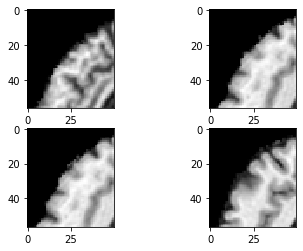

In [64]:
plt.figure(figsize=(20,8))
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(img_tot[117][27,:,:], cmap='gray')
axs[0, 1].imshow(img_tot[117-27][27,:,:], cmap='gray')
axs[1, 0].imshow(img_tot[117-54][27,:,:], cmap='gray')
axs[1, 1].imshow(img_tot[117-81][27,:,:], cmap='gray')


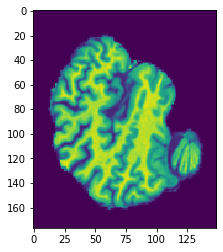

In [33]:
plt.imshow(t1[20,:,:])

In [67]:
len(img_tot)

1836